In [1]:
#=======================================
## DNN_reg_Concrete (Cross_validation)
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Change the working directory.

import os

os.getcwd()


'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete'

In [2]:
#----------------------------------------
# Set random seed.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#----------------------------------------
# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [4]:
#----------------------------------------
# Load the dataset.

dataset = np.loadtxt("CONCRETE-Training-Data.txt")

print(dataset.shape)

index = [0, 3, 7]

X = dataset[:, index]
#X = dataset[:, 0:8]
Y = dataset[:, 8]

print(X.shape)
print(Y.shape)

(1030, 9)
(1030, 3)
(1030,)


In [5]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

standardize = lambda x:(x - np.mean(x, axis = 0))/np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)
Y_train = standardize(Y)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))

[281.1679 181.5673  45.6621]
[104.5064  21.3542  63.1699]
35.818
16.7057
[-0. -0.  0.]
[1. 1. 1.]
0.0
1.0


In [6]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [7]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [8]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 9, 9, 8, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'linear']


In [9]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    # Create the DNN_model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], epochs = 1000, validation_split = 0.2, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])


Train on 741 samples, validate on 186 samples
Epoch 1/1000
 - 1s - loss: 0.9750 - mean_absolute_error: 0.7899 - val_loss: 1.1723 - val_mean_absolute_error: 0.9082
Epoch 2/1000
 - 0s - loss: 0.9735 - mean_absolute_error: 0.7896 - val_loss: 1.1701 - val_mean_absolute_error: 0.9077
Epoch 3/1000
 - 0s - loss: 0.9512 - mean_absolute_error: 0.7809 - val_loss: 1.1238 - val_mean_absolute_error: 0.8902
Epoch 4/1000
 - 0s - loss: 0.8487 - mean_absolute_error: 0.7413 - val_loss: 0.9684 - val_mean_absolute_error: 0.8304
Epoch 5/1000
 - 0s - loss: 0.7341 - mean_absolute_error: 0.6911 - val_loss: 0.9037 - val_mean_absolute_error: 0.8044
Epoch 6/1000
 - 0s - loss: 0.7079 - mean_absolute_error: 0.6778 - val_loss: 0.8704 - val_mean_absolute_error: 0.7900
Epoch 7/1000
 - 0s - loss: 0.6761 - mean_absolute_error: 0.6640 - val_loss: 0.8346 - val_mean_absolute_error: 0.7746
Epoch 8/1000
 - 0s - loss: 0.6693 - mean_absolute_error: 0.6618 - val_loss: 0.8260 - val_mean_absolute_error: 0.7672
Epoch 9/1000
 - 0s

 - 0s - loss: 0.4408 - mean_absolute_error: 0.5160 - val_loss: 0.4114 - val_mean_absolute_error: 0.5293
Epoch 71/1000
 - 0s - loss: 0.4466 - mean_absolute_error: 0.5220 - val_loss: 0.4107 - val_mean_absolute_error: 0.5273
Epoch 72/1000
 - 0s - loss: 0.4709 - mean_absolute_error: 0.5412 - val_loss: 0.4087 - val_mean_absolute_error: 0.5287
Epoch 73/1000
 - 0s - loss: 0.4506 - mean_absolute_error: 0.5280 - val_loss: 0.4047 - val_mean_absolute_error: 0.5246
Epoch 74/1000
 - 0s - loss: 0.4417 - mean_absolute_error: 0.5227 - val_loss: 0.4068 - val_mean_absolute_error: 0.5269
Epoch 75/1000
 - 0s - loss: 0.4703 - mean_absolute_error: 0.5306 - val_loss: 0.4103 - val_mean_absolute_error: 0.5255
Epoch 76/1000
 - 0s - loss: 0.4111 - mean_absolute_error: 0.5042 - val_loss: 0.3955 - val_mean_absolute_error: 0.5170
Epoch 77/1000
 - 0s - loss: 0.4229 - mean_absolute_error: 0.5153 - val_loss: 0.3942 - val_mean_absolute_error: 0.5203
Epoch 78/1000
 - 0s - loss: 0.4543 - mean_absolute_error: 0.5228 - val

Epoch 140/1000
 - 0s - loss: 0.4492 - mean_absolute_error: 0.5239 - val_loss: 0.3852 - val_mean_absolute_error: 0.5057
Epoch 141/1000
 - 0s - loss: 0.4142 - mean_absolute_error: 0.5034 - val_loss: 0.3786 - val_mean_absolute_error: 0.5037
Epoch 142/1000
 - 0s - loss: 0.4020 - mean_absolute_error: 0.4905 - val_loss: 0.3880 - val_mean_absolute_error: 0.5073
Epoch 143/1000
 - 0s - loss: 0.4180 - mean_absolute_error: 0.5022 - val_loss: 0.3778 - val_mean_absolute_error: 0.5025
Epoch 144/1000
 - 0s - loss: 0.4329 - mean_absolute_error: 0.5144 - val_loss: 0.3836 - val_mean_absolute_error: 0.5056
Epoch 145/1000
 - 0s - loss: 0.4105 - mean_absolute_error: 0.5023 - val_loss: 0.3805 - val_mean_absolute_error: 0.5044
Epoch 146/1000
 - 0s - loss: 0.4148 - mean_absolute_error: 0.5059 - val_loss: 0.3798 - val_mean_absolute_error: 0.5030
Epoch 147/1000
 - 0s - loss: 0.4306 - mean_absolute_error: 0.5077 - val_loss: 0.3881 - val_mean_absolute_error: 0.5054
Epoch 148/1000
 - 0s - loss: 0.4496 - mean_absol

Epoch 209/1000
 - 0s - loss: 0.4131 - mean_absolute_error: 0.5024 - val_loss: 0.3797 - val_mean_absolute_error: 0.4992
Epoch 210/1000
 - 0s - loss: 0.4330 - mean_absolute_error: 0.5124 - val_loss: 0.3805 - val_mean_absolute_error: 0.5031
Epoch 211/1000
 - 0s - loss: 0.4018 - mean_absolute_error: 0.4951 - val_loss: 0.3806 - val_mean_absolute_error: 0.5026
Epoch 212/1000
 - 0s - loss: 0.3921 - mean_absolute_error: 0.4953 - val_loss: 0.3692 - val_mean_absolute_error: 0.4940
Epoch 213/1000
 - 0s - loss: 0.4177 - mean_absolute_error: 0.5043 - val_loss: 0.3740 - val_mean_absolute_error: 0.4985
Epoch 214/1000
 - 0s - loss: 0.4028 - mean_absolute_error: 0.4957 - val_loss: 0.3864 - val_mean_absolute_error: 0.5031
Epoch 215/1000
 - 0s - loss: 0.4058 - mean_absolute_error: 0.4954 - val_loss: 0.3774 - val_mean_absolute_error: 0.5002
Epoch 216/1000
 - 0s - loss: 0.4048 - mean_absolute_error: 0.4961 - val_loss: 0.3762 - val_mean_absolute_error: 0.4978
Epoch 217/1000
 - 0s - loss: 0.4079 - mean_absol

Epoch 278/1000
 - 0s - loss: 0.3993 - mean_absolute_error: 0.5003 - val_loss: 0.3736 - val_mean_absolute_error: 0.4951
Epoch 279/1000
 - 0s - loss: 0.3904 - mean_absolute_error: 0.4912 - val_loss: 0.3674 - val_mean_absolute_error: 0.4906
Epoch 280/1000
 - 0s - loss: 0.4175 - mean_absolute_error: 0.5054 - val_loss: 0.3743 - val_mean_absolute_error: 0.4954
Epoch 281/1000
 - 0s - loss: 0.3893 - mean_absolute_error: 0.4928 - val_loss: 0.3673 - val_mean_absolute_error: 0.4912
Epoch 282/1000
 - 0s - loss: 0.4176 - mean_absolute_error: 0.5040 - val_loss: 0.3757 - val_mean_absolute_error: 0.4951
Epoch 283/1000
 - 0s - loss: 0.3721 - mean_absolute_error: 0.4828 - val_loss: 0.3762 - val_mean_absolute_error: 0.4986
Epoch 284/1000
 - 0s - loss: 0.4315 - mean_absolute_error: 0.5151 - val_loss: 0.3733 - val_mean_absolute_error: 0.4952
Epoch 285/1000
 - 0s - loss: 0.4138 - mean_absolute_error: 0.5000 - val_loss: 0.3770 - val_mean_absolute_error: 0.4980
Epoch 286/1000
 - 0s - loss: 0.3892 - mean_absol

Epoch 347/1000
 - 0s - loss: 0.4055 - mean_absolute_error: 0.4967 - val_loss: 0.3769 - val_mean_absolute_error: 0.4979
Epoch 348/1000
 - 0s - loss: 0.3954 - mean_absolute_error: 0.5018 - val_loss: 0.3714 - val_mean_absolute_error: 0.4941
Epoch 349/1000
 - 0s - loss: 0.4061 - mean_absolute_error: 0.5049 - val_loss: 0.3754 - val_mean_absolute_error: 0.4981
Epoch 350/1000
 - 0s - loss: 0.4002 - mean_absolute_error: 0.4903 - val_loss: 0.3724 - val_mean_absolute_error: 0.4954
Epoch 351/1000
 - 0s - loss: 0.4236 - mean_absolute_error: 0.5058 - val_loss: 0.3729 - val_mean_absolute_error: 0.4944
Epoch 352/1000
 - 0s - loss: 0.3988 - mean_absolute_error: 0.4945 - val_loss: 0.3703 - val_mean_absolute_error: 0.4933
Epoch 353/1000
 - 0s - loss: 0.4111 - mean_absolute_error: 0.5001 - val_loss: 0.3680 - val_mean_absolute_error: 0.4926
Epoch 354/1000
 - 0s - loss: 0.4148 - mean_absolute_error: 0.4990 - val_loss: 0.3704 - val_mean_absolute_error: 0.4921
Epoch 355/1000
 - 0s - loss: 0.4068 - mean_absol

Epoch 416/1000
 - 0s - loss: 0.4335 - mean_absolute_error: 0.5063 - val_loss: 0.3705 - val_mean_absolute_error: 0.4938
Epoch 417/1000
 - 0s - loss: 0.3886 - mean_absolute_error: 0.4788 - val_loss: 0.3709 - val_mean_absolute_error: 0.4947
Epoch 418/1000
 - 0s - loss: 0.4033 - mean_absolute_error: 0.5026 - val_loss: 0.3717 - val_mean_absolute_error: 0.4943
Epoch 419/1000
 - 0s - loss: 0.3836 - mean_absolute_error: 0.4845 - val_loss: 0.3710 - val_mean_absolute_error: 0.4937
Epoch 420/1000
 - 0s - loss: 0.3931 - mean_absolute_error: 0.4912 - val_loss: 0.3690 - val_mean_absolute_error: 0.4924
Epoch 421/1000
 - 0s - loss: 0.4065 - mean_absolute_error: 0.4960 - val_loss: 0.3748 - val_mean_absolute_error: 0.4958
Epoch 422/1000
 - 0s - loss: 0.4212 - mean_absolute_error: 0.5084 - val_loss: 0.3724 - val_mean_absolute_error: 0.4956
Epoch 423/1000
 - 0s - loss: 0.4026 - mean_absolute_error: 0.4898 - val_loss: 0.3732 - val_mean_absolute_error: 0.4949
Epoch 424/1000
 - 0s - loss: 0.4185 - mean_absol

Epoch 485/1000
 - 0s - loss: 0.4014 - mean_absolute_error: 0.4965 - val_loss: 0.3550 - val_mean_absolute_error: 0.4809
Epoch 486/1000
 - 0s - loss: 0.3982 - mean_absolute_error: 0.4876 - val_loss: 0.3652 - val_mean_absolute_error: 0.4867
Epoch 487/1000
 - 0s - loss: 0.3895 - mean_absolute_error: 0.4904 - val_loss: 0.3701 - val_mean_absolute_error: 0.4907
Epoch 488/1000
 - 0s - loss: 0.3981 - mean_absolute_error: 0.4947 - val_loss: 0.3696 - val_mean_absolute_error: 0.4913
Epoch 489/1000
 - 0s - loss: 0.3826 - mean_absolute_error: 0.4807 - val_loss: 0.3672 - val_mean_absolute_error: 0.4888
Epoch 490/1000
 - 0s - loss: 0.4005 - mean_absolute_error: 0.4923 - val_loss: 0.3685 - val_mean_absolute_error: 0.4890
Epoch 491/1000
 - 0s - loss: 0.4000 - mean_absolute_error: 0.4938 - val_loss: 0.3783 - val_mean_absolute_error: 0.4950
Epoch 492/1000
 - 0s - loss: 0.4098 - mean_absolute_error: 0.4999 - val_loss: 0.3718 - val_mean_absolute_error: 0.4937
Epoch 493/1000
 - 0s - loss: 0.4043 - mean_absol

Epoch 554/1000
 - 0s - loss: 0.3819 - mean_absolute_error: 0.4816 - val_loss: 0.3544 - val_mean_absolute_error: 0.4831
Epoch 555/1000
 - 0s - loss: 0.3895 - mean_absolute_error: 0.4884 - val_loss: 0.3668 - val_mean_absolute_error: 0.4903
Epoch 556/1000
 - 0s - loss: 0.3756 - mean_absolute_error: 0.4807 - val_loss: 0.3692 - val_mean_absolute_error: 0.4911
Epoch 557/1000
 - 0s - loss: 0.4405 - mean_absolute_error: 0.5050 - val_loss: 0.3931 - val_mean_absolute_error: 0.5098
Epoch 558/1000
 - 0s - loss: 0.3901 - mean_absolute_error: 0.4990 - val_loss: 0.3757 - val_mean_absolute_error: 0.4969
Epoch 559/1000
 - 0s - loss: 0.3957 - mean_absolute_error: 0.4925 - val_loss: 0.3735 - val_mean_absolute_error: 0.4944
Epoch 560/1000
 - 0s - loss: 0.3805 - mean_absolute_error: 0.4837 - val_loss: 0.3718 - val_mean_absolute_error: 0.4916
Epoch 561/1000
 - 0s - loss: 0.4083 - mean_absolute_error: 0.4898 - val_loss: 0.3726 - val_mean_absolute_error: 0.4919
Epoch 562/1000
 - 0s - loss: 0.3823 - mean_absol

Epoch 623/1000
 - 0s - loss: 0.4239 - mean_absolute_error: 0.5122 - val_loss: 0.3639 - val_mean_absolute_error: 0.4883
Epoch 624/1000
 - 0s - loss: 0.4107 - mean_absolute_error: 0.4977 - val_loss: 0.3709 - val_mean_absolute_error: 0.4933
Epoch 625/1000
 - 0s - loss: 0.4076 - mean_absolute_error: 0.4984 - val_loss: 0.3602 - val_mean_absolute_error: 0.4857
Epoch 626/1000
 - 0s - loss: 0.4011 - mean_absolute_error: 0.5003 - val_loss: 0.3707 - val_mean_absolute_error: 0.4912
Epoch 627/1000
 - 0s - loss: 0.3997 - mean_absolute_error: 0.4962 - val_loss: 0.3649 - val_mean_absolute_error: 0.4900
Epoch 628/1000
 - 0s - loss: 0.4085 - mean_absolute_error: 0.4973 - val_loss: 0.3759 - val_mean_absolute_error: 0.5002
Epoch 629/1000
 - 0s - loss: 0.4151 - mean_absolute_error: 0.5100 - val_loss: 0.3657 - val_mean_absolute_error: 0.4905
Epoch 630/1000
 - 0s - loss: 0.4282 - mean_absolute_error: 0.5100 - val_loss: 0.3780 - val_mean_absolute_error: 0.4960
Epoch 631/1000
 - 0s - loss: 0.3822 - mean_absol

Epoch 692/1000
 - 0s - loss: 0.4262 - mean_absolute_error: 0.5049 - val_loss: 0.3742 - val_mean_absolute_error: 0.4937
Epoch 693/1000
 - 0s - loss: 0.4257 - mean_absolute_error: 0.5018 - val_loss: 0.3640 - val_mean_absolute_error: 0.4851
Epoch 694/1000
 - 0s - loss: 0.4251 - mean_absolute_error: 0.5082 - val_loss: 0.3642 - val_mean_absolute_error: 0.4859
Epoch 695/1000
 - 0s - loss: 0.3692 - mean_absolute_error: 0.4755 - val_loss: 0.3529 - val_mean_absolute_error: 0.4788
Epoch 696/1000
 - 0s - loss: 0.4152 - mean_absolute_error: 0.5043 - val_loss: 0.3559 - val_mean_absolute_error: 0.4827
Epoch 697/1000
 - 0s - loss: 0.4243 - mean_absolute_error: 0.5047 - val_loss: 0.3629 - val_mean_absolute_error: 0.4866
Epoch 698/1000
 - 0s - loss: 0.4016 - mean_absolute_error: 0.4975 - val_loss: 0.3615 - val_mean_absolute_error: 0.4852
Epoch 699/1000
 - 0s - loss: 0.3835 - mean_absolute_error: 0.4772 - val_loss: 0.3569 - val_mean_absolute_error: 0.4802
Epoch 700/1000
 - 0s - loss: 0.4053 - mean_absol

Epoch 761/1000
 - 0s - loss: 0.4050 - mean_absolute_error: 0.4948 - val_loss: 0.3661 - val_mean_absolute_error: 0.4893
Epoch 762/1000
 - 0s - loss: 0.3858 - mean_absolute_error: 0.4884 - val_loss: 0.3673 - val_mean_absolute_error: 0.4903
Epoch 763/1000
 - 0s - loss: 0.3904 - mean_absolute_error: 0.4930 - val_loss: 0.3708 - val_mean_absolute_error: 0.4925
Epoch 764/1000
 - 0s - loss: 0.3835 - mean_absolute_error: 0.4810 - val_loss: 0.3623 - val_mean_absolute_error: 0.4868
Epoch 765/1000
 - 0s - loss: 0.4013 - mean_absolute_error: 0.4890 - val_loss: 0.3696 - val_mean_absolute_error: 0.4918
Epoch 766/1000
 - 0s - loss: 0.4024 - mean_absolute_error: 0.4977 - val_loss: 0.3648 - val_mean_absolute_error: 0.4863
Epoch 767/1000
 - 0s - loss: 0.4026 - mean_absolute_error: 0.4964 - val_loss: 0.3532 - val_mean_absolute_error: 0.4796
Epoch 768/1000
 - 0s - loss: 0.4033 - mean_absolute_error: 0.4896 - val_loss: 0.3800 - val_mean_absolute_error: 0.4961
Epoch 769/1000
 - 0s - loss: 0.4090 - mean_absol

Epoch 830/1000
 - 0s - loss: 0.3838 - mean_absolute_error: 0.4799 - val_loss: 0.3697 - val_mean_absolute_error: 0.4921
Epoch 831/1000
 - 0s - loss: 0.3981 - mean_absolute_error: 0.4931 - val_loss: 0.3649 - val_mean_absolute_error: 0.4883
Epoch 832/1000
 - 0s - loss: 0.3832 - mean_absolute_error: 0.4865 - val_loss: 0.3650 - val_mean_absolute_error: 0.4882
Epoch 833/1000
 - 0s - loss: 0.3948 - mean_absolute_error: 0.4991 - val_loss: 0.3667 - val_mean_absolute_error: 0.4867
Epoch 834/1000
 - 0s - loss: 0.4265 - mean_absolute_error: 0.5006 - val_loss: 0.3681 - val_mean_absolute_error: 0.4873
Epoch 835/1000
 - 0s - loss: 0.4031 - mean_absolute_error: 0.4917 - val_loss: 0.3621 - val_mean_absolute_error: 0.4837
Epoch 836/1000
 - 0s - loss: 0.4188 - mean_absolute_error: 0.5068 - val_loss: 0.3673 - val_mean_absolute_error: 0.4890
Epoch 837/1000
 - 0s - loss: 0.4029 - mean_absolute_error: 0.4889 - val_loss: 0.3754 - val_mean_absolute_error: 0.4921
Epoch 838/1000
 - 0s - loss: 0.4081 - mean_absol

Epoch 899/1000
 - 0s - loss: 0.4107 - mean_absolute_error: 0.4948 - val_loss: 0.3855 - val_mean_absolute_error: 0.5010
Epoch 900/1000
 - 0s - loss: 0.4043 - mean_absolute_error: 0.4955 - val_loss: 0.3709 - val_mean_absolute_error: 0.4916
Epoch 901/1000
 - 0s - loss: 0.4104 - mean_absolute_error: 0.5054 - val_loss: 0.3690 - val_mean_absolute_error: 0.4909
Epoch 902/1000
 - 0s - loss: 0.4205 - mean_absolute_error: 0.5090 - val_loss: 0.3754 - val_mean_absolute_error: 0.4933
Epoch 903/1000
 - 0s - loss: 0.3983 - mean_absolute_error: 0.4943 - val_loss: 0.3651 - val_mean_absolute_error: 0.4877
Epoch 904/1000
 - 0s - loss: 0.4063 - mean_absolute_error: 0.5036 - val_loss: 0.3698 - val_mean_absolute_error: 0.4907
Epoch 905/1000
 - 0s - loss: 0.3884 - mean_absolute_error: 0.4807 - val_loss: 0.3622 - val_mean_absolute_error: 0.4870
Epoch 906/1000
 - 0s - loss: 0.3917 - mean_absolute_error: 0.4910 - val_loss: 0.3634 - val_mean_absolute_error: 0.4878
Epoch 907/1000
 - 0s - loss: 0.3840 - mean_absol

Epoch 968/1000
 - 0s - loss: 0.3908 - mean_absolute_error: 0.4861 - val_loss: 0.3661 - val_mean_absolute_error: 0.4871
Epoch 969/1000
 - 0s - loss: 0.4088 - mean_absolute_error: 0.4961 - val_loss: 0.3688 - val_mean_absolute_error: 0.4885
Epoch 970/1000
 - 0s - loss: 0.3585 - mean_absolute_error: 0.4704 - val_loss: 0.3572 - val_mean_absolute_error: 0.4833
Epoch 971/1000
 - 0s - loss: 0.3761 - mean_absolute_error: 0.4804 - val_loss: 0.3625 - val_mean_absolute_error: 0.4883
Epoch 972/1000
 - 0s - loss: 0.4005 - mean_absolute_error: 0.4890 - val_loss: 0.3734 - val_mean_absolute_error: 0.4976
Epoch 973/1000
 - 0s - loss: 0.3867 - mean_absolute_error: 0.4926 - val_loss: 0.3796 - val_mean_absolute_error: 0.4999
Epoch 974/1000
 - 0s - loss: 0.4470 - mean_absolute_error: 0.5220 - val_loss: 0.3851 - val_mean_absolute_error: 0.5019
Epoch 975/1000
 - 0s - loss: 0.4096 - mean_absolute_error: 0.5047 - val_loss: 0.3635 - val_mean_absolute_error: 0.4885
Epoch 976/1000
 - 0s - loss: 0.3815 - mean_absol

Epoch 37/1000
 - 0s - loss: 0.3841 - mean_absolute_error: 0.4921 - val_loss: 0.3896 - val_mean_absolute_error: 0.5101
Epoch 38/1000
 - 0s - loss: 0.4020 - mean_absolute_error: 0.4903 - val_loss: 0.3894 - val_mean_absolute_error: 0.5082
Epoch 39/1000
 - 0s - loss: 0.3978 - mean_absolute_error: 0.4981 - val_loss: 0.3942 - val_mean_absolute_error: 0.5145
Epoch 40/1000
 - 0s - loss: 0.4012 - mean_absolute_error: 0.5010 - val_loss: 0.3869 - val_mean_absolute_error: 0.5077
Epoch 41/1000
 - 0s - loss: 0.3749 - mean_absolute_error: 0.4866 - val_loss: 0.3801 - val_mean_absolute_error: 0.5006
Epoch 42/1000
 - 0s - loss: 0.3725 - mean_absolute_error: 0.4834 - val_loss: 0.3704 - val_mean_absolute_error: 0.4958
Epoch 43/1000
 - 0s - loss: 0.3931 - mean_absolute_error: 0.4956 - val_loss: 0.3824 - val_mean_absolute_error: 0.5023
Epoch 44/1000
 - 0s - loss: 0.4116 - mean_absolute_error: 0.4994 - val_loss: 0.3908 - val_mean_absolute_error: 0.5079
Epoch 45/1000
 - 0s - loss: 0.4034 - mean_absolute_error

Epoch 107/1000
 - 0s - loss: 0.3308 - mean_absolute_error: 0.4573 - val_loss: 0.3476 - val_mean_absolute_error: 0.4724
Epoch 108/1000
 - 0s - loss: 0.3654 - mean_absolute_error: 0.4710 - val_loss: 0.3585 - val_mean_absolute_error: 0.4842
Epoch 109/1000
 - 0s - loss: 0.3522 - mean_absolute_error: 0.4718 - val_loss: 0.3432 - val_mean_absolute_error: 0.4737
Epoch 110/1000
 - 0s - loss: 0.3354 - mean_absolute_error: 0.4593 - val_loss: 0.3466 - val_mean_absolute_error: 0.4720
Epoch 111/1000
 - 0s - loss: 0.3643 - mean_absolute_error: 0.4733 - val_loss: 0.3521 - val_mean_absolute_error: 0.4786
Epoch 112/1000
 - 0s - loss: 0.3643 - mean_absolute_error: 0.4751 - val_loss: 0.3556 - val_mean_absolute_error: 0.4826
Epoch 113/1000
 - 0s - loss: 0.3704 - mean_absolute_error: 0.4720 - val_loss: 0.3514 - val_mean_absolute_error: 0.4836
Epoch 114/1000
 - 0s - loss: 0.3360 - mean_absolute_error: 0.4594 - val_loss: 0.3540 - val_mean_absolute_error: 0.4783
Epoch 115/1000
 - 0s - loss: 0.3329 - mean_absol

Epoch 176/1000
 - 0s - loss: 0.3529 - mean_absolute_error: 0.4715 - val_loss: 0.3463 - val_mean_absolute_error: 0.4726
Epoch 177/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.4656 - val_loss: 0.3449 - val_mean_absolute_error: 0.4699
Epoch 178/1000
 - 0s - loss: 0.3547 - mean_absolute_error: 0.4651 - val_loss: 0.3518 - val_mean_absolute_error: 0.4781
Epoch 179/1000
 - 0s - loss: 0.3449 - mean_absolute_error: 0.4649 - val_loss: 0.3460 - val_mean_absolute_error: 0.4720
Epoch 180/1000
 - 0s - loss: 0.3539 - mean_absolute_error: 0.4641 - val_loss: 0.3417 - val_mean_absolute_error: 0.4668
Epoch 181/1000
 - 0s - loss: 0.3506 - mean_absolute_error: 0.4611 - val_loss: 0.3418 - val_mean_absolute_error: 0.4672
Epoch 182/1000
 - 0s - loss: 0.3422 - mean_absolute_error: 0.4553 - val_loss: 0.3391 - val_mean_absolute_error: 0.4643
Epoch 183/1000
 - 0s - loss: 0.3925 - mean_absolute_error: 0.4925 - val_loss: 0.3526 - val_mean_absolute_error: 0.4794
Epoch 184/1000
 - 0s - loss: 0.3381 - mean_absol

Epoch 245/1000
 - 0s - loss: 0.3447 - mean_absolute_error: 0.4586 - val_loss: 0.3473 - val_mean_absolute_error: 0.4674
Epoch 246/1000
 - 0s - loss: 0.3329 - mean_absolute_error: 0.4516 - val_loss: 0.3492 - val_mean_absolute_error: 0.4735
Epoch 247/1000
 - 0s - loss: 0.3536 - mean_absolute_error: 0.4698 - val_loss: 0.3543 - val_mean_absolute_error: 0.4767
Epoch 248/1000
 - 0s - loss: 0.3483 - mean_absolute_error: 0.4687 - val_loss: 0.3532 - val_mean_absolute_error: 0.4786
Epoch 249/1000
 - 0s - loss: 0.3570 - mean_absolute_error: 0.4730 - val_loss: 0.3564 - val_mean_absolute_error: 0.4773
Epoch 250/1000
 - 0s - loss: 0.3531 - mean_absolute_error: 0.4675 - val_loss: 0.3548 - val_mean_absolute_error: 0.4787
Epoch 251/1000
 - 0s - loss: 0.3439 - mean_absolute_error: 0.4610 - val_loss: 0.3494 - val_mean_absolute_error: 0.4772
Epoch 252/1000
 - 0s - loss: 0.3348 - mean_absolute_error: 0.4493 - val_loss: 0.3531 - val_mean_absolute_error: 0.4778
Epoch 253/1000
 - 0s - loss: 0.3443 - mean_absol

Epoch 314/1000
 - 0s - loss: 0.3606 - mean_absolute_error: 0.4720 - val_loss: 0.3574 - val_mean_absolute_error: 0.4822
Epoch 315/1000
 - 0s - loss: 0.3551 - mean_absolute_error: 0.4706 - val_loss: 0.3663 - val_mean_absolute_error: 0.4958
Epoch 316/1000
 - 0s - loss: 0.3557 - mean_absolute_error: 0.4663 - val_loss: 0.3556 - val_mean_absolute_error: 0.4802
Epoch 317/1000
 - 0s - loss: 0.3634 - mean_absolute_error: 0.4718 - val_loss: 0.3569 - val_mean_absolute_error: 0.4828
Epoch 318/1000
 - 0s - loss: 0.3555 - mean_absolute_error: 0.4730 - val_loss: 0.3477 - val_mean_absolute_error: 0.4747
Epoch 319/1000
 - 0s - loss: 0.3402 - mean_absolute_error: 0.4577 - val_loss: 0.3552 - val_mean_absolute_error: 0.4782
Epoch 320/1000
 - 0s - loss: 0.3393 - mean_absolute_error: 0.4546 - val_loss: 0.3520 - val_mean_absolute_error: 0.4754
Epoch 321/1000
 - 0s - loss: 0.3717 - mean_absolute_error: 0.4721 - val_loss: 0.3577 - val_mean_absolute_error: 0.4806
Epoch 322/1000
 - 0s - loss: 0.3428 - mean_absol

Epoch 383/1000
 - 0s - loss: 0.3451 - mean_absolute_error: 0.4554 - val_loss: 0.3524 - val_mean_absolute_error: 0.4775
Epoch 384/1000
 - 0s - loss: 0.3104 - mean_absolute_error: 0.4337 - val_loss: 0.3471 - val_mean_absolute_error: 0.4730
Epoch 385/1000
 - 0s - loss: 0.3355 - mean_absolute_error: 0.4568 - val_loss: 0.3432 - val_mean_absolute_error: 0.4648
Epoch 386/1000
 - 0s - loss: 0.3408 - mean_absolute_error: 0.4615 - val_loss: 0.3495 - val_mean_absolute_error: 0.4739
Epoch 387/1000
 - 0s - loss: 0.3463 - mean_absolute_error: 0.4625 - val_loss: 0.3504 - val_mean_absolute_error: 0.4761
Epoch 388/1000
 - 0s - loss: 0.3471 - mean_absolute_error: 0.4603 - val_loss: 0.3489 - val_mean_absolute_error: 0.4739
Epoch 389/1000
 - 0s - loss: 0.3502 - mean_absolute_error: 0.4698 - val_loss: 0.3527 - val_mean_absolute_error: 0.4841
Epoch 390/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4786 - val_loss: 0.3536 - val_mean_absolute_error: 0.4791
Epoch 391/1000
 - 0s - loss: 0.3410 - mean_absol

Epoch 452/1000
 - 0s - loss: 0.3239 - mean_absolute_error: 0.4473 - val_loss: 0.3512 - val_mean_absolute_error: 0.4783
Epoch 453/1000
 - 0s - loss: 0.3361 - mean_absolute_error: 0.4551 - val_loss: 0.3465 - val_mean_absolute_error: 0.4760
Epoch 454/1000
 - 0s - loss: 0.3471 - mean_absolute_error: 0.4601 - val_loss: 0.3561 - val_mean_absolute_error: 0.4823
Epoch 455/1000
 - 0s - loss: 0.3399 - mean_absolute_error: 0.4563 - val_loss: 0.3506 - val_mean_absolute_error: 0.4822
Epoch 456/1000
 - 0s - loss: 0.3477 - mean_absolute_error: 0.4643 - val_loss: 0.3507 - val_mean_absolute_error: 0.4776
Epoch 457/1000
 - 0s - loss: 0.3282 - mean_absolute_error: 0.4525 - val_loss: 0.3509 - val_mean_absolute_error: 0.4771
Epoch 458/1000
 - 0s - loss: 0.3436 - mean_absolute_error: 0.4529 - val_loss: 0.3451 - val_mean_absolute_error: 0.4736
Epoch 459/1000
 - 0s - loss: 0.3430 - mean_absolute_error: 0.4569 - val_loss: 0.3456 - val_mean_absolute_error: 0.4718
Epoch 460/1000
 - 0s - loss: 0.3415 - mean_absol

Epoch 521/1000
 - 0s - loss: 0.3417 - mean_absolute_error: 0.4658 - val_loss: 0.3489 - val_mean_absolute_error: 0.4764
Epoch 522/1000
 - 0s - loss: 0.3423 - mean_absolute_error: 0.4564 - val_loss: 0.3473 - val_mean_absolute_error: 0.4719
Epoch 523/1000
 - 0s - loss: 0.3129 - mean_absolute_error: 0.4412 - val_loss: 0.3459 - val_mean_absolute_error: 0.4752
Epoch 524/1000
 - 0s - loss: 0.3251 - mean_absolute_error: 0.4474 - val_loss: 0.3464 - val_mean_absolute_error: 0.4760
Epoch 525/1000
 - 0s - loss: 0.3384 - mean_absolute_error: 0.4503 - val_loss: 0.3444 - val_mean_absolute_error: 0.4727
Epoch 526/1000
 - 0s - loss: 0.3374 - mean_absolute_error: 0.4586 - val_loss: 0.3458 - val_mean_absolute_error: 0.4783
Epoch 527/1000
 - 0s - loss: 0.3220 - mean_absolute_error: 0.4485 - val_loss: 0.3447 - val_mean_absolute_error: 0.4757
Epoch 528/1000
 - 0s - loss: 0.3374 - mean_absolute_error: 0.4555 - val_loss: 0.3440 - val_mean_absolute_error: 0.4699
Epoch 529/1000
 - 0s - loss: 0.3602 - mean_absol

Epoch 590/1000
 - 0s - loss: 0.3309 - mean_absolute_error: 0.4482 - val_loss: 0.3534 - val_mean_absolute_error: 0.4784
Epoch 591/1000
 - 0s - loss: 0.3379 - mean_absolute_error: 0.4584 - val_loss: 0.3439 - val_mean_absolute_error: 0.4690
Epoch 592/1000
 - 0s - loss: 0.3358 - mean_absolute_error: 0.4623 - val_loss: 0.3461 - val_mean_absolute_error: 0.4703
Epoch 593/1000
 - 0s - loss: 0.3252 - mean_absolute_error: 0.4461 - val_loss: 0.3397 - val_mean_absolute_error: 0.4694
Epoch 594/1000
 - 0s - loss: 0.3283 - mean_absolute_error: 0.4482 - val_loss: 0.3386 - val_mean_absolute_error: 0.4652
Epoch 595/1000
 - 0s - loss: 0.3385 - mean_absolute_error: 0.4517 - val_loss: 0.3396 - val_mean_absolute_error: 0.4681
Epoch 596/1000
 - 0s - loss: 0.3418 - mean_absolute_error: 0.4534 - val_loss: 0.3477 - val_mean_absolute_error: 0.4758
Epoch 597/1000
 - 0s - loss: 0.3319 - mean_absolute_error: 0.4498 - val_loss: 0.3465 - val_mean_absolute_error: 0.4750
Epoch 598/1000
 - 0s - loss: 0.3259 - mean_absol

Epoch 659/1000
 - 0s - loss: 0.3312 - mean_absolute_error: 0.4514 - val_loss: 0.3424 - val_mean_absolute_error: 0.4712
Epoch 660/1000
 - 0s - loss: 0.3298 - mean_absolute_error: 0.4531 - val_loss: 0.3421 - val_mean_absolute_error: 0.4732
Epoch 661/1000
 - 0s - loss: 0.3439 - mean_absolute_error: 0.4634 - val_loss: 0.3402 - val_mean_absolute_error: 0.4693
Epoch 662/1000
 - 0s - loss: 0.3335 - mean_absolute_error: 0.4566 - val_loss: 0.3362 - val_mean_absolute_error: 0.4654
Epoch 663/1000
 - 0s - loss: 0.3314 - mean_absolute_error: 0.4413 - val_loss: 0.3361 - val_mean_absolute_error: 0.4656
Epoch 664/1000
 - 0s - loss: 0.3398 - mean_absolute_error: 0.4581 - val_loss: 0.3452 - val_mean_absolute_error: 0.4791
Epoch 665/1000
 - 0s - loss: 0.3415 - mean_absolute_error: 0.4531 - val_loss: 0.3406 - val_mean_absolute_error: 0.4731
Epoch 666/1000
 - 0s - loss: 0.3724 - mean_absolute_error: 0.4758 - val_loss: 0.3483 - val_mean_absolute_error: 0.4777
Epoch 667/1000
 - 0s - loss: 0.3414 - mean_absol

Epoch 728/1000
 - 0s - loss: 0.3342 - mean_absolute_error: 0.4565 - val_loss: 0.3314 - val_mean_absolute_error: 0.4605
Epoch 729/1000
 - 0s - loss: 0.3452 - mean_absolute_error: 0.4559 - val_loss: 0.3502 - val_mean_absolute_error: 0.4770
Epoch 730/1000
 - 0s - loss: 0.3240 - mean_absolute_error: 0.4459 - val_loss: 0.3454 - val_mean_absolute_error: 0.4738
Epoch 731/1000
 - 0s - loss: 0.3423 - mean_absolute_error: 0.4621 - val_loss: 0.3518 - val_mean_absolute_error: 0.4811
Epoch 732/1000
 - 0s - loss: 0.3365 - mean_absolute_error: 0.4583 - val_loss: 0.3416 - val_mean_absolute_error: 0.4692
Epoch 733/1000
 - 0s - loss: 0.3594 - mean_absolute_error: 0.4631 - val_loss: 0.3523 - val_mean_absolute_error: 0.4832
Epoch 734/1000
 - 0s - loss: 0.3334 - mean_absolute_error: 0.4628 - val_loss: 0.3512 - val_mean_absolute_error: 0.4834
Epoch 735/1000
 - 0s - loss: 0.3159 - mean_absolute_error: 0.4486 - val_loss: 0.3402 - val_mean_absolute_error: 0.4672
Epoch 736/1000
 - 0s - loss: 0.3451 - mean_absol

Epoch 797/1000
 - 0s - loss: 0.3403 - mean_absolute_error: 0.4544 - val_loss: 0.3427 - val_mean_absolute_error: 0.4751
Epoch 798/1000
 - 0s - loss: 0.3337 - mean_absolute_error: 0.4491 - val_loss: 0.3463 - val_mean_absolute_error: 0.4744
Epoch 799/1000
 - 0s - loss: 0.3049 - mean_absolute_error: 0.4360 - val_loss: 0.3402 - val_mean_absolute_error: 0.4683
Epoch 800/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4417 - val_loss: 0.3466 - val_mean_absolute_error: 0.4787
Epoch 801/1000
 - 0s - loss: 0.3205 - mean_absolute_error: 0.4499 - val_loss: 0.3382 - val_mean_absolute_error: 0.4660
Epoch 802/1000
 - 0s - loss: 0.3146 - mean_absolute_error: 0.4380 - val_loss: 0.3395 - val_mean_absolute_error: 0.4670
Epoch 803/1000
 - 0s - loss: 0.3477 - mean_absolute_error: 0.4575 - val_loss: 0.3358 - val_mean_absolute_error: 0.4633
Epoch 804/1000
 - 0s - loss: 0.3224 - mean_absolute_error: 0.4484 - val_loss: 0.3420 - val_mean_absolute_error: 0.4660
Epoch 805/1000
 - 0s - loss: 0.3459 - mean_absol

Epoch 866/1000
 - 0s - loss: 0.3453 - mean_absolute_error: 0.4593 - val_loss: 0.3432 - val_mean_absolute_error: 0.4737
Epoch 867/1000
 - 0s - loss: 0.3256 - mean_absolute_error: 0.4454 - val_loss: 0.3515 - val_mean_absolute_error: 0.4786
Epoch 868/1000
 - 0s - loss: 0.3493 - mean_absolute_error: 0.4571 - val_loss: 0.3527 - val_mean_absolute_error: 0.4811
Epoch 869/1000
 - 0s - loss: 0.3193 - mean_absolute_error: 0.4493 - val_loss: 0.3422 - val_mean_absolute_error: 0.4730
Epoch 870/1000
 - 0s - loss: 0.3475 - mean_absolute_error: 0.4544 - val_loss: 0.3515 - val_mean_absolute_error: 0.4822
Epoch 871/1000
 - 0s - loss: 0.3390 - mean_absolute_error: 0.4581 - val_loss: 0.3465 - val_mean_absolute_error: 0.4783
Epoch 872/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.4459 - val_loss: 0.3393 - val_mean_absolute_error: 0.4707
Epoch 873/1000
 - 0s - loss: 0.3458 - mean_absolute_error: 0.4621 - val_loss: 0.3496 - val_mean_absolute_error: 0.4795
Epoch 874/1000
 - 0s - loss: 0.3599 - mean_absol

Epoch 935/1000
 - 0s - loss: 0.3329 - mean_absolute_error: 0.4551 - val_loss: 0.3437 - val_mean_absolute_error: 0.4763
Epoch 936/1000
 - 0s - loss: 0.3340 - mean_absolute_error: 0.4566 - val_loss: 0.3343 - val_mean_absolute_error: 0.4656
Epoch 937/1000
 - 0s - loss: 0.3323 - mean_absolute_error: 0.4448 - val_loss: 0.3426 - val_mean_absolute_error: 0.4752
Epoch 938/1000
 - 0s - loss: 0.3193 - mean_absolute_error: 0.4542 - val_loss: 0.3385 - val_mean_absolute_error: 0.4718
Epoch 939/1000
 - 0s - loss: 0.3293 - mean_absolute_error: 0.4527 - val_loss: 0.3306 - val_mean_absolute_error: 0.4606
Epoch 940/1000
 - 0s - loss: 0.3214 - mean_absolute_error: 0.4498 - val_loss: 0.3416 - val_mean_absolute_error: 0.4738
Epoch 941/1000
 - 0s - loss: 0.3393 - mean_absolute_error: 0.4630 - val_loss: 0.3441 - val_mean_absolute_error: 0.4743
Epoch 942/1000
 - 0s - loss: 0.3099 - mean_absolute_error: 0.4370 - val_loss: 0.3430 - val_mean_absolute_error: 0.4730
Epoch 943/1000
 - 0s - loss: 0.3199 - mean_absol

Epoch 4/1000
 - 0s - loss: 0.8429 - mean_absolute_error: 0.7380 - val_loss: 0.9985 - val_mean_absolute_error: 0.8446
Epoch 5/1000
 - 0s - loss: 0.7277 - mean_absolute_error: 0.6876 - val_loss: 0.8919 - val_mean_absolute_error: 0.8012
Epoch 6/1000
 - 0s - loss: 0.6954 - mean_absolute_error: 0.6722 - val_loss: 0.8374 - val_mean_absolute_error: 0.7754
Epoch 7/1000
 - 0s - loss: 0.6377 - mean_absolute_error: 0.6447 - val_loss: 0.7879 - val_mean_absolute_error: 0.7490
Epoch 8/1000
 - 0s - loss: 0.6204 - mean_absolute_error: 0.6262 - val_loss: 0.7328 - val_mean_absolute_error: 0.7208
Epoch 9/1000
 - 0s - loss: 0.6224 - mean_absolute_error: 0.6324 - val_loss: 0.6875 - val_mean_absolute_error: 0.6980
Epoch 10/1000
 - 0s - loss: 0.6004 - mean_absolute_error: 0.6209 - val_loss: 0.6612 - val_mean_absolute_error: 0.6837
Epoch 11/1000
 - 0s - loss: 0.5424 - mean_absolute_error: 0.5944 - val_loss: 0.6240 - val_mean_absolute_error: 0.6616
Epoch 12/1000
 - 0s - loss: 0.5810 - mean_absolute_error: 0.60

Epoch 74/1000
 - 0s - loss: 0.4239 - mean_absolute_error: 0.5142 - val_loss: 0.3935 - val_mean_absolute_error: 0.5180
Epoch 75/1000
 - 0s - loss: 0.4431 - mean_absolute_error: 0.5186 - val_loss: 0.3938 - val_mean_absolute_error: 0.5180
Epoch 76/1000
 - 0s - loss: 0.4360 - mean_absolute_error: 0.5196 - val_loss: 0.3993 - val_mean_absolute_error: 0.5189
Epoch 77/1000
 - 0s - loss: 0.3918 - mean_absolute_error: 0.4920 - val_loss: 0.3888 - val_mean_absolute_error: 0.5140
Epoch 78/1000
 - 0s - loss: 0.4276 - mean_absolute_error: 0.5253 - val_loss: 0.3896 - val_mean_absolute_error: 0.5147
Epoch 79/1000
 - 0s - loss: 0.3992 - mean_absolute_error: 0.4979 - val_loss: 0.3895 - val_mean_absolute_error: 0.5150
Epoch 80/1000
 - 0s - loss: 0.4098 - mean_absolute_error: 0.5128 - val_loss: 0.3916 - val_mean_absolute_error: 0.5169
Epoch 81/1000
 - 0s - loss: 0.3811 - mean_absolute_error: 0.4818 - val_loss: 0.3842 - val_mean_absolute_error: 0.5118
Epoch 82/1000
 - 0s - loss: 0.4213 - mean_absolute_error

 - 0s - loss: 0.4178 - mean_absolute_error: 0.4971 - val_loss: 0.3872 - val_mean_absolute_error: 0.5108
Epoch 144/1000
 - 0s - loss: 0.3937 - mean_absolute_error: 0.4858 - val_loss: 0.3816 - val_mean_absolute_error: 0.5080
Epoch 145/1000
 - 0s - loss: 0.3985 - mean_absolute_error: 0.4984 - val_loss: 0.3904 - val_mean_absolute_error: 0.5104
Epoch 146/1000
 - 0s - loss: 0.4108 - mean_absolute_error: 0.5070 - val_loss: 0.4146 - val_mean_absolute_error: 0.5288
Epoch 147/1000
 - 0s - loss: 0.4125 - mean_absolute_error: 0.4990 - val_loss: 0.3983 - val_mean_absolute_error: 0.5215
Epoch 148/1000
 - 0s - loss: 0.4108 - mean_absolute_error: 0.5064 - val_loss: 0.3945 - val_mean_absolute_error: 0.5134
Epoch 149/1000
 - 0s - loss: 0.4210 - mean_absolute_error: 0.5109 - val_loss: 0.3877 - val_mean_absolute_error: 0.5116
Epoch 150/1000
 - 0s - loss: 0.4101 - mean_absolute_error: 0.5027 - val_loss: 0.3926 - val_mean_absolute_error: 0.5147
Epoch 151/1000
 - 0s - loss: 0.4070 - mean_absolute_error: 0.50

Epoch 212/1000
 - 0s - loss: 0.4218 - mean_absolute_error: 0.5058 - val_loss: 0.4228 - val_mean_absolute_error: 0.5372
Epoch 213/1000
 - 0s - loss: 0.3937 - mean_absolute_error: 0.4885 - val_loss: 0.3975 - val_mean_absolute_error: 0.5194
Epoch 214/1000
 - 0s - loss: 0.4107 - mean_absolute_error: 0.5057 - val_loss: 0.3993 - val_mean_absolute_error: 0.5193
Epoch 215/1000
 - 0s - loss: 0.4114 - mean_absolute_error: 0.5036 - val_loss: 0.4146 - val_mean_absolute_error: 0.5270
Epoch 216/1000
 - 0s - loss: 0.3954 - mean_absolute_error: 0.4879 - val_loss: 0.3917 - val_mean_absolute_error: 0.5147
Epoch 217/1000
 - 0s - loss: 0.4046 - mean_absolute_error: 0.4958 - val_loss: 0.3795 - val_mean_absolute_error: 0.5048
Epoch 218/1000
 - 0s - loss: 0.4201 - mean_absolute_error: 0.5042 - val_loss: 0.3813 - val_mean_absolute_error: 0.5044
Epoch 219/1000
 - 0s - loss: 0.4080 - mean_absolute_error: 0.5006 - val_loss: 0.3787 - val_mean_absolute_error: 0.5038
Epoch 220/1000
 - 0s - loss: 0.4035 - mean_absol

Epoch 281/1000
 - 0s - loss: 0.3634 - mean_absolute_error: 0.4692 - val_loss: 0.3818 - val_mean_absolute_error: 0.5038
Epoch 282/1000
 - 0s - loss: 0.4154 - mean_absolute_error: 0.5108 - val_loss: 0.3880 - val_mean_absolute_error: 0.5106
Epoch 283/1000
 - 0s - loss: 0.4054 - mean_absolute_error: 0.4987 - val_loss: 0.3864 - val_mean_absolute_error: 0.5056
Epoch 284/1000
 - 0s - loss: 0.4317 - mean_absolute_error: 0.5088 - val_loss: 0.3833 - val_mean_absolute_error: 0.5022
Epoch 285/1000
 - 0s - loss: 0.4091 - mean_absolute_error: 0.4993 - val_loss: 0.3806 - val_mean_absolute_error: 0.4995
Epoch 286/1000
 - 0s - loss: 0.4033 - mean_absolute_error: 0.5005 - val_loss: 0.3846 - val_mean_absolute_error: 0.5044
Epoch 287/1000
 - 0s - loss: 0.4036 - mean_absolute_error: 0.4952 - val_loss: 0.3771 - val_mean_absolute_error: 0.5005
Epoch 288/1000
 - 0s - loss: 0.3750 - mean_absolute_error: 0.4828 - val_loss: 0.3801 - val_mean_absolute_error: 0.5019
Epoch 289/1000
 - 0s - loss: 0.4017 - mean_absol

Epoch 350/1000
 - 0s - loss: 0.4039 - mean_absolute_error: 0.4952 - val_loss: 0.3967 - val_mean_absolute_error: 0.5172
Epoch 351/1000
 - 0s - loss: 0.4040 - mean_absolute_error: 0.4984 - val_loss: 0.3892 - val_mean_absolute_error: 0.5100
Epoch 352/1000
 - 0s - loss: 0.4232 - mean_absolute_error: 0.5131 - val_loss: 0.3919 - val_mean_absolute_error: 0.5120
Epoch 353/1000
 - 0s - loss: 0.3893 - mean_absolute_error: 0.4874 - val_loss: 0.3830 - val_mean_absolute_error: 0.5046
Epoch 354/1000
 - 0s - loss: 0.3775 - mean_absolute_error: 0.4784 - val_loss: 0.3889 - val_mean_absolute_error: 0.5059
Epoch 355/1000
 - 0s - loss: 0.3753 - mean_absolute_error: 0.4791 - val_loss: 0.3859 - val_mean_absolute_error: 0.5078
Epoch 356/1000
 - 0s - loss: 0.4021 - mean_absolute_error: 0.4935 - val_loss: 0.3922 - val_mean_absolute_error: 0.5133
Epoch 357/1000
 - 0s - loss: 0.3870 - mean_absolute_error: 0.4938 - val_loss: 0.3789 - val_mean_absolute_error: 0.5027
Epoch 358/1000
 - 0s - loss: 0.3923 - mean_absol

Epoch 419/1000
 - 0s - loss: 0.4124 - mean_absolute_error: 0.5023 - val_loss: 0.3762 - val_mean_absolute_error: 0.5038
Epoch 420/1000
 - 0s - loss: 0.4182 - mean_absolute_error: 0.5056 - val_loss: 0.3878 - val_mean_absolute_error: 0.5085
Epoch 421/1000
 - 0s - loss: 0.4012 - mean_absolute_error: 0.4925 - val_loss: 0.3860 - val_mean_absolute_error: 0.5073
Epoch 422/1000
 - 0s - loss: 0.3948 - mean_absolute_error: 0.4928 - val_loss: 0.3795 - val_mean_absolute_error: 0.5036
Epoch 423/1000
 - 0s - loss: 0.4048 - mean_absolute_error: 0.4993 - val_loss: 0.3826 - val_mean_absolute_error: 0.5066
Epoch 424/1000
 - 0s - loss: 0.4126 - mean_absolute_error: 0.4959 - val_loss: 0.3886 - val_mean_absolute_error: 0.5130
Epoch 425/1000
 - 0s - loss: 0.4128 - mean_absolute_error: 0.5028 - val_loss: 0.3926 - val_mean_absolute_error: 0.5122
Epoch 426/1000
 - 0s - loss: 0.4106 - mean_absolute_error: 0.4997 - val_loss: 0.3869 - val_mean_absolute_error: 0.5082
Epoch 427/1000
 - 0s - loss: 0.4067 - mean_absol

Epoch 488/1000
 - 0s - loss: 0.4316 - mean_absolute_error: 0.5058 - val_loss: 0.3907 - val_mean_absolute_error: 0.5068
Epoch 489/1000
 - 0s - loss: 0.4212 - mean_absolute_error: 0.5089 - val_loss: 0.3896 - val_mean_absolute_error: 0.5080
Epoch 490/1000
 - 0s - loss: 0.4189 - mean_absolute_error: 0.5058 - val_loss: 0.3833 - val_mean_absolute_error: 0.5068
Epoch 491/1000
 - 0s - loss: 0.4136 - mean_absolute_error: 0.5052 - val_loss: 0.3885 - val_mean_absolute_error: 0.5088
Epoch 492/1000
 - 0s - loss: 0.4135 - mean_absolute_error: 0.5079 - val_loss: 0.3891 - val_mean_absolute_error: 0.5130
Epoch 493/1000
 - 0s - loss: 0.3976 - mean_absolute_error: 0.5028 - val_loss: 0.3866 - val_mean_absolute_error: 0.5051
Epoch 494/1000
 - 0s - loss: 0.3937 - mean_absolute_error: 0.4829 - val_loss: 0.3905 - val_mean_absolute_error: 0.5085
Epoch 495/1000
 - 0s - loss: 0.3899 - mean_absolute_error: 0.4922 - val_loss: 0.3869 - val_mean_absolute_error: 0.5063
Epoch 496/1000
 - 0s - loss: 0.3877 - mean_absol

Epoch 557/1000
 - 0s - loss: 0.4005 - mean_absolute_error: 0.5001 - val_loss: 0.3774 - val_mean_absolute_error: 0.5017
Epoch 558/1000
 - 0s - loss: 0.4059 - mean_absolute_error: 0.4930 - val_loss: 0.3834 - val_mean_absolute_error: 0.5049
Epoch 559/1000
 - 0s - loss: 0.4196 - mean_absolute_error: 0.5052 - val_loss: 0.3857 - val_mean_absolute_error: 0.5068
Epoch 560/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4851 - val_loss: 0.3921 - val_mean_absolute_error: 0.5123
Epoch 561/1000
 - 0s - loss: 0.4128 - mean_absolute_error: 0.4971 - val_loss: 0.3929 - val_mean_absolute_error: 0.5123
Epoch 562/1000
 - 0s - loss: 0.4008 - mean_absolute_error: 0.4980 - val_loss: 0.3834 - val_mean_absolute_error: 0.5040
Epoch 563/1000
 - 0s - loss: 0.4049 - mean_absolute_error: 0.4900 - val_loss: 0.3868 - val_mean_absolute_error: 0.5072
Epoch 564/1000
 - 0s - loss: 0.3643 - mean_absolute_error: 0.4708 - val_loss: 0.3879 - val_mean_absolute_error: 0.5092
Epoch 565/1000
 - 0s - loss: 0.3897 - mean_absol

Epoch 626/1000
 - 0s - loss: 0.3736 - mean_absolute_error: 0.4747 - val_loss: 0.3849 - val_mean_absolute_error: 0.5052
Epoch 627/1000
 - 0s - loss: 0.4166 - mean_absolute_error: 0.5036 - val_loss: 0.3839 - val_mean_absolute_error: 0.5084
Epoch 628/1000
 - 0s - loss: 0.4037 - mean_absolute_error: 0.5031 - val_loss: 0.3778 - val_mean_absolute_error: 0.5044
Epoch 629/1000
 - 0s - loss: 0.3890 - mean_absolute_error: 0.4949 - val_loss: 0.3848 - val_mean_absolute_error: 0.5054
Epoch 630/1000
 - 0s - loss: 0.4147 - mean_absolute_error: 0.5022 - val_loss: 0.3759 - val_mean_absolute_error: 0.5027
Epoch 631/1000
 - 0s - loss: 0.4105 - mean_absolute_error: 0.5038 - val_loss: 0.3912 - val_mean_absolute_error: 0.5086
Epoch 632/1000
 - 0s - loss: 0.3666 - mean_absolute_error: 0.4740 - val_loss: 0.3634 - val_mean_absolute_error: 0.4947
Epoch 633/1000
 - 0s - loss: 0.4091 - mean_absolute_error: 0.5017 - val_loss: 0.3752 - val_mean_absolute_error: 0.4991
Epoch 634/1000
 - 0s - loss: 0.4204 - mean_absol

Epoch 695/1000
 - 0s - loss: 0.3783 - mean_absolute_error: 0.4820 - val_loss: 0.3742 - val_mean_absolute_error: 0.5021
Epoch 696/1000
 - 0s - loss: 0.3959 - mean_absolute_error: 0.4896 - val_loss: 0.3836 - val_mean_absolute_error: 0.5053
Epoch 697/1000
 - 0s - loss: 0.3668 - mean_absolute_error: 0.4753 - val_loss: 0.3768 - val_mean_absolute_error: 0.5060
Epoch 698/1000
 - 0s - loss: 0.3944 - mean_absolute_error: 0.4940 - val_loss: 0.3832 - val_mean_absolute_error: 0.5063
Epoch 699/1000
 - 0s - loss: 0.4025 - mean_absolute_error: 0.4942 - val_loss: 0.3859 - val_mean_absolute_error: 0.5075
Epoch 700/1000
 - 0s - loss: 0.3819 - mean_absolute_error: 0.4758 - val_loss: 0.3757 - val_mean_absolute_error: 0.5037
Epoch 701/1000
 - 0s - loss: 0.3915 - mean_absolute_error: 0.4894 - val_loss: 0.3820 - val_mean_absolute_error: 0.5049
Epoch 702/1000
 - 0s - loss: 0.3871 - mean_absolute_error: 0.4835 - val_loss: 0.3844 - val_mean_absolute_error: 0.5078
Epoch 703/1000
 - 0s - loss: 0.3673 - mean_absol

Epoch 764/1000
 - 0s - loss: 0.3932 - mean_absolute_error: 0.4886 - val_loss: 0.3767 - val_mean_absolute_error: 0.5012
Epoch 765/1000
 - 0s - loss: 0.3897 - mean_absolute_error: 0.4851 - val_loss: 0.3858 - val_mean_absolute_error: 0.5093
Epoch 766/1000
 - 0s - loss: 0.3700 - mean_absolute_error: 0.4789 - val_loss: 0.3800 - val_mean_absolute_error: 0.5040
Epoch 767/1000
 - 0s - loss: 0.4094 - mean_absolute_error: 0.4956 - val_loss: 0.3859 - val_mean_absolute_error: 0.5047
Epoch 768/1000
 - 0s - loss: 0.3935 - mean_absolute_error: 0.4877 - val_loss: 0.3865 - val_mean_absolute_error: 0.5097
Epoch 769/1000
 - 0s - loss: 0.3807 - mean_absolute_error: 0.4879 - val_loss: 0.3813 - val_mean_absolute_error: 0.5055
Epoch 770/1000
 - 0s - loss: 0.3917 - mean_absolute_error: 0.4833 - val_loss: 0.3783 - val_mean_absolute_error: 0.5012
Epoch 771/1000
 - 0s - loss: 0.4014 - mean_absolute_error: 0.4968 - val_loss: 0.3811 - val_mean_absolute_error: 0.5035
Epoch 772/1000
 - 0s - loss: 0.4041 - mean_absol

Epoch 833/1000
 - 0s - loss: 0.4125 - mean_absolute_error: 0.5070 - val_loss: 0.3815 - val_mean_absolute_error: 0.5040
Epoch 834/1000
 - 0s - loss: 0.4011 - mean_absolute_error: 0.4898 - val_loss: 0.3851 - val_mean_absolute_error: 0.5073
Epoch 835/1000
 - 0s - loss: 0.4000 - mean_absolute_error: 0.4966 - val_loss: 0.3836 - val_mean_absolute_error: 0.5071
Epoch 836/1000
 - 0s - loss: 0.3858 - mean_absolute_error: 0.4835 - val_loss: 0.3775 - val_mean_absolute_error: 0.5019
Epoch 837/1000
 - 0s - loss: 0.4202 - mean_absolute_error: 0.5032 - val_loss: 0.3898 - val_mean_absolute_error: 0.5078
Epoch 838/1000
 - 0s - loss: 0.4117 - mean_absolute_error: 0.4964 - val_loss: 0.3896 - val_mean_absolute_error: 0.5123
Epoch 839/1000
 - 0s - loss: 0.3987 - mean_absolute_error: 0.4904 - val_loss: 0.3885 - val_mean_absolute_error: 0.5113
Epoch 840/1000
 - 0s - loss: 0.3761 - mean_absolute_error: 0.4776 - val_loss: 0.3919 - val_mean_absolute_error: 0.5122
Epoch 841/1000
 - 0s - loss: 0.3945 - mean_absol

Epoch 902/1000
 - 0s - loss: 0.3824 - mean_absolute_error: 0.4803 - val_loss: 0.3874 - val_mean_absolute_error: 0.5096
Epoch 903/1000
 - 0s - loss: 0.4098 - mean_absolute_error: 0.4990 - val_loss: 0.3818 - val_mean_absolute_error: 0.5068
Epoch 904/1000
 - 0s - loss: 0.3946 - mean_absolute_error: 0.4952 - val_loss: 0.3777 - val_mean_absolute_error: 0.5034
Epoch 905/1000
 - 0s - loss: 0.3958 - mean_absolute_error: 0.5009 - val_loss: 0.3866 - val_mean_absolute_error: 0.5051
Epoch 906/1000
 - 0s - loss: 0.4059 - mean_absolute_error: 0.4995 - val_loss: 0.3963 - val_mean_absolute_error: 0.5172
Epoch 907/1000
 - 0s - loss: 0.3769 - mean_absolute_error: 0.4847 - val_loss: 0.3809 - val_mean_absolute_error: 0.5054
Epoch 908/1000
 - 0s - loss: 0.3820 - mean_absolute_error: 0.4897 - val_loss: 0.3747 - val_mean_absolute_error: 0.5019
Epoch 909/1000
 - 0s - loss: 0.3794 - mean_absolute_error: 0.4949 - val_loss: 0.3858 - val_mean_absolute_error: 0.5084
Epoch 910/1000
 - 0s - loss: 0.3912 - mean_absol

Epoch 971/1000
 - 0s - loss: 0.3843 - mean_absolute_error: 0.4815 - val_loss: 0.3757 - val_mean_absolute_error: 0.5005
Epoch 972/1000
 - 0s - loss: 0.4172 - mean_absolute_error: 0.5044 - val_loss: 0.3956 - val_mean_absolute_error: 0.5149
Epoch 973/1000
 - 0s - loss: 0.3924 - mean_absolute_error: 0.4899 - val_loss: 0.3849 - val_mean_absolute_error: 0.5108
Epoch 974/1000
 - 0s - loss: 0.3811 - mean_absolute_error: 0.4854 - val_loss: 0.3770 - val_mean_absolute_error: 0.5003
Epoch 975/1000
 - 0s - loss: 0.3940 - mean_absolute_error: 0.4949 - val_loss: 0.3684 - val_mean_absolute_error: 0.4956
Epoch 976/1000
 - 0s - loss: 0.4079 - mean_absolute_error: 0.4988 - val_loss: 0.3804 - val_mean_absolute_error: 0.5017
Epoch 977/1000
 - 0s - loss: 0.4209 - mean_absolute_error: 0.5041 - val_loss: 0.3802 - val_mean_absolute_error: 0.5028
Epoch 978/1000
 - 0s - loss: 0.4101 - mean_absolute_error: 0.4945 - val_loss: 0.3887 - val_mean_absolute_error: 0.5093
Epoch 979/1000
 - 0s - loss: 0.4085 - mean_absol

Epoch 40/1000
 - 0s - loss: 0.3908 - mean_absolute_error: 0.4940 - val_loss: 0.3696 - val_mean_absolute_error: 0.4999
Epoch 41/1000
 - 0s - loss: 0.4058 - mean_absolute_error: 0.5058 - val_loss: 0.3618 - val_mean_absolute_error: 0.4932
Epoch 42/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4938 - val_loss: 0.3629 - val_mean_absolute_error: 0.4923
Epoch 43/1000
 - 0s - loss: 0.4142 - mean_absolute_error: 0.5089 - val_loss: 0.3644 - val_mean_absolute_error: 0.4948
Epoch 44/1000
 - 0s - loss: 0.4104 - mean_absolute_error: 0.5079 - val_loss: 0.3718 - val_mean_absolute_error: 0.5039
Epoch 45/1000
 - 0s - loss: 0.4055 - mean_absolute_error: 0.5048 - val_loss: 0.3689 - val_mean_absolute_error: 0.4984
Epoch 46/1000
 - 0s - loss: 0.3965 - mean_absolute_error: 0.4979 - val_loss: 0.3597 - val_mean_absolute_error: 0.4875
Epoch 47/1000
 - 0s - loss: 0.4240 - mean_absolute_error: 0.5191 - val_loss: 0.3721 - val_mean_absolute_error: 0.5014
Epoch 48/1000
 - 0s - loss: 0.4015 - mean_absolute_error

Epoch 110/1000
 - 0s - loss: 0.3597 - mean_absolute_error: 0.4825 - val_loss: 0.3705 - val_mean_absolute_error: 0.5067
Epoch 111/1000
 - 0s - loss: 0.3920 - mean_absolute_error: 0.4959 - val_loss: 0.3618 - val_mean_absolute_error: 0.4975
Epoch 112/1000
 - 0s - loss: 0.3603 - mean_absolute_error: 0.4844 - val_loss: 0.3524 - val_mean_absolute_error: 0.4885
Epoch 113/1000
 - 0s - loss: 0.3937 - mean_absolute_error: 0.4939 - val_loss: 0.3529 - val_mean_absolute_error: 0.4881
Epoch 114/1000
 - 0s - loss: 0.3849 - mean_absolute_error: 0.4932 - val_loss: 0.3533 - val_mean_absolute_error: 0.4883
Epoch 115/1000
 - 0s - loss: 0.3786 - mean_absolute_error: 0.4889 - val_loss: 0.3472 - val_mean_absolute_error: 0.4811
Epoch 116/1000
 - 0s - loss: 0.3632 - mean_absolute_error: 0.4792 - val_loss: 0.3482 - val_mean_absolute_error: 0.4826
Epoch 117/1000
 - 0s - loss: 0.3653 - mean_absolute_error: 0.4821 - val_loss: 0.3523 - val_mean_absolute_error: 0.4878
Epoch 118/1000
 - 0s - loss: 0.3904 - mean_absol

Epoch 179/1000
 - 0s - loss: 0.3535 - mean_absolute_error: 0.4819 - val_loss: 0.3360 - val_mean_absolute_error: 0.4678
Epoch 180/1000
 - 0s - loss: 0.3667 - mean_absolute_error: 0.4841 - val_loss: 0.3415 - val_mean_absolute_error: 0.4738
Epoch 181/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.4785 - val_loss: 0.3425 - val_mean_absolute_error: 0.4753
Epoch 182/1000
 - 0s - loss: 0.3553 - mean_absolute_error: 0.4816 - val_loss: 0.3427 - val_mean_absolute_error: 0.4787
Epoch 183/1000
 - 0s - loss: 0.3578 - mean_absolute_error: 0.4719 - val_loss: 0.3452 - val_mean_absolute_error: 0.4816
Epoch 184/1000
 - 0s - loss: 0.3482 - mean_absolute_error: 0.4669 - val_loss: 0.3353 - val_mean_absolute_error: 0.4675
Epoch 185/1000
 - 0s - loss: 0.3447 - mean_absolute_error: 0.4663 - val_loss: 0.3365 - val_mean_absolute_error: 0.4713
Epoch 186/1000
 - 0s - loss: 0.3802 - mean_absolute_error: 0.4868 - val_loss: 0.3398 - val_mean_absolute_error: 0.4729
Epoch 187/1000
 - 0s - loss: 0.3480 - mean_absol

Epoch 248/1000
 - 0s - loss: 0.3479 - mean_absolute_error: 0.4647 - val_loss: 0.3409 - val_mean_absolute_error: 0.4737
Epoch 249/1000
 - 0s - loss: 0.3370 - mean_absolute_error: 0.4647 - val_loss: 0.3360 - val_mean_absolute_error: 0.4677
Epoch 250/1000
 - 0s - loss: 0.3561 - mean_absolute_error: 0.4698 - val_loss: 0.3308 - val_mean_absolute_error: 0.4613
Epoch 251/1000
 - 0s - loss: 0.3414 - mean_absolute_error: 0.4674 - val_loss: 0.3373 - val_mean_absolute_error: 0.4689
Epoch 252/1000
 - 0s - loss: 0.3539 - mean_absolute_error: 0.4686 - val_loss: 0.3395 - val_mean_absolute_error: 0.4697
Epoch 253/1000
 - 0s - loss: 0.3486 - mean_absolute_error: 0.4704 - val_loss: 0.3481 - val_mean_absolute_error: 0.4793
Epoch 254/1000
 - 0s - loss: 0.3616 - mean_absolute_error: 0.4748 - val_loss: 0.3434 - val_mean_absolute_error: 0.4783
Epoch 255/1000
 - 0s - loss: 0.3649 - mean_absolute_error: 0.4715 - val_loss: 0.3392 - val_mean_absolute_error: 0.4729
Epoch 256/1000
 - 0s - loss: 0.3510 - mean_absol

Epoch 317/1000
 - 0s - loss: 0.3591 - mean_absolute_error: 0.4690 - val_loss: 0.3345 - val_mean_absolute_error: 0.4692
Epoch 318/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4662 - val_loss: 0.3327 - val_mean_absolute_error: 0.4656
Epoch 319/1000
 - 0s - loss: 0.3567 - mean_absolute_error: 0.4817 - val_loss: 0.3281 - val_mean_absolute_error: 0.4609
Epoch 320/1000
 - 0s - loss: 0.3323 - mean_absolute_error: 0.4647 - val_loss: 0.3260 - val_mean_absolute_error: 0.4600
Epoch 321/1000
 - 0s - loss: 0.3463 - mean_absolute_error: 0.4800 - val_loss: 0.3255 - val_mean_absolute_error: 0.4601
Epoch 322/1000
 - 0s - loss: 0.3494 - mean_absolute_error: 0.4715 - val_loss: 0.3493 - val_mean_absolute_error: 0.4853
Epoch 323/1000
 - 0s - loss: 0.3397 - mean_absolute_error: 0.4672 - val_loss: 0.3404 - val_mean_absolute_error: 0.4747
Epoch 324/1000
 - 0s - loss: 0.3638 - mean_absolute_error: 0.4715 - val_loss: 0.3377 - val_mean_absolute_error: 0.4706
Epoch 325/1000
 - 0s - loss: 0.3370 - mean_absol

Epoch 386/1000
 - 0s - loss: 0.3449 - mean_absolute_error: 0.4658 - val_loss: 0.3363 - val_mean_absolute_error: 0.4712
Epoch 387/1000
 - 0s - loss: 0.3319 - mean_absolute_error: 0.4645 - val_loss: 0.3363 - val_mean_absolute_error: 0.4705
Epoch 388/1000
 - 0s - loss: 0.3348 - mean_absolute_error: 0.4636 - val_loss: 0.3307 - val_mean_absolute_error: 0.4631
Epoch 389/1000
 - 0s - loss: 0.3597 - mean_absolute_error: 0.4734 - val_loss: 0.3282 - val_mean_absolute_error: 0.4610
Epoch 390/1000
 - 0s - loss: 0.3580 - mean_absolute_error: 0.4791 - val_loss: 0.3355 - val_mean_absolute_error: 0.4663
Epoch 391/1000
 - 0s - loss: 0.3501 - mean_absolute_error: 0.4720 - val_loss: 0.3391 - val_mean_absolute_error: 0.4686
Epoch 392/1000
 - 0s - loss: 0.3499 - mean_absolute_error: 0.4699 - val_loss: 0.3409 - val_mean_absolute_error: 0.4742
Epoch 393/1000
 - 0s - loss: 0.3364 - mean_absolute_error: 0.4610 - val_loss: 0.3312 - val_mean_absolute_error: 0.4636
Epoch 394/1000
 - 0s - loss: 0.3511 - mean_absol

Epoch 455/1000
 - 0s - loss: 0.3293 - mean_absolute_error: 0.4577 - val_loss: 0.3363 - val_mean_absolute_error: 0.4715
Epoch 456/1000
 - 0s - loss: 0.3499 - mean_absolute_error: 0.4661 - val_loss: 0.3300 - val_mean_absolute_error: 0.4613
Epoch 457/1000
 - 0s - loss: 0.3446 - mean_absolute_error: 0.4625 - val_loss: 0.3280 - val_mean_absolute_error: 0.4600
Epoch 458/1000
 - 0s - loss: 0.3429 - mean_absolute_error: 0.4669 - val_loss: 0.3238 - val_mean_absolute_error: 0.4576
Epoch 459/1000
 - 0s - loss: 0.3511 - mean_absolute_error: 0.4687 - val_loss: 0.3294 - val_mean_absolute_error: 0.4631
Epoch 460/1000
 - 0s - loss: 0.3511 - mean_absolute_error: 0.4742 - val_loss: 0.3284 - val_mean_absolute_error: 0.4597
Epoch 461/1000
 - 0s - loss: 0.3379 - mean_absolute_error: 0.4586 - val_loss: 0.3340 - val_mean_absolute_error: 0.4657
Epoch 462/1000
 - 0s - loss: 0.3391 - mean_absolute_error: 0.4685 - val_loss: 0.3384 - val_mean_absolute_error: 0.4696
Epoch 463/1000
 - 0s - loss: 0.3427 - mean_absol

Epoch 524/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.4459 - val_loss: 0.3196 - val_mean_absolute_error: 0.4544
Epoch 525/1000
 - 0s - loss: 0.3354 - mean_absolute_error: 0.4607 - val_loss: 0.3224 - val_mean_absolute_error: 0.4559
Epoch 526/1000
 - 0s - loss: 0.3237 - mean_absolute_error: 0.4535 - val_loss: 0.3257 - val_mean_absolute_error: 0.4587
Epoch 527/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.4479 - val_loss: 0.3320 - val_mean_absolute_error: 0.4666
Epoch 528/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.4422 - val_loss: 0.3277 - val_mean_absolute_error: 0.4597
Epoch 529/1000
 - 0s - loss: 0.3347 - mean_absolute_error: 0.4566 - val_loss: 0.3275 - val_mean_absolute_error: 0.4571
Epoch 530/1000
 - 0s - loss: 0.3576 - mean_absolute_error: 0.4789 - val_loss: 0.3307 - val_mean_absolute_error: 0.4656
Epoch 531/1000
 - 0s - loss: 0.3476 - mean_absolute_error: 0.4704 - val_loss: 0.3290 - val_mean_absolute_error: 0.4614
Epoch 532/1000
 - 0s - loss: 0.3453 - mean_absol

Epoch 593/1000
 - 0s - loss: 0.3642 - mean_absolute_error: 0.4832 - val_loss: 0.3308 - val_mean_absolute_error: 0.4639
Epoch 594/1000
 - 0s - loss: 0.3354 - mean_absolute_error: 0.4564 - val_loss: 0.3312 - val_mean_absolute_error: 0.4640
Epoch 595/1000
 - 0s - loss: 0.3339 - mean_absolute_error: 0.4603 - val_loss: 0.3325 - val_mean_absolute_error: 0.4635
Epoch 596/1000
 - 0s - loss: 0.3441 - mean_absolute_error: 0.4686 - val_loss: 0.3245 - val_mean_absolute_error: 0.4551
Epoch 597/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4621 - val_loss: 0.3288 - val_mean_absolute_error: 0.4604
Epoch 598/1000
 - 0s - loss: 0.3305 - mean_absolute_error: 0.4580 - val_loss: 0.3311 - val_mean_absolute_error: 0.4635
Epoch 599/1000
 - 0s - loss: 0.3231 - mean_absolute_error: 0.4591 - val_loss: 0.3271 - val_mean_absolute_error: 0.4592
Epoch 600/1000
 - 0s - loss: 0.3543 - mean_absolute_error: 0.4661 - val_loss: 0.3350 - val_mean_absolute_error: 0.4686
Epoch 601/1000
 - 0s - loss: 0.3411 - mean_absol

Epoch 662/1000
 - 0s - loss: 0.3495 - mean_absolute_error: 0.4646 - val_loss: 0.3340 - val_mean_absolute_error: 0.4687
Epoch 663/1000
 - 0s - loss: 0.3216 - mean_absolute_error: 0.4465 - val_loss: 0.3361 - val_mean_absolute_error: 0.4702
Epoch 664/1000
 - 0s - loss: 0.3332 - mean_absolute_error: 0.4613 - val_loss: 0.3265 - val_mean_absolute_error: 0.4609
Epoch 665/1000
 - 0s - loss: 0.3354 - mean_absolute_error: 0.4599 - val_loss: 0.3177 - val_mean_absolute_error: 0.4509
Epoch 666/1000
 - 0s - loss: 0.3373 - mean_absolute_error: 0.4623 - val_loss: 0.3218 - val_mean_absolute_error: 0.4563
Epoch 667/1000
 - 0s - loss: 0.3342 - mean_absolute_error: 0.4547 - val_loss: 0.3184 - val_mean_absolute_error: 0.4519
Epoch 668/1000
 - 0s - loss: 0.3310 - mean_absolute_error: 0.4589 - val_loss: 0.3157 - val_mean_absolute_error: 0.4490
Epoch 669/1000
 - 0s - loss: 0.3346 - mean_absolute_error: 0.4613 - val_loss: 0.3267 - val_mean_absolute_error: 0.4597
Epoch 670/1000
 - 0s - loss: 0.3181 - mean_absol

Epoch 731/1000
 - 0s - loss: 0.3249 - mean_absolute_error: 0.4570 - val_loss: 0.3236 - val_mean_absolute_error: 0.4555
Epoch 732/1000
 - 0s - loss: 0.3485 - mean_absolute_error: 0.4630 - val_loss: 0.3302 - val_mean_absolute_error: 0.4634
Epoch 733/1000
 - 0s - loss: 0.3339 - mean_absolute_error: 0.4586 - val_loss: 0.3219 - val_mean_absolute_error: 0.4554
Epoch 734/1000
 - 0s - loss: 0.3507 - mean_absolute_error: 0.4640 - val_loss: 0.3247 - val_mean_absolute_error: 0.4587
Epoch 735/1000
 - 0s - loss: 0.3585 - mean_absolute_error: 0.4731 - val_loss: 0.3325 - val_mean_absolute_error: 0.4623
Epoch 736/1000
 - 0s - loss: 0.3402 - mean_absolute_error: 0.4647 - val_loss: 0.3268 - val_mean_absolute_error: 0.4584
Epoch 737/1000
 - 0s - loss: 0.3270 - mean_absolute_error: 0.4596 - val_loss: 0.3304 - val_mean_absolute_error: 0.4603
Epoch 738/1000
 - 0s - loss: 0.3444 - mean_absolute_error: 0.4671 - val_loss: 0.3310 - val_mean_absolute_error: 0.4623
Epoch 739/1000
 - 0s - loss: 0.3230 - mean_absol

Epoch 800/1000
 - 0s - loss: 0.3448 - mean_absolute_error: 0.4671 - val_loss: 0.3259 - val_mean_absolute_error: 0.4600
Epoch 801/1000
 - 0s - loss: 0.3399 - mean_absolute_error: 0.4621 - val_loss: 0.3295 - val_mean_absolute_error: 0.4613
Epoch 802/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.4459 - val_loss: 0.3283 - val_mean_absolute_error: 0.4630
Epoch 803/1000
 - 0s - loss: 0.3305 - mean_absolute_error: 0.4566 - val_loss: 0.3271 - val_mean_absolute_error: 0.4590
Epoch 804/1000
 - 0s - loss: 0.3396 - mean_absolute_error: 0.4580 - val_loss: 0.3344 - val_mean_absolute_error: 0.4665
Epoch 805/1000
 - 0s - loss: 0.3314 - mean_absolute_error: 0.4551 - val_loss: 0.3379 - val_mean_absolute_error: 0.4698
Epoch 806/1000
 - 0s - loss: 0.3292 - mean_absolute_error: 0.4505 - val_loss: 0.3398 - val_mean_absolute_error: 0.4754
Epoch 807/1000
 - 0s - loss: 0.3424 - mean_absolute_error: 0.4648 - val_loss: 0.3372 - val_mean_absolute_error: 0.4725
Epoch 808/1000
 - 0s - loss: 0.3403 - mean_absol

Epoch 869/1000
 - 0s - loss: 0.3169 - mean_absolute_error: 0.4443 - val_loss: 0.3252 - val_mean_absolute_error: 0.4588
Epoch 870/1000
 - 0s - loss: 0.3514 - mean_absolute_error: 0.4655 - val_loss: 0.3351 - val_mean_absolute_error: 0.4699
Epoch 871/1000
 - 0s - loss: 0.3350 - mean_absolute_error: 0.4634 - val_loss: 0.3338 - val_mean_absolute_error: 0.4664
Epoch 872/1000
 - 0s - loss: 0.3233 - mean_absolute_error: 0.4476 - val_loss: 0.3285 - val_mean_absolute_error: 0.4621
Epoch 873/1000
 - 0s - loss: 0.3191 - mean_absolute_error: 0.4553 - val_loss: 0.3282 - val_mean_absolute_error: 0.4628
Epoch 874/1000
 - 0s - loss: 0.3354 - mean_absolute_error: 0.4594 - val_loss: 0.3293 - val_mean_absolute_error: 0.4643
Epoch 875/1000
 - 0s - loss: 0.3367 - mean_absolute_error: 0.4609 - val_loss: 0.3239 - val_mean_absolute_error: 0.4595
Epoch 876/1000
 - 0s - loss: 0.3392 - mean_absolute_error: 0.4597 - val_loss: 0.3258 - val_mean_absolute_error: 0.4630
Epoch 877/1000
 - 0s - loss: 0.3404 - mean_absol

Epoch 938/1000
 - 0s - loss: 0.3213 - mean_absolute_error: 0.4486 - val_loss: 0.3342 - val_mean_absolute_error: 0.4690
Epoch 939/1000
 - 0s - loss: 0.3345 - mean_absolute_error: 0.4565 - val_loss: 0.3399 - val_mean_absolute_error: 0.4757
Epoch 940/1000
 - 0s - loss: 0.3275 - mean_absolute_error: 0.4528 - val_loss: 0.3237 - val_mean_absolute_error: 0.4585
Epoch 941/1000
 - 0s - loss: 0.3140 - mean_absolute_error: 0.4421 - val_loss: 0.3312 - val_mean_absolute_error: 0.4706
Epoch 942/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.4462 - val_loss: 0.3261 - val_mean_absolute_error: 0.4636
Epoch 943/1000
 - 0s - loss: 0.3266 - mean_absolute_error: 0.4543 - val_loss: 0.3172 - val_mean_absolute_error: 0.4540
Epoch 944/1000
 - 0s - loss: 0.3347 - mean_absolute_error: 0.4543 - val_loss: 0.3258 - val_mean_absolute_error: 0.4645
Epoch 945/1000
 - 0s - loss: 0.3275 - mean_absolute_error: 0.4549 - val_loss: 0.3241 - val_mean_absolute_error: 0.4621
Epoch 946/1000
 - 0s - loss: 0.3484 - mean_absol

Epoch 7/1000
 - 0s - loss: 0.5626 - mean_absolute_error: 0.5958 - val_loss: 0.5625 - val_mean_absolute_error: 0.6164
Epoch 8/1000
 - 0s - loss: 0.5159 - mean_absolute_error: 0.5664 - val_loss: 0.5249 - val_mean_absolute_error: 0.5976
Epoch 9/1000
 - 0s - loss: 0.5244 - mean_absolute_error: 0.5800 - val_loss: 0.5018 - val_mean_absolute_error: 0.5788
Epoch 10/1000
 - 0s - loss: 0.5180 - mean_absolute_error: 0.5656 - val_loss: 0.4954 - val_mean_absolute_error: 0.5780
Epoch 11/1000
 - 0s - loss: 0.5207 - mean_absolute_error: 0.5746 - val_loss: 0.4889 - val_mean_absolute_error: 0.5734
Epoch 12/1000
 - 0s - loss: 0.4934 - mean_absolute_error: 0.5538 - val_loss: 0.4805 - val_mean_absolute_error: 0.5703
Epoch 13/1000
 - 0s - loss: 0.5118 - mean_absolute_error: 0.5660 - val_loss: 0.4827 - val_mean_absolute_error: 0.5749
Epoch 14/1000
 - 0s - loss: 0.4894 - mean_absolute_error: 0.5496 - val_loss: 0.4615 - val_mean_absolute_error: 0.5568
Epoch 15/1000
 - 0s - loss: 0.5063 - mean_absolute_error: 0

Epoch 77/1000
 - 0s - loss: 0.4102 - mean_absolute_error: 0.5053 - val_loss: 0.3630 - val_mean_absolute_error: 0.4946
Epoch 78/1000
 - 0s - loss: 0.4020 - mean_absolute_error: 0.4951 - val_loss: 0.3550 - val_mean_absolute_error: 0.4861
Epoch 79/1000
 - 0s - loss: 0.3892 - mean_absolute_error: 0.4934 - val_loss: 0.3445 - val_mean_absolute_error: 0.4729
Epoch 80/1000
 - 0s - loss: 0.3945 - mean_absolute_error: 0.4941 - val_loss: 0.3561 - val_mean_absolute_error: 0.4875
Epoch 81/1000
 - 0s - loss: 0.3885 - mean_absolute_error: 0.4915 - val_loss: 0.3570 - val_mean_absolute_error: 0.4860
Epoch 82/1000
 - 0s - loss: 0.3864 - mean_absolute_error: 0.4885 - val_loss: 0.3521 - val_mean_absolute_error: 0.4800
Epoch 83/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4821 - val_loss: 0.3545 - val_mean_absolute_error: 0.4850
Epoch 84/1000
 - 0s - loss: 0.3781 - mean_absolute_error: 0.4766 - val_loss: 0.3485 - val_mean_absolute_error: 0.4780
Epoch 85/1000
 - 0s - loss: 0.4205 - mean_absolute_error

 - 0s - loss: 0.3827 - mean_absolute_error: 0.4921 - val_loss: 0.3252 - val_mean_absolute_error: 0.4556
Epoch 147/1000
 - 0s - loss: 0.4028 - mean_absolute_error: 0.5001 - val_loss: 0.3396 - val_mean_absolute_error: 0.4720
Epoch 148/1000
 - 0s - loss: 0.3907 - mean_absolute_error: 0.4890 - val_loss: 0.3316 - val_mean_absolute_error: 0.4629
Epoch 149/1000
 - 0s - loss: 0.3976 - mean_absolute_error: 0.4917 - val_loss: 0.3370 - val_mean_absolute_error: 0.4700
Epoch 150/1000
 - 0s - loss: 0.3808 - mean_absolute_error: 0.4894 - val_loss: 0.3428 - val_mean_absolute_error: 0.4772
Epoch 151/1000
 - 0s - loss: 0.3843 - mean_absolute_error: 0.4827 - val_loss: 0.3382 - val_mean_absolute_error: 0.4702
Epoch 152/1000
 - 0s - loss: 0.3764 - mean_absolute_error: 0.4786 - val_loss: 0.3421 - val_mean_absolute_error: 0.4777
Epoch 153/1000
 - 0s - loss: 0.3791 - mean_absolute_error: 0.4854 - val_loss: 0.3318 - val_mean_absolute_error: 0.4635
Epoch 154/1000
 - 0s - loss: 0.3409 - mean_absolute_error: 0.46

Epoch 215/1000
 - 0s - loss: 0.3791 - mean_absolute_error: 0.4795 - val_loss: 0.3304 - val_mean_absolute_error: 0.4628
Epoch 216/1000
 - 0s - loss: 0.3485 - mean_absolute_error: 0.4638 - val_loss: 0.3377 - val_mean_absolute_error: 0.4761
Epoch 217/1000
 - 0s - loss: 0.3874 - mean_absolute_error: 0.4914 - val_loss: 0.3305 - val_mean_absolute_error: 0.4662
Epoch 218/1000
 - 0s - loss: 0.3967 - mean_absolute_error: 0.4965 - val_loss: 0.3385 - val_mean_absolute_error: 0.4744
Epoch 219/1000
 - 0s - loss: 0.3561 - mean_absolute_error: 0.4727 - val_loss: 0.3289 - val_mean_absolute_error: 0.4653
Epoch 220/1000
 - 0s - loss: 0.3608 - mean_absolute_error: 0.4678 - val_loss: 0.3423 - val_mean_absolute_error: 0.4813
Epoch 221/1000
 - 0s - loss: 0.3801 - mean_absolute_error: 0.4864 - val_loss: 0.3312 - val_mean_absolute_error: 0.4683
Epoch 222/1000
 - 0s - loss: 0.3766 - mean_absolute_error: 0.4880 - val_loss: 0.3327 - val_mean_absolute_error: 0.4688
Epoch 223/1000
 - 0s - loss: 0.3744 - mean_absol

Epoch 284/1000
 - 0s - loss: 0.3727 - mean_absolute_error: 0.4763 - val_loss: 0.3319 - val_mean_absolute_error: 0.4689
Epoch 285/1000
 - 0s - loss: 0.3816 - mean_absolute_error: 0.4893 - val_loss: 0.3277 - val_mean_absolute_error: 0.4644
Epoch 286/1000
 - 0s - loss: 0.3606 - mean_absolute_error: 0.4733 - val_loss: 0.3222 - val_mean_absolute_error: 0.4607
Epoch 287/1000
 - 0s - loss: 0.3816 - mean_absolute_error: 0.4878 - val_loss: 0.3249 - val_mean_absolute_error: 0.4611
Epoch 288/1000
 - 0s - loss: 0.3704 - mean_absolute_error: 0.4887 - val_loss: 0.3334 - val_mean_absolute_error: 0.4721
Epoch 289/1000
 - 0s - loss: 0.3945 - mean_absolute_error: 0.4930 - val_loss: 0.3481 - val_mean_absolute_error: 0.4823
Epoch 290/1000
 - 0s - loss: 0.3908 - mean_absolute_error: 0.4875 - val_loss: 0.3463 - val_mean_absolute_error: 0.4857
Epoch 291/1000
 - 0s - loss: 0.3801 - mean_absolute_error: 0.4919 - val_loss: 0.3320 - val_mean_absolute_error: 0.4722
Epoch 292/1000
 - 0s - loss: 0.3476 - mean_absol

Epoch 353/1000
 - 0s - loss: 0.3901 - mean_absolute_error: 0.4903 - val_loss: 0.3318 - val_mean_absolute_error: 0.4732
Epoch 354/1000
 - 0s - loss: 0.3659 - mean_absolute_error: 0.4830 - val_loss: 0.3387 - val_mean_absolute_error: 0.4789
Epoch 355/1000
 - 0s - loss: 0.3638 - mean_absolute_error: 0.4785 - val_loss: 0.3386 - val_mean_absolute_error: 0.4786
Epoch 356/1000
 - 0s - loss: 0.3731 - mean_absolute_error: 0.4800 - val_loss: 0.3343 - val_mean_absolute_error: 0.4740
Epoch 357/1000
 - 0s - loss: 0.3859 - mean_absolute_error: 0.4837 - val_loss: 0.3253 - val_mean_absolute_error: 0.4648
Epoch 358/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4842 - val_loss: 0.3180 - val_mean_absolute_error: 0.4593
Epoch 359/1000
 - 0s - loss: 0.3532 - mean_absolute_error: 0.4672 - val_loss: 0.3157 - val_mean_absolute_error: 0.4535
Epoch 360/1000
 - 0s - loss: 0.3689 - mean_absolute_error: 0.4802 - val_loss: 0.3270 - val_mean_absolute_error: 0.4642
Epoch 361/1000
 - 0s - loss: 0.3698 - mean_absol

Epoch 422/1000
 - 0s - loss: 0.3694 - mean_absolute_error: 0.4699 - val_loss: 0.3283 - val_mean_absolute_error: 0.4594
Epoch 423/1000
 - 0s - loss: 0.3753 - mean_absolute_error: 0.4806 - val_loss: 0.3236 - val_mean_absolute_error: 0.4614
Epoch 424/1000
 - 0s - loss: 0.3556 - mean_absolute_error: 0.4741 - val_loss: 0.3227 - val_mean_absolute_error: 0.4584
Epoch 425/1000
 - 0s - loss: 0.3871 - mean_absolute_error: 0.4939 - val_loss: 0.3264 - val_mean_absolute_error: 0.4643
Epoch 426/1000
 - 0s - loss: 0.3578 - mean_absolute_error: 0.4701 - val_loss: 0.3169 - val_mean_absolute_error: 0.4533
Epoch 427/1000
 - 0s - loss: 0.3756 - mean_absolute_error: 0.4760 - val_loss: 0.3267 - val_mean_absolute_error: 0.4638
Epoch 428/1000
 - 0s - loss: 0.3636 - mean_absolute_error: 0.4752 - val_loss: 0.3240 - val_mean_absolute_error: 0.4582
Epoch 429/1000
 - 0s - loss: 0.3790 - mean_absolute_error: 0.4910 - val_loss: 0.3367 - val_mean_absolute_error: 0.4719
Epoch 430/1000
 - 0s - loss: 0.3806 - mean_absol

Epoch 491/1000
 - 0s - loss: 0.3561 - mean_absolute_error: 0.4714 - val_loss: 0.3377 - val_mean_absolute_error: 0.4727
Epoch 492/1000
 - 0s - loss: 0.3549 - mean_absolute_error: 0.4689 - val_loss: 0.3272 - val_mean_absolute_error: 0.4636
Epoch 493/1000
 - 0s - loss: 0.3805 - mean_absolute_error: 0.4829 - val_loss: 0.3296 - val_mean_absolute_error: 0.4659
Epoch 494/1000
 - 0s - loss: 0.3752 - mean_absolute_error: 0.4805 - val_loss: 0.3261 - val_mean_absolute_error: 0.4610
Epoch 495/1000
 - 0s - loss: 0.3768 - mean_absolute_error: 0.4846 - val_loss: 0.3167 - val_mean_absolute_error: 0.4515
Epoch 496/1000
 - 0s - loss: 0.3603 - mean_absolute_error: 0.4703 - val_loss: 0.3206 - val_mean_absolute_error: 0.4533
Epoch 497/1000
 - 0s - loss: 0.3823 - mean_absolute_error: 0.4934 - val_loss: 0.3179 - val_mean_absolute_error: 0.4540
Epoch 498/1000
 - 0s - loss: 0.3590 - mean_absolute_error: 0.4724 - val_loss: 0.3318 - val_mean_absolute_error: 0.4687
Epoch 499/1000
 - 0s - loss: 0.3825 - mean_absol

Epoch 560/1000
 - 0s - loss: 0.3367 - mean_absolute_error: 0.4574 - val_loss: 0.3220 - val_mean_absolute_error: 0.4575
Epoch 561/1000
 - 0s - loss: 0.3719 - mean_absolute_error: 0.4802 - val_loss: 0.3345 - val_mean_absolute_error: 0.4711
Epoch 562/1000
 - 0s - loss: 0.3708 - mean_absolute_error: 0.4823 - val_loss: 0.3221 - val_mean_absolute_error: 0.4579
Epoch 563/1000
 - 0s - loss: 0.3763 - mean_absolute_error: 0.4817 - val_loss: 0.3214 - val_mean_absolute_error: 0.4553
Epoch 564/1000
 - 0s - loss: 0.3513 - mean_absolute_error: 0.4622 - val_loss: 0.3235 - val_mean_absolute_error: 0.4575
Epoch 565/1000
 - 0s - loss: 0.3685 - mean_absolute_error: 0.4800 - val_loss: 0.3243 - val_mean_absolute_error: 0.4594
Epoch 566/1000
 - 0s - loss: 0.3791 - mean_absolute_error: 0.4853 - val_loss: 0.3429 - val_mean_absolute_error: 0.4815
Epoch 567/1000
 - 0s - loss: 0.3682 - mean_absolute_error: 0.4730 - val_loss: 0.3284 - val_mean_absolute_error: 0.4634
Epoch 568/1000
 - 0s - loss: 0.3701 - mean_absol

Epoch 629/1000
 - 0s - loss: 0.3603 - mean_absolute_error: 0.4723 - val_loss: 0.3249 - val_mean_absolute_error: 0.4622
Epoch 630/1000
 - 0s - loss: 0.3788 - mean_absolute_error: 0.4845 - val_loss: 0.3437 - val_mean_absolute_error: 0.4858
Epoch 631/1000
 - 0s - loss: 0.3636 - mean_absolute_error: 0.4692 - val_loss: 0.3254 - val_mean_absolute_error: 0.4622
Epoch 632/1000
 - 0s - loss: 0.3745 - mean_absolute_error: 0.4745 - val_loss: 0.3215 - val_mean_absolute_error: 0.4590
Epoch 633/1000
 - 0s - loss: 0.3538 - mean_absolute_error: 0.4645 - val_loss: 0.3206 - val_mean_absolute_error: 0.4564
Epoch 634/1000
 - 0s - loss: 0.3775 - mean_absolute_error: 0.4861 - val_loss: 0.3165 - val_mean_absolute_error: 0.4508
Epoch 635/1000
 - 0s - loss: 0.3434 - mean_absolute_error: 0.4571 - val_loss: 0.3210 - val_mean_absolute_error: 0.4588
Epoch 636/1000
 - 0s - loss: 0.3696 - mean_absolute_error: 0.4686 - val_loss: 0.3219 - val_mean_absolute_error: 0.4580
Epoch 637/1000
 - 0s - loss: 0.3808 - mean_absol

Epoch 698/1000
 - 0s - loss: 0.3478 - mean_absolute_error: 0.4588 - val_loss: 0.3334 - val_mean_absolute_error: 0.4720
Epoch 699/1000
 - 0s - loss: 0.3735 - mean_absolute_error: 0.4793 - val_loss: 0.3227 - val_mean_absolute_error: 0.4575
Epoch 700/1000
 - 0s - loss: 0.3643 - mean_absolute_error: 0.4639 - val_loss: 0.3367 - val_mean_absolute_error: 0.4752
Epoch 701/1000
 - 0s - loss: 0.3765 - mean_absolute_error: 0.4888 - val_loss: 0.3205 - val_mean_absolute_error: 0.4564
Epoch 702/1000
 - 0s - loss: 0.3523 - mean_absolute_error: 0.4657 - val_loss: 0.3221 - val_mean_absolute_error: 0.4576
Epoch 703/1000
 - 0s - loss: 0.3559 - mean_absolute_error: 0.4670 - val_loss: 0.3226 - val_mean_absolute_error: 0.4581
Epoch 704/1000
 - 0s - loss: 0.3622 - mean_absolute_error: 0.4711 - val_loss: 0.3229 - val_mean_absolute_error: 0.4593
Epoch 705/1000
 - 0s - loss: 0.3474 - mean_absolute_error: 0.4635 - val_loss: 0.3188 - val_mean_absolute_error: 0.4565
Epoch 706/1000
 - 0s - loss: 0.3692 - mean_absol

Epoch 767/1000
 - 0s - loss: 0.3430 - mean_absolute_error: 0.4690 - val_loss: 0.3239 - val_mean_absolute_error: 0.4633
Epoch 768/1000
 - 0s - loss: 0.3235 - mean_absolute_error: 0.4549 - val_loss: 0.3122 - val_mean_absolute_error: 0.4494
Epoch 769/1000
 - 0s - loss: 0.4043 - mean_absolute_error: 0.4990 - val_loss: 0.3226 - val_mean_absolute_error: 0.4598
Epoch 770/1000
 - 0s - loss: 0.3542 - mean_absolute_error: 0.4677 - val_loss: 0.3190 - val_mean_absolute_error: 0.4589
Epoch 771/1000
 - 0s - loss: 0.3677 - mean_absolute_error: 0.4747 - val_loss: 0.3086 - val_mean_absolute_error: 0.4455
Epoch 772/1000
 - 0s - loss: 0.3641 - mean_absolute_error: 0.4675 - val_loss: 0.3372 - val_mean_absolute_error: 0.4781
Epoch 773/1000
 - 0s - loss: 0.3526 - mean_absolute_error: 0.4666 - val_loss: 0.3347 - val_mean_absolute_error: 0.4741
Epoch 774/1000
 - 0s - loss: 0.3637 - mean_absolute_error: 0.4677 - val_loss: 0.3279 - val_mean_absolute_error: 0.4662
Epoch 775/1000
 - 0s - loss: 0.3485 - mean_absol

Epoch 836/1000
 - 0s - loss: 0.3525 - mean_absolute_error: 0.4747 - val_loss: 0.3449 - val_mean_absolute_error: 0.4848
Epoch 837/1000
 - 0s - loss: 0.3457 - mean_absolute_error: 0.4574 - val_loss: 0.3160 - val_mean_absolute_error: 0.4522
Epoch 838/1000
 - 0s - loss: 0.3905 - mean_absolute_error: 0.4806 - val_loss: 0.3262 - val_mean_absolute_error: 0.4631
Epoch 839/1000
 - 0s - loss: 0.3598 - mean_absolute_error: 0.4688 - val_loss: 0.3149 - val_mean_absolute_error: 0.4501
Epoch 840/1000
 - 0s - loss: 0.3702 - mean_absolute_error: 0.4701 - val_loss: 0.3202 - val_mean_absolute_error: 0.4562
Epoch 841/1000
 - 0s - loss: 0.3800 - mean_absolute_error: 0.4804 - val_loss: 0.3181 - val_mean_absolute_error: 0.4567
Epoch 842/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.4677 - val_loss: 0.3232 - val_mean_absolute_error: 0.4620
Epoch 843/1000
 - 0s - loss: 0.3492 - mean_absolute_error: 0.4588 - val_loss: 0.3215 - val_mean_absolute_error: 0.4614
Epoch 844/1000
 - 0s - loss: 0.3623 - mean_absol

Epoch 905/1000
 - 0s - loss: 0.3506 - mean_absolute_error: 0.4605 - val_loss: 0.3232 - val_mean_absolute_error: 0.4597
Epoch 906/1000
 - 0s - loss: 0.3533 - mean_absolute_error: 0.4617 - val_loss: 0.3346 - val_mean_absolute_error: 0.4750
Epoch 907/1000
 - 0s - loss: 0.3318 - mean_absolute_error: 0.4620 - val_loss: 0.3329 - val_mean_absolute_error: 0.4723
Epoch 908/1000
 - 0s - loss: 0.3724 - mean_absolute_error: 0.4736 - val_loss: 0.3243 - val_mean_absolute_error: 0.4610
Epoch 909/1000
 - 0s - loss: 0.3520 - mean_absolute_error: 0.4632 - val_loss: 0.3271 - val_mean_absolute_error: 0.4653
Epoch 910/1000
 - 0s - loss: 0.3490 - mean_absolute_error: 0.4619 - val_loss: 0.3221 - val_mean_absolute_error: 0.4583
Epoch 911/1000
 - 0s - loss: 0.3555 - mean_absolute_error: 0.4620 - val_loss: 0.3204 - val_mean_absolute_error: 0.4579
Epoch 912/1000
 - 0s - loss: 0.3486 - mean_absolute_error: 0.4569 - val_loss: 0.3189 - val_mean_absolute_error: 0.4574
Epoch 913/1000
 - 0s - loss: 0.3497 - mean_absol

Epoch 974/1000
 - 0s - loss: 0.3765 - mean_absolute_error: 0.4769 - val_loss: 0.3252 - val_mean_absolute_error: 0.4631
Epoch 975/1000
 - 0s - loss: 0.3597 - mean_absolute_error: 0.4772 - val_loss: 0.3253 - val_mean_absolute_error: 0.4608
Epoch 976/1000
 - 0s - loss: 0.3658 - mean_absolute_error: 0.4764 - val_loss: 0.3170 - val_mean_absolute_error: 0.4516
Epoch 977/1000
 - 0s - loss: 0.3797 - mean_absolute_error: 0.4859 - val_loss: 0.3141 - val_mean_absolute_error: 0.4474
Epoch 978/1000
 - 0s - loss: 0.3776 - mean_absolute_error: 0.4832 - val_loss: 0.3401 - val_mean_absolute_error: 0.4760
Epoch 979/1000
 - 0s - loss: 0.3560 - mean_absolute_error: 0.4638 - val_loss: 0.3225 - val_mean_absolute_error: 0.4547
Epoch 980/1000
 - 0s - loss: 0.3763 - mean_absolute_error: 0.4775 - val_loss: 0.3361 - val_mean_absolute_error: 0.4729
Epoch 981/1000
 - 0s - loss: 0.3513 - mean_absolute_error: 0.4671 - val_loss: 0.3269 - val_mean_absolute_error: 0.4627
Epoch 982/1000
 - 0s - loss: 0.3616 - mean_absol

Epoch 43/1000
 - 0s - loss: 0.4784 - mean_absolute_error: 0.5462 - val_loss: 0.5083 - val_mean_absolute_error: 0.5982
Epoch 44/1000
 - 0s - loss: 0.5126 - mean_absolute_error: 0.5755 - val_loss: 0.5147 - val_mean_absolute_error: 0.6007
Epoch 45/1000
 - 0s - loss: 0.5182 - mean_absolute_error: 0.5752 - val_loss: 0.5046 - val_mean_absolute_error: 0.5962
Epoch 46/1000
 - 0s - loss: 0.5085 - mean_absolute_error: 0.5676 - val_loss: 0.5146 - val_mean_absolute_error: 0.6004
Epoch 47/1000
 - 0s - loss: 0.4997 - mean_absolute_error: 0.5610 - val_loss: 0.5086 - val_mean_absolute_error: 0.5977
Epoch 48/1000
 - 0s - loss: 0.4826 - mean_absolute_error: 0.5513 - val_loss: 0.5003 - val_mean_absolute_error: 0.5936
Epoch 49/1000
 - 0s - loss: 0.5099 - mean_absolute_error: 0.5707 - val_loss: 0.5024 - val_mean_absolute_error: 0.5944
Epoch 50/1000
 - 0s - loss: 0.5059 - mean_absolute_error: 0.5601 - val_loss: 0.5007 - val_mean_absolute_error: 0.5958
Epoch 51/1000
 - 0s - loss: 0.4858 - mean_absolute_error

Epoch 113/1000
 - 0s - loss: 0.4516 - mean_absolute_error: 0.5386 - val_loss: 0.4405 - val_mean_absolute_error: 0.5554
Epoch 114/1000
 - 0s - loss: 0.4572 - mean_absolute_error: 0.5330 - val_loss: 0.4420 - val_mean_absolute_error: 0.5554
Epoch 115/1000
 - 0s - loss: 0.4691 - mean_absolute_error: 0.5419 - val_loss: 0.4407 - val_mean_absolute_error: 0.5556
Epoch 116/1000
 - 0s - loss: 0.4376 - mean_absolute_error: 0.5269 - val_loss: 0.4302 - val_mean_absolute_error: 0.5506
Epoch 117/1000
 - 0s - loss: 0.4747 - mean_absolute_error: 0.5389 - val_loss: 0.4410 - val_mean_absolute_error: 0.5566
Epoch 118/1000
 - 0s - loss: 0.4851 - mean_absolute_error: 0.5492 - val_loss: 0.4551 - val_mean_absolute_error: 0.5627
Epoch 119/1000
 - 0s - loss: 0.4822 - mean_absolute_error: 0.5390 - val_loss: 0.4652 - val_mean_absolute_error: 0.5674
Epoch 120/1000
 - 0s - loss: 0.4769 - mean_absolute_error: 0.5467 - val_loss: 0.4509 - val_mean_absolute_error: 0.5601
Epoch 121/1000
 - 0s - loss: 0.4737 - mean_absol

Epoch 182/1000
 - 0s - loss: 0.4446 - mean_absolute_error: 0.5265 - val_loss: 0.4247 - val_mean_absolute_error: 0.5441
Epoch 183/1000
 - 0s - loss: 0.4764 - mean_absolute_error: 0.5481 - val_loss: 0.4355 - val_mean_absolute_error: 0.5494
Epoch 184/1000
 - 0s - loss: 0.4799 - mean_absolute_error: 0.5380 - val_loss: 0.4356 - val_mean_absolute_error: 0.5496
Epoch 185/1000
 - 0s - loss: 0.4874 - mean_absolute_error: 0.5457 - val_loss: 0.4446 - val_mean_absolute_error: 0.5543
Epoch 186/1000
 - 0s - loss: 0.5086 - mean_absolute_error: 0.5637 - val_loss: 0.4555 - val_mean_absolute_error: 0.5595
Epoch 187/1000
 - 0s - loss: 0.4775 - mean_absolute_error: 0.5459 - val_loss: 0.4455 - val_mean_absolute_error: 0.5558
Epoch 188/1000
 - 0s - loss: 0.4695 - mean_absolute_error: 0.5364 - val_loss: 0.4381 - val_mean_absolute_error: 0.5520
Epoch 189/1000
 - 0s - loss: 0.4637 - mean_absolute_error: 0.5344 - val_loss: 0.4424 - val_mean_absolute_error: 0.5536
Epoch 190/1000
 - 0s - loss: 0.4593 - mean_absol

Epoch 251/1000
 - 0s - loss: 0.4738 - mean_absolute_error: 0.5414 - val_loss: 0.4365 - val_mean_absolute_error: 0.5512
Epoch 252/1000
 - 0s - loss: 0.4823 - mean_absolute_error: 0.5410 - val_loss: 0.4284 - val_mean_absolute_error: 0.5467
Epoch 253/1000
 - 0s - loss: 0.4945 - mean_absolute_error: 0.5543 - val_loss: 0.4316 - val_mean_absolute_error: 0.5480
Epoch 254/1000
 - 0s - loss: 0.4518 - mean_absolute_error: 0.5413 - val_loss: 0.4289 - val_mean_absolute_error: 0.5459
Epoch 255/1000
 - 0s - loss: 0.4929 - mean_absolute_error: 0.5549 - val_loss: 0.4304 - val_mean_absolute_error: 0.5462
Epoch 256/1000
 - 0s - loss: 0.4723 - mean_absolute_error: 0.5397 - val_loss: 0.4435 - val_mean_absolute_error: 0.5527
Epoch 257/1000
 - 0s - loss: 0.4587 - mean_absolute_error: 0.5358 - val_loss: 0.4317 - val_mean_absolute_error: 0.5477
Epoch 258/1000
 - 0s - loss: 0.4400 - mean_absolute_error: 0.5275 - val_loss: 0.4404 - val_mean_absolute_error: 0.5520
Epoch 259/1000
 - 0s - loss: 0.4868 - mean_absol

Epoch 320/1000
 - 0s - loss: 0.4482 - mean_absolute_error: 0.5261 - val_loss: 0.4317 - val_mean_absolute_error: 0.5466
Epoch 321/1000
 - 0s - loss: 0.4678 - mean_absolute_error: 0.5332 - val_loss: 0.4307 - val_mean_absolute_error: 0.5463
Epoch 322/1000
 - 0s - loss: 0.4291 - mean_absolute_error: 0.5295 - val_loss: 0.4214 - val_mean_absolute_error: 0.5413
Epoch 323/1000
 - 0s - loss: 0.4536 - mean_absolute_error: 0.5245 - val_loss: 0.4345 - val_mean_absolute_error: 0.5470
Epoch 324/1000
 - 0s - loss: 0.4910 - mean_absolute_error: 0.5535 - val_loss: 0.4350 - val_mean_absolute_error: 0.5478
Epoch 325/1000
 - 0s - loss: 0.4346 - mean_absolute_error: 0.5220 - val_loss: 0.4328 - val_mean_absolute_error: 0.5461
Epoch 326/1000
 - 0s - loss: 0.4642 - mean_absolute_error: 0.5379 - val_loss: 0.4355 - val_mean_absolute_error: 0.5476
Epoch 327/1000
 - 0s - loss: 0.4473 - mean_absolute_error: 0.5307 - val_loss: 0.4291 - val_mean_absolute_error: 0.5449
Epoch 328/1000
 - 0s - loss: 0.4366 - mean_absol

Epoch 389/1000
 - 0s - loss: 0.4645 - mean_absolute_error: 0.5405 - val_loss: 0.4215 - val_mean_absolute_error: 0.5406
Epoch 390/1000
 - 0s - loss: 0.4606 - mean_absolute_error: 0.5282 - val_loss: 0.4242 - val_mean_absolute_error: 0.5416
Epoch 391/1000
 - 0s - loss: 0.4910 - mean_absolute_error: 0.5496 - val_loss: 0.4388 - val_mean_absolute_error: 0.5497
Epoch 392/1000
 - 0s - loss: 0.5023 - mean_absolute_error: 0.5578 - val_loss: 0.4425 - val_mean_absolute_error: 0.5516
Epoch 393/1000
 - 0s - loss: 0.4586 - mean_absolute_error: 0.5346 - val_loss: 0.4270 - val_mean_absolute_error: 0.5435
Epoch 394/1000
 - 0s - loss: 0.4507 - mean_absolute_error: 0.5333 - val_loss: 0.4206 - val_mean_absolute_error: 0.5401
Epoch 395/1000
 - 0s - loss: 0.4747 - mean_absolute_error: 0.5425 - val_loss: 0.4238 - val_mean_absolute_error: 0.5408
Epoch 396/1000
 - 0s - loss: 0.4662 - mean_absolute_error: 0.5350 - val_loss: 0.4212 - val_mean_absolute_error: 0.5393
Epoch 397/1000
 - 0s - loss: 0.4685 - mean_absol

Epoch 458/1000
 - 0s - loss: 0.4625 - mean_absolute_error: 0.5371 - val_loss: 0.4353 - val_mean_absolute_error: 0.5484
Epoch 459/1000
 - 0s - loss: 0.4495 - mean_absolute_error: 0.5275 - val_loss: 0.4278 - val_mean_absolute_error: 0.5450
Epoch 460/1000
 - 0s - loss: 0.4843 - mean_absolute_error: 0.5374 - val_loss: 0.4327 - val_mean_absolute_error: 0.5473
Epoch 461/1000
 - 0s - loss: 0.4819 - mean_absolute_error: 0.5447 - val_loss: 0.4338 - val_mean_absolute_error: 0.5475
Epoch 462/1000
 - 0s - loss: 0.4762 - mean_absolute_error: 0.5457 - val_loss: 0.4321 - val_mean_absolute_error: 0.5469
Epoch 463/1000
 - 0s - loss: 0.4967 - mean_absolute_error: 0.5505 - val_loss: 0.4301 - val_mean_absolute_error: 0.5461
Epoch 464/1000
 - 0s - loss: 0.4413 - mean_absolute_error: 0.5292 - val_loss: 0.4335 - val_mean_absolute_error: 0.5470
Epoch 465/1000
 - 0s - loss: 0.4696 - mean_absolute_error: 0.5393 - val_loss: 0.4364 - val_mean_absolute_error: 0.5482
Epoch 466/1000
 - 0s - loss: 0.4835 - mean_absol

Epoch 527/1000
 - 0s - loss: 0.4835 - mean_absolute_error: 0.5501 - val_loss: 0.4180 - val_mean_absolute_error: 0.5386
Epoch 528/1000
 - 0s - loss: 0.4634 - mean_absolute_error: 0.5350 - val_loss: 0.4274 - val_mean_absolute_error: 0.5438
Epoch 529/1000
 - 0s - loss: 0.4760 - mean_absolute_error: 0.5447 - val_loss: 0.4276 - val_mean_absolute_error: 0.5432
Epoch 530/1000
 - 0s - loss: 0.5097 - mean_absolute_error: 0.5583 - val_loss: 0.4286 - val_mean_absolute_error: 0.5445
Epoch 531/1000
 - 0s - loss: 0.4603 - mean_absolute_error: 0.5339 - val_loss: 0.4222 - val_mean_absolute_error: 0.5403
Epoch 532/1000
 - 0s - loss: 0.4950 - mean_absolute_error: 0.5526 - val_loss: 0.4304 - val_mean_absolute_error: 0.5449
Epoch 533/1000
 - 0s - loss: 0.4892 - mean_absolute_error: 0.5451 - val_loss: 0.4280 - val_mean_absolute_error: 0.5437
Epoch 534/1000
 - 0s - loss: 0.4429 - mean_absolute_error: 0.5301 - val_loss: 0.4328 - val_mean_absolute_error: 0.5460
Epoch 535/1000
 - 0s - loss: 0.4980 - mean_absol

Epoch 596/1000
 - 0s - loss: 0.4897 - mean_absolute_error: 0.5596 - val_loss: 0.4294 - val_mean_absolute_error: 0.5446
Epoch 597/1000
 - 0s - loss: 0.4505 - mean_absolute_error: 0.5347 - val_loss: 0.4282 - val_mean_absolute_error: 0.5443
Epoch 598/1000
 - 0s - loss: 0.4532 - mean_absolute_error: 0.5312 - val_loss: 0.4243 - val_mean_absolute_error: 0.5419
Epoch 599/1000
 - 0s - loss: 0.4961 - mean_absolute_error: 0.5491 - val_loss: 0.4427 - val_mean_absolute_error: 0.5520
Epoch 600/1000
 - 0s - loss: 0.4861 - mean_absolute_error: 0.5489 - val_loss: 0.4380 - val_mean_absolute_error: 0.5498
Epoch 601/1000
 - 0s - loss: 0.4454 - mean_absolute_error: 0.5240 - val_loss: 0.4410 - val_mean_absolute_error: 0.5510
Epoch 602/1000
 - 0s - loss: 0.4563 - mean_absolute_error: 0.5328 - val_loss: 0.4351 - val_mean_absolute_error: 0.5482
Epoch 603/1000
 - 0s - loss: 0.4515 - mean_absolute_error: 0.5313 - val_loss: 0.4352 - val_mean_absolute_error: 0.5480
Epoch 604/1000
 - 0s - loss: 0.4673 - mean_absol

Epoch 665/1000
 - 0s - loss: 0.4885 - mean_absolute_error: 0.5511 - val_loss: 0.4369 - val_mean_absolute_error: 0.5485
Epoch 666/1000
 - 0s - loss: 0.4959 - mean_absolute_error: 0.5518 - val_loss: 0.4372 - val_mean_absolute_error: 0.5484
Epoch 667/1000
 - 0s - loss: 0.4871 - mean_absolute_error: 0.5405 - val_loss: 0.4258 - val_mean_absolute_error: 0.5427
Epoch 668/1000
 - 0s - loss: 0.4690 - mean_absolute_error: 0.5399 - val_loss: 0.4270 - val_mean_absolute_error: 0.5432
Epoch 669/1000
 - 0s - loss: 0.4211 - mean_absolute_error: 0.5043 - val_loss: 0.4235 - val_mean_absolute_error: 0.5411
Epoch 670/1000
 - 0s - loss: 0.4586 - mean_absolute_error: 0.5299 - val_loss: 0.4338 - val_mean_absolute_error: 0.5457
Epoch 671/1000
 - 0s - loss: 0.4487 - mean_absolute_error: 0.5306 - val_loss: 0.4345 - val_mean_absolute_error: 0.5468
Epoch 672/1000
 - 0s - loss: 0.4904 - mean_absolute_error: 0.5430 - val_loss: 0.4417 - val_mean_absolute_error: 0.5505
Epoch 673/1000
 - 0s - loss: 0.4363 - mean_absol

Epoch 734/1000
 - 0s - loss: 0.4982 - mean_absolute_error: 0.5581 - val_loss: 0.4593 - val_mean_absolute_error: 0.5606
Epoch 735/1000
 - 0s - loss: 0.4600 - mean_absolute_error: 0.5399 - val_loss: 0.4240 - val_mean_absolute_error: 0.5427
Epoch 736/1000
 - 0s - loss: 0.4782 - mean_absolute_error: 0.5438 - val_loss: 0.4281 - val_mean_absolute_error: 0.5453
Epoch 737/1000
 - 0s - loss: 0.4737 - mean_absolute_error: 0.5364 - val_loss: 0.4377 - val_mean_absolute_error: 0.5495
Epoch 738/1000
 - 0s - loss: 0.4760 - mean_absolute_error: 0.5432 - val_loss: 0.4357 - val_mean_absolute_error: 0.5484
Epoch 739/1000
 - 0s - loss: 0.4443 - mean_absolute_error: 0.5210 - val_loss: 0.4195 - val_mean_absolute_error: 0.5398
Epoch 740/1000
 - 0s - loss: 0.4928 - mean_absolute_error: 0.5391 - val_loss: 0.4397 - val_mean_absolute_error: 0.5505
Epoch 741/1000
 - 0s - loss: 0.4799 - mean_absolute_error: 0.5488 - val_loss: 0.4401 - val_mean_absolute_error: 0.5511
Epoch 742/1000
 - 0s - loss: 0.4508 - mean_absol

Epoch 803/1000
 - 0s - loss: 0.4536 - mean_absolute_error: 0.5307 - val_loss: 0.4507 - val_mean_absolute_error: 0.5561
Epoch 804/1000
 - 0s - loss: 0.4351 - mean_absolute_error: 0.5191 - val_loss: 0.4323 - val_mean_absolute_error: 0.5470
Epoch 805/1000
 - 0s - loss: 0.4473 - mean_absolute_error: 0.5282 - val_loss: 0.4335 - val_mean_absolute_error: 0.5473
Epoch 806/1000
 - 0s - loss: 0.4637 - mean_absolute_error: 0.5413 - val_loss: 0.4377 - val_mean_absolute_error: 0.5496
Epoch 807/1000
 - 0s - loss: 0.4756 - mean_absolute_error: 0.5414 - val_loss: 0.4424 - val_mean_absolute_error: 0.5520
Epoch 808/1000
 - 0s - loss: 0.4375 - mean_absolute_error: 0.5177 - val_loss: 0.4290 - val_mean_absolute_error: 0.5450
Epoch 809/1000
 - 0s - loss: 0.5093 - mean_absolute_error: 0.5628 - val_loss: 0.4436 - val_mean_absolute_error: 0.5533
Epoch 810/1000
 - 0s - loss: 0.4320 - mean_absolute_error: 0.5178 - val_loss: 0.4298 - val_mean_absolute_error: 0.5450
Epoch 811/1000
 - 0s - loss: 0.4665 - mean_absol

Epoch 872/1000
 - 0s - loss: 0.4642 - mean_absolute_error: 0.5331 - val_loss: 0.4376 - val_mean_absolute_error: 0.5478
Epoch 873/1000
 - 0s - loss: 0.4922 - mean_absolute_error: 0.5410 - val_loss: 0.4409 - val_mean_absolute_error: 0.5496
Epoch 874/1000
 - 0s - loss: 0.4663 - mean_absolute_error: 0.5325 - val_loss: 0.4242 - val_mean_absolute_error: 0.5417
Epoch 875/1000
 - 0s - loss: 0.4601 - mean_absolute_error: 0.5382 - val_loss: 0.4285 - val_mean_absolute_error: 0.5436
Epoch 876/1000
 - 0s - loss: 0.4979 - mean_absolute_error: 0.5534 - val_loss: 0.4341 - val_mean_absolute_error: 0.5455
Epoch 877/1000
 - 0s - loss: 0.4622 - mean_absolute_error: 0.5286 - val_loss: 0.4324 - val_mean_absolute_error: 0.5454
Epoch 878/1000
 - 0s - loss: 0.4538 - mean_absolute_error: 0.5290 - val_loss: 0.4351 - val_mean_absolute_error: 0.5468
Epoch 879/1000
 - 0s - loss: 0.4571 - mean_absolute_error: 0.5307 - val_loss: 0.4400 - val_mean_absolute_error: 0.5493
Epoch 880/1000
 - 0s - loss: 0.4818 - mean_absol

Epoch 941/1000
 - 0s - loss: 0.4752 - mean_absolute_error: 0.5359 - val_loss: 0.4360 - val_mean_absolute_error: 0.5481
Epoch 942/1000
 - 0s - loss: 0.4494 - mean_absolute_error: 0.5255 - val_loss: 0.4320 - val_mean_absolute_error: 0.5461
Epoch 943/1000
 - 0s - loss: 0.4873 - mean_absolute_error: 0.5433 - val_loss: 0.4364 - val_mean_absolute_error: 0.5485
Epoch 944/1000
 - 0s - loss: 0.4795 - mean_absolute_error: 0.5307 - val_loss: 0.4313 - val_mean_absolute_error: 0.5459
Epoch 945/1000
 - 0s - loss: 0.4802 - mean_absolute_error: 0.5449 - val_loss: 0.4316 - val_mean_absolute_error: 0.5456
Epoch 946/1000
 - 0s - loss: 0.4654 - mean_absolute_error: 0.5313 - val_loss: 0.4274 - val_mean_absolute_error: 0.5433
Epoch 947/1000
 - 0s - loss: 0.4761 - mean_absolute_error: 0.5387 - val_loss: 0.4286 - val_mean_absolute_error: 0.5444
Epoch 948/1000
 - 0s - loss: 0.4570 - mean_absolute_error: 0.5433 - val_loss: 0.4202 - val_mean_absolute_error: 0.5396
Epoch 949/1000
 - 0s - loss: 0.4693 - mean_absol

Epoch 10/1000
 - 0s - loss: 0.5480 - mean_absolute_error: 0.5945 - val_loss: 0.5338 - val_mean_absolute_error: 0.6039
Epoch 11/1000
 - 0s - loss: 0.5224 - mean_absolute_error: 0.5749 - val_loss: 0.5213 - val_mean_absolute_error: 0.6001
Epoch 12/1000
 - 0s - loss: 0.5471 - mean_absolute_error: 0.5956 - val_loss: 0.5111 - val_mean_absolute_error: 0.5899
Epoch 13/1000
 - 0s - loss: 0.5501 - mean_absolute_error: 0.5938 - val_loss: 0.5171 - val_mean_absolute_error: 0.5981
Epoch 14/1000
 - 0s - loss: 0.5180 - mean_absolute_error: 0.5711 - val_loss: 0.5014 - val_mean_absolute_error: 0.5883
Epoch 15/1000
 - 0s - loss: 0.5132 - mean_absolute_error: 0.5728 - val_loss: 0.4873 - val_mean_absolute_error: 0.5795
Epoch 16/1000
 - 0s - loss: 0.4935 - mean_absolute_error: 0.5595 - val_loss: 0.4900 - val_mean_absolute_error: 0.5791
Epoch 17/1000
 - 0s - loss: 0.5101 - mean_absolute_error: 0.5604 - val_loss: 0.4969 - val_mean_absolute_error: 0.5837
Epoch 18/1000
 - 0s - loss: 0.5013 - mean_absolute_error

Epoch 80/1000
 - 0s - loss: 0.4122 - mean_absolute_error: 0.5111 - val_loss: 0.3616 - val_mean_absolute_error: 0.4879
Epoch 81/1000
 - 0s - loss: 0.4169 - mean_absolute_error: 0.5083 - val_loss: 0.3617 - val_mean_absolute_error: 0.4934
Epoch 82/1000
 - 0s - loss: 0.4154 - mean_absolute_error: 0.5101 - val_loss: 0.3650 - val_mean_absolute_error: 0.4945
Epoch 83/1000
 - 0s - loss: 0.4444 - mean_absolute_error: 0.5379 - val_loss: 0.3760 - val_mean_absolute_error: 0.5022
Epoch 84/1000
 - 0s - loss: 0.3799 - mean_absolute_error: 0.4955 - val_loss: 0.3713 - val_mean_absolute_error: 0.5025
Epoch 85/1000
 - 0s - loss: 0.4342 - mean_absolute_error: 0.5249 - val_loss: 0.3656 - val_mean_absolute_error: 0.4944
Epoch 86/1000
 - 0s - loss: 0.4385 - mean_absolute_error: 0.5198 - val_loss: 0.3654 - val_mean_absolute_error: 0.4917
Epoch 87/1000
 - 0s - loss: 0.4162 - mean_absolute_error: 0.5074 - val_loss: 0.3651 - val_mean_absolute_error: 0.4927
Epoch 88/1000
 - 0s - loss: 0.3924 - mean_absolute_error

Epoch 150/1000
 - 0s - loss: 0.3956 - mean_absolute_error: 0.4964 - val_loss: 0.3514 - val_mean_absolute_error: 0.4773
Epoch 151/1000
 - 0s - loss: 0.4165 - mean_absolute_error: 0.5035 - val_loss: 0.3561 - val_mean_absolute_error: 0.4792
Epoch 152/1000
 - 0s - loss: 0.4179 - mean_absolute_error: 0.5088 - val_loss: 0.3560 - val_mean_absolute_error: 0.4828
Epoch 153/1000
 - 0s - loss: 0.4171 - mean_absolute_error: 0.5095 - val_loss: 0.3481 - val_mean_absolute_error: 0.4747
Epoch 154/1000
 - 0s - loss: 0.4123 - mean_absolute_error: 0.4991 - val_loss: 0.3633 - val_mean_absolute_error: 0.4886
Epoch 155/1000
 - 0s - loss: 0.3896 - mean_absolute_error: 0.4867 - val_loss: 0.3627 - val_mean_absolute_error: 0.4883
Epoch 156/1000
 - 0s - loss: 0.3773 - mean_absolute_error: 0.4851 - val_loss: 0.3563 - val_mean_absolute_error: 0.4856
Epoch 157/1000
 - 0s - loss: 0.3886 - mean_absolute_error: 0.4860 - val_loss: 0.3570 - val_mean_absolute_error: 0.4856
Epoch 158/1000
 - 0s - loss: 0.4165 - mean_absol

Epoch 219/1000
 - 0s - loss: 0.3751 - mean_absolute_error: 0.4780 - val_loss: 0.3452 - val_mean_absolute_error: 0.4731
Epoch 220/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4917 - val_loss: 0.3536 - val_mean_absolute_error: 0.4803
Epoch 221/1000
 - 0s - loss: 0.4011 - mean_absolute_error: 0.4894 - val_loss: 0.3553 - val_mean_absolute_error: 0.4816
Epoch 222/1000
 - 0s - loss: 0.3958 - mean_absolute_error: 0.4965 - val_loss: 0.3546 - val_mean_absolute_error: 0.4792
Epoch 223/1000
 - 0s - loss: 0.4245 - mean_absolute_error: 0.5164 - val_loss: 0.3568 - val_mean_absolute_error: 0.4796
Epoch 224/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.4848 - val_loss: 0.3431 - val_mean_absolute_error: 0.4692
Epoch 225/1000
 - 0s - loss: 0.4024 - mean_absolute_error: 0.4914 - val_loss: 0.3525 - val_mean_absolute_error: 0.4760
Epoch 226/1000
 - 0s - loss: 0.3970 - mean_absolute_error: 0.4878 - val_loss: 0.3531 - val_mean_absolute_error: 0.4772
Epoch 227/1000
 - 0s - loss: 0.3977 - mean_absol

Epoch 288/1000
 - 0s - loss: 0.3818 - mean_absolute_error: 0.4857 - val_loss: 0.3526 - val_mean_absolute_error: 0.4808
Epoch 289/1000
 - 0s - loss: 0.3739 - mean_absolute_error: 0.4816 - val_loss: 0.3505 - val_mean_absolute_error: 0.4798
Epoch 290/1000
 - 0s - loss: 0.3665 - mean_absolute_error: 0.4776 - val_loss: 0.3526 - val_mean_absolute_error: 0.4802
Epoch 291/1000
 - 0s - loss: 0.3735 - mean_absolute_error: 0.4830 - val_loss: 0.3547 - val_mean_absolute_error: 0.4832
Epoch 292/1000
 - 0s - loss: 0.3887 - mean_absolute_error: 0.4855 - val_loss: 0.3552 - val_mean_absolute_error: 0.4834
Epoch 293/1000
 - 0s - loss: 0.3658 - mean_absolute_error: 0.4746 - val_loss: 0.3561 - val_mean_absolute_error: 0.4836
Epoch 294/1000
 - 0s - loss: 0.3926 - mean_absolute_error: 0.4861 - val_loss: 0.3531 - val_mean_absolute_error: 0.4818
Epoch 295/1000
 - 0s - loss: 0.3857 - mean_absolute_error: 0.4874 - val_loss: 0.3530 - val_mean_absolute_error: 0.4814
Epoch 296/1000
 - 0s - loss: 0.4006 - mean_absol

Epoch 357/1000
 - 0s - loss: 0.3854 - mean_absolute_error: 0.4846 - val_loss: 0.3452 - val_mean_absolute_error: 0.4754
Epoch 358/1000
 - 0s - loss: 0.3924 - mean_absolute_error: 0.4885 - val_loss: 0.3556 - val_mean_absolute_error: 0.4862
Epoch 359/1000
 - 0s - loss: 0.3909 - mean_absolute_error: 0.4929 - val_loss: 0.3488 - val_mean_absolute_error: 0.4789
Epoch 360/1000
 - 0s - loss: 0.3805 - mean_absolute_error: 0.4824 - val_loss: 0.3453 - val_mean_absolute_error: 0.4765
Epoch 361/1000
 - 0s - loss: 0.3716 - mean_absolute_error: 0.4796 - val_loss: 0.3450 - val_mean_absolute_error: 0.4757
Epoch 362/1000
 - 0s - loss: 0.4096 - mean_absolute_error: 0.5037 - val_loss: 0.3436 - val_mean_absolute_error: 0.4718
Epoch 363/1000
 - 0s - loss: 0.3757 - mean_absolute_error: 0.4851 - val_loss: 0.3465 - val_mean_absolute_error: 0.4746
Epoch 364/1000
 - 0s - loss: 0.3721 - mean_absolute_error: 0.4831 - val_loss: 0.3525 - val_mean_absolute_error: 0.4815
Epoch 365/1000
 - 0s - loss: 0.4044 - mean_absol

Epoch 426/1000
 - 0s - loss: 0.3847 - mean_absolute_error: 0.4898 - val_loss: 0.3440 - val_mean_absolute_error: 0.4741
Epoch 427/1000
 - 0s - loss: 0.3794 - mean_absolute_error: 0.4880 - val_loss: 0.3432 - val_mean_absolute_error: 0.4762
Epoch 428/1000
 - 0s - loss: 0.3820 - mean_absolute_error: 0.4790 - val_loss: 0.3564 - val_mean_absolute_error: 0.4879
Epoch 429/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.4912 - val_loss: 0.3460 - val_mean_absolute_error: 0.4757
Epoch 430/1000
 - 0s - loss: 0.3862 - mean_absolute_error: 0.4910 - val_loss: 0.3488 - val_mean_absolute_error: 0.4795
Epoch 431/1000
 - 0s - loss: 0.3743 - mean_absolute_error: 0.4775 - val_loss: 0.3539 - val_mean_absolute_error: 0.4838
Epoch 432/1000
 - 0s - loss: 0.3835 - mean_absolute_error: 0.4944 - val_loss: 0.3447 - val_mean_absolute_error: 0.4742
Epoch 433/1000
 - 0s - loss: 0.3998 - mean_absolute_error: 0.4951 - val_loss: 0.3488 - val_mean_absolute_error: 0.4779
Epoch 434/1000
 - 0s - loss: 0.3687 - mean_absol

Epoch 495/1000
 - 0s - loss: 0.3625 - mean_absolute_error: 0.4785 - val_loss: 0.3598 - val_mean_absolute_error: 0.4868
Epoch 496/1000
 - 0s - loss: 0.3961 - mean_absolute_error: 0.4980 - val_loss: 0.3607 - val_mean_absolute_error: 0.4913
Epoch 497/1000
 - 0s - loss: 0.3863 - mean_absolute_error: 0.4851 - val_loss: 0.3606 - val_mean_absolute_error: 0.4877
Epoch 498/1000
 - 0s - loss: 0.3843 - mean_absolute_error: 0.4841 - val_loss: 0.3605 - val_mean_absolute_error: 0.4874
Epoch 499/1000
 - 0s - loss: 0.3665 - mean_absolute_error: 0.4760 - val_loss: 0.3524 - val_mean_absolute_error: 0.4790
Epoch 500/1000
 - 0s - loss: 0.3901 - mean_absolute_error: 0.4862 - val_loss: 0.3553 - val_mean_absolute_error: 0.4823
Epoch 501/1000
 - 0s - loss: 0.3775 - mean_absolute_error: 0.4834 - val_loss: 0.3543 - val_mean_absolute_error: 0.4830
Epoch 502/1000
 - 0s - loss: 0.3831 - mean_absolute_error: 0.4938 - val_loss: 0.3541 - val_mean_absolute_error: 0.4812
Epoch 503/1000
 - 0s - loss: 0.3927 - mean_absol

Epoch 564/1000
 - 0s - loss: 0.3777 - mean_absolute_error: 0.4824 - val_loss: 0.3556 - val_mean_absolute_error: 0.4888
Epoch 565/1000
 - 0s - loss: 0.3583 - mean_absolute_error: 0.4673 - val_loss: 0.3506 - val_mean_absolute_error: 0.4807
Epoch 566/1000
 - 0s - loss: 0.3853 - mean_absolute_error: 0.4951 - val_loss: 0.3473 - val_mean_absolute_error: 0.4776
Epoch 567/1000
 - 0s - loss: 0.3912 - mean_absolute_error: 0.4897 - val_loss: 0.3530 - val_mean_absolute_error: 0.4839
Epoch 568/1000
 - 0s - loss: 0.3678 - mean_absolute_error: 0.4759 - val_loss: 0.3567 - val_mean_absolute_error: 0.4884
Epoch 569/1000
 - 0s - loss: 0.3856 - mean_absolute_error: 0.4864 - val_loss: 0.3520 - val_mean_absolute_error: 0.4821
Epoch 570/1000
 - 0s - loss: 0.3561 - mean_absolute_error: 0.4730 - val_loss: 0.3538 - val_mean_absolute_error: 0.4834
Epoch 571/1000
 - 0s - loss: 0.3834 - mean_absolute_error: 0.4965 - val_loss: 0.3531 - val_mean_absolute_error: 0.4834
Epoch 572/1000
 - 0s - loss: 0.3713 - mean_absol

Epoch 633/1000
 - 0s - loss: 0.3774 - mean_absolute_error: 0.4810 - val_loss: 0.3557 - val_mean_absolute_error: 0.4880
Epoch 634/1000
 - 0s - loss: 0.3967 - mean_absolute_error: 0.4944 - val_loss: 0.3548 - val_mean_absolute_error: 0.4870
Epoch 635/1000
 - 0s - loss: 0.3596 - mean_absolute_error: 0.4704 - val_loss: 0.3487 - val_mean_absolute_error: 0.4812
Epoch 636/1000
 - 0s - loss: 0.3939 - mean_absolute_error: 0.4958 - val_loss: 0.3578 - val_mean_absolute_error: 0.4903
Epoch 637/1000
 - 0s - loss: 0.3867 - mean_absolute_error: 0.4883 - val_loss: 0.3512 - val_mean_absolute_error: 0.4854
Epoch 638/1000
 - 0s - loss: 0.3759 - mean_absolute_error: 0.4913 - val_loss: 0.3542 - val_mean_absolute_error: 0.4865
Epoch 639/1000
 - 0s - loss: 0.3864 - mean_absolute_error: 0.5017 - val_loss: 0.3504 - val_mean_absolute_error: 0.4804
Epoch 640/1000
 - 0s - loss: 0.4067 - mean_absolute_error: 0.4952 - val_loss: 0.3462 - val_mean_absolute_error: 0.4764
Epoch 641/1000
 - 0s - loss: 0.3711 - mean_absol

Epoch 702/1000
 - 0s - loss: 0.3864 - mean_absolute_error: 0.4881 - val_loss: 0.3549 - val_mean_absolute_error: 0.4923
Epoch 703/1000
 - 0s - loss: 0.3868 - mean_absolute_error: 0.4880 - val_loss: 0.3520 - val_mean_absolute_error: 0.4841
Epoch 704/1000
 - 0s - loss: 0.3741 - mean_absolute_error: 0.4882 - val_loss: 0.3547 - val_mean_absolute_error: 0.4885
Epoch 705/1000
 - 0s - loss: 0.3784 - mean_absolute_error: 0.4860 - val_loss: 0.3521 - val_mean_absolute_error: 0.4859
Epoch 706/1000
 - 0s - loss: 0.3940 - mean_absolute_error: 0.4947 - val_loss: 0.3524 - val_mean_absolute_error: 0.4858
Epoch 707/1000
 - 0s - loss: 0.3820 - mean_absolute_error: 0.4844 - val_loss: 0.3471 - val_mean_absolute_error: 0.4797
Epoch 708/1000
 - 0s - loss: 0.3577 - mean_absolute_error: 0.4766 - val_loss: 0.3459 - val_mean_absolute_error: 0.4776
Epoch 709/1000
 - 0s - loss: 0.3681 - mean_absolute_error: 0.4833 - val_loss: 0.3412 - val_mean_absolute_error: 0.4740
Epoch 710/1000
 - 0s - loss: 0.3746 - mean_absol

Epoch 771/1000
 - 0s - loss: 0.3886 - mean_absolute_error: 0.4886 - val_loss: 0.3474 - val_mean_absolute_error: 0.4842
Epoch 772/1000
 - 0s - loss: 0.3881 - mean_absolute_error: 0.4803 - val_loss: 0.3497 - val_mean_absolute_error: 0.4843
Epoch 773/1000
 - 0s - loss: 0.3755 - mean_absolute_error: 0.4821 - val_loss: 0.3383 - val_mean_absolute_error: 0.4722
Epoch 774/1000
 - 0s - loss: 0.3651 - mean_absolute_error: 0.4759 - val_loss: 0.3382 - val_mean_absolute_error: 0.4730
Epoch 775/1000
 - 0s - loss: 0.3738 - mean_absolute_error: 0.4839 - val_loss: 0.3472 - val_mean_absolute_error: 0.4823
Epoch 776/1000
 - 0s - loss: 0.3755 - mean_absolute_error: 0.4857 - val_loss: 0.3467 - val_mean_absolute_error: 0.4791
Epoch 777/1000
 - 0s - loss: 0.3722 - mean_absolute_error: 0.4886 - val_loss: 0.3458 - val_mean_absolute_error: 0.4782
Epoch 778/1000
 - 0s - loss: 0.3669 - mean_absolute_error: 0.4798 - val_loss: 0.3464 - val_mean_absolute_error: 0.4770
Epoch 779/1000
 - 0s - loss: 0.3692 - mean_absol

Epoch 840/1000
 - 0s - loss: 0.3671 - mean_absolute_error: 0.4680 - val_loss: 0.3518 - val_mean_absolute_error: 0.4843
Epoch 841/1000
 - 0s - loss: 0.3814 - mean_absolute_error: 0.4910 - val_loss: 0.3580 - val_mean_absolute_error: 0.4852
Epoch 842/1000
 - 0s - loss: 0.3781 - mean_absolute_error: 0.4863 - val_loss: 0.3565 - val_mean_absolute_error: 0.4821
Epoch 843/1000
 - 0s - loss: 0.3472 - mean_absolute_error: 0.4615 - val_loss: 0.3512 - val_mean_absolute_error: 0.4776
Epoch 844/1000
 - 0s - loss: 0.3693 - mean_absolute_error: 0.4703 - val_loss: 0.3529 - val_mean_absolute_error: 0.4805
Epoch 845/1000
 - 0s - loss: 0.3824 - mean_absolute_error: 0.4879 - val_loss: 0.3476 - val_mean_absolute_error: 0.4771
Epoch 846/1000
 - 0s - loss: 0.3895 - mean_absolute_error: 0.4965 - val_loss: 0.3510 - val_mean_absolute_error: 0.4838
Epoch 847/1000
 - 0s - loss: 0.3816 - mean_absolute_error: 0.4890 - val_loss: 0.3397 - val_mean_absolute_error: 0.4683
Epoch 848/1000
 - 0s - loss: 0.3797 - mean_absol

Epoch 909/1000
 - 0s - loss: 0.3721 - mean_absolute_error: 0.4757 - val_loss: 0.3431 - val_mean_absolute_error: 0.4774
Epoch 910/1000
 - 0s - loss: 0.3678 - mean_absolute_error: 0.4722 - val_loss: 0.3494 - val_mean_absolute_error: 0.4838
Epoch 911/1000
 - 0s - loss: 0.3860 - mean_absolute_error: 0.4837 - val_loss: 0.3422 - val_mean_absolute_error: 0.4744
Epoch 912/1000
 - 0s - loss: 0.3851 - mean_absolute_error: 0.4879 - val_loss: 0.3454 - val_mean_absolute_error: 0.4793
Epoch 913/1000
 - 0s - loss: 0.3749 - mean_absolute_error: 0.4781 - val_loss: 0.3438 - val_mean_absolute_error: 0.4773
Epoch 914/1000
 - 0s - loss: 0.3818 - mean_absolute_error: 0.4792 - val_loss: 0.3400 - val_mean_absolute_error: 0.4721
Epoch 915/1000
 - 0s - loss: 0.3718 - mean_absolute_error: 0.4782 - val_loss: 0.3431 - val_mean_absolute_error: 0.4770
Epoch 916/1000
 - 0s - loss: 0.3792 - mean_absolute_error: 0.4848 - val_loss: 0.3475 - val_mean_absolute_error: 0.4805
Epoch 917/1000
 - 0s - loss: 0.3719 - mean_absol

Epoch 978/1000
 - 0s - loss: 0.3842 - mean_absolute_error: 0.4958 - val_loss: 0.3487 - val_mean_absolute_error: 0.4821
Epoch 979/1000
 - 0s - loss: 0.3819 - mean_absolute_error: 0.4843 - val_loss: 0.3517 - val_mean_absolute_error: 0.4839
Epoch 980/1000
 - 0s - loss: 0.3602 - mean_absolute_error: 0.4739 - val_loss: 0.3497 - val_mean_absolute_error: 0.4831
Epoch 981/1000
 - 0s - loss: 0.3681 - mean_absolute_error: 0.4719 - val_loss: 0.3380 - val_mean_absolute_error: 0.4703
Epoch 982/1000
 - 0s - loss: 0.3788 - mean_absolute_error: 0.4837 - val_loss: 0.3466 - val_mean_absolute_error: 0.4800
Epoch 983/1000
 - 0s - loss: 0.3748 - mean_absolute_error: 0.4832 - val_loss: 0.3419 - val_mean_absolute_error: 0.4745
Epoch 984/1000
 - 0s - loss: 0.3811 - mean_absolute_error: 0.4830 - val_loss: 0.3510 - val_mean_absolute_error: 0.4839
Epoch 985/1000
 - 0s - loss: 0.3650 - mean_absolute_error: 0.4793 - val_loss: 0.3533 - val_mean_absolute_error: 0.4866
Epoch 986/1000
 - 0s - loss: 0.3812 - mean_absol

Epoch 47/1000
 - 0s - loss: 0.5077 - mean_absolute_error: 0.5633 - val_loss: 0.4582 - val_mean_absolute_error: 0.5468
Epoch 48/1000
 - 0s - loss: 0.5130 - mean_absolute_error: 0.5762 - val_loss: 0.4511 - val_mean_absolute_error: 0.5409
Epoch 49/1000
 - 0s - loss: 0.5366 - mean_absolute_error: 0.5856 - val_loss: 0.4569 - val_mean_absolute_error: 0.5473
Epoch 50/1000
 - 0s - loss: 0.5153 - mean_absolute_error: 0.5666 - val_loss: 0.4477 - val_mean_absolute_error: 0.5379
Epoch 51/1000
 - 0s - loss: 0.5203 - mean_absolute_error: 0.5640 - val_loss: 0.4477 - val_mean_absolute_error: 0.5379
Epoch 52/1000
 - 0s - loss: 0.5273 - mean_absolute_error: 0.5779 - val_loss: 0.4410 - val_mean_absolute_error: 0.5311
Epoch 53/1000
 - 0s - loss: 0.5156 - mean_absolute_error: 0.5722 - val_loss: 0.4421 - val_mean_absolute_error: 0.5334
Epoch 54/1000
 - 0s - loss: 0.5122 - mean_absolute_error: 0.5687 - val_loss: 0.4472 - val_mean_absolute_error: 0.5398
Epoch 55/1000
 - 0s - loss: 0.5237 - mean_absolute_error

Epoch 117/1000
 - 0s - loss: 0.4941 - mean_absolute_error: 0.5569 - val_loss: 0.4206 - val_mean_absolute_error: 0.5198
Epoch 118/1000
 - 0s - loss: 0.4597 - mean_absolute_error: 0.5443 - val_loss: 0.4064 - val_mean_absolute_error: 0.5052
Epoch 119/1000
 - 0s - loss: 0.4944 - mean_absolute_error: 0.5585 - val_loss: 0.4209 - val_mean_absolute_error: 0.5193
Epoch 120/1000
 - 0s - loss: 0.4949 - mean_absolute_error: 0.5580 - val_loss: 0.4233 - val_mean_absolute_error: 0.5216
Epoch 121/1000
 - 0s - loss: 0.4912 - mean_absolute_error: 0.5627 - val_loss: 0.4224 - val_mean_absolute_error: 0.5213
Epoch 122/1000
 - 0s - loss: 0.4858 - mean_absolute_error: 0.5548 - val_loss: 0.4196 - val_mean_absolute_error: 0.5184
Epoch 123/1000
 - 0s - loss: 0.4692 - mean_absolute_error: 0.5371 - val_loss: 0.4058 - val_mean_absolute_error: 0.5024
Epoch 124/1000
 - 0s - loss: 0.4748 - mean_absolute_error: 0.5477 - val_loss: 0.4098 - val_mean_absolute_error: 0.5058
Epoch 125/1000
 - 0s - loss: 0.4711 - mean_absol

Epoch 186/1000
 - 0s - loss: 0.4479 - mean_absolute_error: 0.5388 - val_loss: 0.4170 - val_mean_absolute_error: 0.5210
Epoch 187/1000
 - 0s - loss: 0.4473 - mean_absolute_error: 0.5329 - val_loss: 0.4085 - val_mean_absolute_error: 0.5112
Epoch 188/1000
 - 0s - loss: 0.4596 - mean_absolute_error: 0.5367 - val_loss: 0.4190 - val_mean_absolute_error: 0.5231
Epoch 189/1000
 - 0s - loss: 0.4558 - mean_absolute_error: 0.5389 - val_loss: 0.4074 - val_mean_absolute_error: 0.5082
Epoch 190/1000
 - 0s - loss: 0.4689 - mean_absolute_error: 0.5440 - val_loss: 0.4042 - val_mean_absolute_error: 0.5053
Epoch 191/1000
 - 0s - loss: 0.4688 - mean_absolute_error: 0.5438 - val_loss: 0.4177 - val_mean_absolute_error: 0.5223
Epoch 192/1000
 - 0s - loss: 0.4822 - mean_absolute_error: 0.5499 - val_loss: 0.4426 - val_mean_absolute_error: 0.5444
Epoch 193/1000
 - 0s - loss: 0.4713 - mean_absolute_error: 0.5457 - val_loss: 0.4190 - val_mean_absolute_error: 0.5222
Epoch 194/1000
 - 0s - loss: 0.4690 - mean_absol

Epoch 255/1000
 - 0s - loss: 0.4574 - mean_absolute_error: 0.5340 - val_loss: 0.3826 - val_mean_absolute_error: 0.4884
Epoch 256/1000
 - 0s - loss: 0.4580 - mean_absolute_error: 0.5364 - val_loss: 0.3856 - val_mean_absolute_error: 0.4917
Epoch 257/1000
 - 0s - loss: 0.4539 - mean_absolute_error: 0.5270 - val_loss: 0.3843 - val_mean_absolute_error: 0.4908
Epoch 258/1000
 - 0s - loss: 0.4738 - mean_absolute_error: 0.5484 - val_loss: 0.3959 - val_mean_absolute_error: 0.5037
Epoch 259/1000
 - 0s - loss: 0.4470 - mean_absolute_error: 0.5311 - val_loss: 0.3904 - val_mean_absolute_error: 0.4976
Epoch 260/1000
 - 0s - loss: 0.4633 - mean_absolute_error: 0.5459 - val_loss: 0.3793 - val_mean_absolute_error: 0.4846
Epoch 261/1000
 - 0s - loss: 0.4837 - mean_absolute_error: 0.5543 - val_loss: 0.4009 - val_mean_absolute_error: 0.5094
Epoch 262/1000
 - 0s - loss: 0.4506 - mean_absolute_error: 0.5327 - val_loss: 0.3897 - val_mean_absolute_error: 0.4956
Epoch 263/1000
 - 0s - loss: 0.4635 - mean_absol

Epoch 324/1000
 - 0s - loss: 0.4572 - mean_absolute_error: 0.5414 - val_loss: 0.3773 - val_mean_absolute_error: 0.4944
Epoch 325/1000
 - 0s - loss: 0.4629 - mean_absolute_error: 0.5395 - val_loss: 0.3771 - val_mean_absolute_error: 0.4925
Epoch 326/1000
 - 0s - loss: 0.4384 - mean_absolute_error: 0.5234 - val_loss: 0.3687 - val_mean_absolute_error: 0.4826
Epoch 327/1000
 - 0s - loss: 0.4508 - mean_absolute_error: 0.5349 - val_loss: 0.3814 - val_mean_absolute_error: 0.4993
Epoch 328/1000
 - 0s - loss: 0.4545 - mean_absolute_error: 0.5315 - val_loss: 0.3728 - val_mean_absolute_error: 0.4910
Epoch 329/1000
 - 0s - loss: 0.4373 - mean_absolute_error: 0.5243 - val_loss: 0.3829 - val_mean_absolute_error: 0.5038
Epoch 330/1000
 - 0s - loss: 0.4488 - mean_absolute_error: 0.5343 - val_loss: 0.3590 - val_mean_absolute_error: 0.4746
Epoch 331/1000
 - 0s - loss: 0.4350 - mean_absolute_error: 0.5254 - val_loss: 0.3668 - val_mean_absolute_error: 0.4837
Epoch 332/1000
 - 0s - loss: 0.4653 - mean_absol

Epoch 393/1000
 - 0s - loss: 0.4522 - mean_absolute_error: 0.5343 - val_loss: 0.3493 - val_mean_absolute_error: 0.4754
Epoch 394/1000
 - 0s - loss: 0.4333 - mean_absolute_error: 0.5274 - val_loss: 0.3775 - val_mean_absolute_error: 0.5075
Epoch 395/1000
 - 0s - loss: 0.4242 - mean_absolute_error: 0.5175 - val_loss: 0.3640 - val_mean_absolute_error: 0.4915
Epoch 396/1000
 - 0s - loss: 0.4555 - mean_absolute_error: 0.5363 - val_loss: 0.3550 - val_mean_absolute_error: 0.4791
Epoch 397/1000
 - 0s - loss: 0.4368 - mean_absolute_error: 0.5351 - val_loss: 0.3719 - val_mean_absolute_error: 0.4988
Epoch 398/1000
 - 0s - loss: 0.4110 - mean_absolute_error: 0.5051 - val_loss: 0.3699 - val_mean_absolute_error: 0.4976
Epoch 399/1000
 - 0s - loss: 0.4280 - mean_absolute_error: 0.5211 - val_loss: 0.3545 - val_mean_absolute_error: 0.4816
Epoch 400/1000
 - 0s - loss: 0.4328 - mean_absolute_error: 0.5260 - val_loss: 0.3545 - val_mean_absolute_error: 0.4814
Epoch 401/1000
 - 0s - loss: 0.4445 - mean_absol

Epoch 462/1000
 - 0s - loss: 0.4402 - mean_absolute_error: 0.5250 - val_loss: 0.3552 - val_mean_absolute_error: 0.4853
Epoch 463/1000
 - 0s - loss: 0.4435 - mean_absolute_error: 0.5254 - val_loss: 0.3516 - val_mean_absolute_error: 0.4828
Epoch 464/1000
 - 0s - loss: 0.4038 - mean_absolute_error: 0.5007 - val_loss: 0.3458 - val_mean_absolute_error: 0.4754
Epoch 465/1000
 - 0s - loss: 0.4253 - mean_absolute_error: 0.5179 - val_loss: 0.3445 - val_mean_absolute_error: 0.4744
Epoch 466/1000
 - 0s - loss: 0.4150 - mean_absolute_error: 0.5115 - val_loss: 0.3409 - val_mean_absolute_error: 0.4695
Epoch 467/1000
 - 0s - loss: 0.4257 - mean_absolute_error: 0.5157 - val_loss: 0.3409 - val_mean_absolute_error: 0.4690
Epoch 468/1000
 - 0s - loss: 0.4275 - mean_absolute_error: 0.5160 - val_loss: 0.3563 - val_mean_absolute_error: 0.4868
Epoch 469/1000
 - 0s - loss: 0.4194 - mean_absolute_error: 0.5189 - val_loss: 0.3484 - val_mean_absolute_error: 0.4774
Epoch 470/1000
 - 0s - loss: 0.4234 - mean_absol

Epoch 531/1000
 - 0s - loss: 0.3963 - mean_absolute_error: 0.5032 - val_loss: 0.3492 - val_mean_absolute_error: 0.4791
Epoch 532/1000
 - 0s - loss: 0.4079 - mean_absolute_error: 0.5139 - val_loss: 0.3658 - val_mean_absolute_error: 0.4966
Epoch 533/1000
 - 0s - loss: 0.4173 - mean_absolute_error: 0.5133 - val_loss: 0.3508 - val_mean_absolute_error: 0.4797
Epoch 534/1000
 - 0s - loss: 0.4289 - mean_absolute_error: 0.5156 - val_loss: 0.3551 - val_mean_absolute_error: 0.4844
Epoch 535/1000
 - 0s - loss: 0.4155 - mean_absolute_error: 0.5061 - val_loss: 0.3613 - val_mean_absolute_error: 0.4901
Epoch 536/1000
 - 0s - loss: 0.4215 - mean_absolute_error: 0.5212 - val_loss: 0.3839 - val_mean_absolute_error: 0.5164
Epoch 537/1000
 - 0s - loss: 0.4597 - mean_absolute_error: 0.5419 - val_loss: 0.3566 - val_mean_absolute_error: 0.4861
Epoch 538/1000
 - 0s - loss: 0.4287 - mean_absolute_error: 0.5170 - val_loss: 0.3579 - val_mean_absolute_error: 0.4889
Epoch 539/1000
 - 0s - loss: 0.4098 - mean_absol

Epoch 600/1000
 - 0s - loss: 0.4478 - mean_absolute_error: 0.5271 - val_loss: 0.3576 - val_mean_absolute_error: 0.4895
Epoch 601/1000
 - 0s - loss: 0.4326 - mean_absolute_error: 0.5268 - val_loss: 0.3645 - val_mean_absolute_error: 0.4979
Epoch 602/1000
 - 0s - loss: 0.4044 - mean_absolute_error: 0.4999 - val_loss: 0.3493 - val_mean_absolute_error: 0.4800
Epoch 603/1000
 - 0s - loss: 0.4174 - mean_absolute_error: 0.5063 - val_loss: 0.3592 - val_mean_absolute_error: 0.4903
Epoch 604/1000
 - 0s - loss: 0.4354 - mean_absolute_error: 0.5215 - val_loss: 0.3497 - val_mean_absolute_error: 0.4803
Epoch 605/1000
 - 0s - loss: 0.4211 - mean_absolute_error: 0.5230 - val_loss: 0.3470 - val_mean_absolute_error: 0.4797
Epoch 606/1000
 - 0s - loss: 0.4079 - mean_absolute_error: 0.5114 - val_loss: 0.3538 - val_mean_absolute_error: 0.4861
Epoch 607/1000
 - 0s - loss: 0.4071 - mean_absolute_error: 0.5030 - val_loss: 0.3473 - val_mean_absolute_error: 0.4800
Epoch 608/1000
 - 0s - loss: 0.4580 - mean_absol

Epoch 669/1000
 - 0s - loss: 0.4267 - mean_absolute_error: 0.5158 - val_loss: 0.3415 - val_mean_absolute_error: 0.4711
Epoch 670/1000
 - 0s - loss: 0.4435 - mean_absolute_error: 0.5216 - val_loss: 0.3675 - val_mean_absolute_error: 0.4981
Epoch 671/1000
 - 0s - loss: 0.4363 - mean_absolute_error: 0.5221 - val_loss: 0.3482 - val_mean_absolute_error: 0.4766
Epoch 672/1000
 - 0s - loss: 0.4200 - mean_absolute_error: 0.5171 - val_loss: 0.3573 - val_mean_absolute_error: 0.4880
Epoch 673/1000
 - 0s - loss: 0.4337 - mean_absolute_error: 0.5205 - val_loss: 0.3664 - val_mean_absolute_error: 0.4977
Epoch 674/1000
 - 0s - loss: 0.4353 - mean_absolute_error: 0.5143 - val_loss: 0.3566 - val_mean_absolute_error: 0.4866
Epoch 675/1000
 - 0s - loss: 0.4573 - mean_absolute_error: 0.5308 - val_loss: 0.3582 - val_mean_absolute_error: 0.4886
Epoch 676/1000
 - 0s - loss: 0.4298 - mean_absolute_error: 0.5152 - val_loss: 0.3523 - val_mean_absolute_error: 0.4831
Epoch 677/1000
 - 0s - loss: 0.4043 - mean_absol

Epoch 738/1000
 - 0s - loss: 0.4174 - mean_absolute_error: 0.5154 - val_loss: 0.3734 - val_mean_absolute_error: 0.5047
Epoch 739/1000
 - 0s - loss: 0.4393 - mean_absolute_error: 0.5288 - val_loss: 0.3669 - val_mean_absolute_error: 0.4988
Epoch 740/1000
 - 0s - loss: 0.4286 - mean_absolute_error: 0.5215 - val_loss: 0.3555 - val_mean_absolute_error: 0.4860
Epoch 741/1000
 - 0s - loss: 0.4414 - mean_absolute_error: 0.5304 - val_loss: 0.3505 - val_mean_absolute_error: 0.4803
Epoch 742/1000
 - 0s - loss: 0.4431 - mean_absolute_error: 0.5277 - val_loss: 0.3513 - val_mean_absolute_error: 0.4801
Epoch 743/1000
 - 0s - loss: 0.4115 - mean_absolute_error: 0.5165 - val_loss: 0.3514 - val_mean_absolute_error: 0.4799
Epoch 744/1000
 - 0s - loss: 0.4345 - mean_absolute_error: 0.5224 - val_loss: 0.3520 - val_mean_absolute_error: 0.4809
Epoch 745/1000
 - 0s - loss: 0.4612 - mean_absolute_error: 0.5389 - val_loss: 0.3495 - val_mean_absolute_error: 0.4807
Epoch 746/1000
 - 0s - loss: 0.4295 - mean_absol

Epoch 807/1000
 - 0s - loss: 0.4180 - mean_absolute_error: 0.5103 - val_loss: 0.3566 - val_mean_absolute_error: 0.4841
Epoch 808/1000
 - 0s - loss: 0.4431 - mean_absolute_error: 0.5284 - val_loss: 0.3429 - val_mean_absolute_error: 0.4659
Epoch 809/1000
 - 0s - loss: 0.4406 - mean_absolute_error: 0.5233 - val_loss: 0.3651 - val_mean_absolute_error: 0.4938
Epoch 810/1000
 - 0s - loss: 0.4262 - mean_absolute_error: 0.5201 - val_loss: 0.3467 - val_mean_absolute_error: 0.4709
Epoch 811/1000
 - 0s - loss: 0.4154 - mean_absolute_error: 0.5151 - val_loss: 0.3547 - val_mean_absolute_error: 0.4823
Epoch 812/1000
 - 0s - loss: 0.4283 - mean_absolute_error: 0.5254 - val_loss: 0.3533 - val_mean_absolute_error: 0.4814
Epoch 813/1000
 - 0s - loss: 0.4301 - mean_absolute_error: 0.5194 - val_loss: 0.3513 - val_mean_absolute_error: 0.4791
Epoch 814/1000
 - 0s - loss: 0.4120 - mean_absolute_error: 0.5059 - val_loss: 0.3479 - val_mean_absolute_error: 0.4726
Epoch 815/1000
 - 0s - loss: 0.4186 - mean_absol

Epoch 876/1000
 - 0s - loss: 0.4575 - mean_absolute_error: 0.5404 - val_loss: 0.3664 - val_mean_absolute_error: 0.4947
Epoch 877/1000
 - 0s - loss: 0.4174 - mean_absolute_error: 0.5151 - val_loss: 0.3610 - val_mean_absolute_error: 0.4882
Epoch 878/1000
 - 0s - loss: 0.4127 - mean_absolute_error: 0.5066 - val_loss: 0.3475 - val_mean_absolute_error: 0.4747
Epoch 879/1000
 - 0s - loss: 0.4456 - mean_absolute_error: 0.5326 - val_loss: 0.3623 - val_mean_absolute_error: 0.4896
Epoch 880/1000
 - 0s - loss: 0.4127 - mean_absolute_error: 0.5143 - val_loss: 0.3573 - val_mean_absolute_error: 0.4828
Epoch 881/1000
 - 0s - loss: 0.4369 - mean_absolute_error: 0.5277 - val_loss: 0.3564 - val_mean_absolute_error: 0.4838
Epoch 882/1000
 - 0s - loss: 0.4219 - mean_absolute_error: 0.5186 - val_loss: 0.3596 - val_mean_absolute_error: 0.4888
Epoch 883/1000
 - 0s - loss: 0.4122 - mean_absolute_error: 0.5154 - val_loss: 0.3480 - val_mean_absolute_error: 0.4739
Epoch 884/1000
 - 0s - loss: 0.4482 - mean_absol

Epoch 945/1000
 - 0s - loss: 0.4061 - mean_absolute_error: 0.5020 - val_loss: 0.3512 - val_mean_absolute_error: 0.4820
Epoch 946/1000
 - 0s - loss: 0.4074 - mean_absolute_error: 0.5084 - val_loss: 0.3420 - val_mean_absolute_error: 0.4702
Epoch 947/1000
 - 0s - loss: 0.4303 - mean_absolute_error: 0.5232 - val_loss: 0.3407 - val_mean_absolute_error: 0.4674
Epoch 948/1000
 - 0s - loss: 0.4613 - mean_absolute_error: 0.5359 - val_loss: 0.3563 - val_mean_absolute_error: 0.4870
Epoch 949/1000
 - 0s - loss: 0.4529 - mean_absolute_error: 0.5348 - val_loss: 0.3569 - val_mean_absolute_error: 0.4867
Epoch 950/1000
 - 0s - loss: 0.4345 - mean_absolute_error: 0.5257 - val_loss: 0.3642 - val_mean_absolute_error: 0.4936
Epoch 951/1000
 - 0s - loss: 0.4119 - mean_absolute_error: 0.5130 - val_loss: 0.3519 - val_mean_absolute_error: 0.4819
Epoch 952/1000
 - 0s - loss: 0.4456 - mean_absolute_error: 0.5259 - val_loss: 0.3509 - val_mean_absolute_error: 0.4813
Epoch 953/1000
 - 0s - loss: 0.4371 - mean_absol

Epoch 14/1000
 - 0s - loss: 0.5326 - mean_absolute_error: 0.5821 - val_loss: 0.4423 - val_mean_absolute_error: 0.5574
Epoch 15/1000
 - 0s - loss: 0.5168 - mean_absolute_error: 0.5666 - val_loss: 0.4274 - val_mean_absolute_error: 0.5451
Epoch 16/1000
 - 0s - loss: 0.5118 - mean_absolute_error: 0.5655 - val_loss: 0.4124 - val_mean_absolute_error: 0.5350
Epoch 17/1000
 - 0s - loss: 0.4798 - mean_absolute_error: 0.5487 - val_loss: 0.4057 - val_mean_absolute_error: 0.5308
Epoch 18/1000
 - 0s - loss: 0.4979 - mean_absolute_error: 0.5615 - val_loss: 0.3855 - val_mean_absolute_error: 0.5160
Epoch 19/1000
 - 0s - loss: 0.4816 - mean_absolute_error: 0.5457 - val_loss: 0.3942 - val_mean_absolute_error: 0.5237
Epoch 20/1000
 - 0s - loss: 0.5084 - mean_absolute_error: 0.5734 - val_loss: 0.3926 - val_mean_absolute_error: 0.5246
Epoch 21/1000
 - 0s - loss: 0.5199 - mean_absolute_error: 0.5728 - val_loss: 0.3925 - val_mean_absolute_error: 0.5234
Epoch 22/1000
 - 0s - loss: 0.4849 - mean_absolute_error

Epoch 84/1000
 - 0s - loss: 0.4137 - mean_absolute_error: 0.4973 - val_loss: 0.3144 - val_mean_absolute_error: 0.4565
Epoch 85/1000
 - 0s - loss: 0.4069 - mean_absolute_error: 0.5075 - val_loss: 0.3096 - val_mean_absolute_error: 0.4519
Epoch 86/1000
 - 0s - loss: 0.4214 - mean_absolute_error: 0.5103 - val_loss: 0.3198 - val_mean_absolute_error: 0.4620
Epoch 87/1000
 - 0s - loss: 0.3972 - mean_absolute_error: 0.4981 - val_loss: 0.3227 - val_mean_absolute_error: 0.4631
Epoch 88/1000
 - 0s - loss: 0.4232 - mean_absolute_error: 0.5135 - val_loss: 0.3317 - val_mean_absolute_error: 0.4704
Epoch 89/1000
 - 0s - loss: 0.4045 - mean_absolute_error: 0.5030 - val_loss: 0.3239 - val_mean_absolute_error: 0.4631
Epoch 90/1000
 - 0s - loss: 0.4097 - mean_absolute_error: 0.5012 - val_loss: 0.3262 - val_mean_absolute_error: 0.4663
Epoch 91/1000
 - 0s - loss: 0.4100 - mean_absolute_error: 0.5154 - val_loss: 0.3183 - val_mean_absolute_error: 0.4595
Epoch 92/1000
 - 0s - loss: 0.4043 - mean_absolute_error

Epoch 153/1000
 - 0s - loss: 0.3922 - mean_absolute_error: 0.4970 - val_loss: 0.3063 - val_mean_absolute_error: 0.4500
Epoch 154/1000
 - 0s - loss: 0.4131 - mean_absolute_error: 0.5131 - val_loss: 0.3110 - val_mean_absolute_error: 0.4506
Epoch 155/1000
 - 0s - loss: 0.4017 - mean_absolute_error: 0.4964 - val_loss: 0.3124 - val_mean_absolute_error: 0.4527
Epoch 156/1000
 - 0s - loss: 0.3864 - mean_absolute_error: 0.4957 - val_loss: 0.3004 - val_mean_absolute_error: 0.4418
Epoch 157/1000
 - 0s - loss: 0.3921 - mean_absolute_error: 0.4928 - val_loss: 0.2952 - val_mean_absolute_error: 0.4386
Epoch 158/1000
 - 0s - loss: 0.4073 - mean_absolute_error: 0.5040 - val_loss: 0.3096 - val_mean_absolute_error: 0.4500
Epoch 159/1000
 - 0s - loss: 0.4030 - mean_absolute_error: 0.4983 - val_loss: 0.3029 - val_mean_absolute_error: 0.4421
Epoch 160/1000
 - 0s - loss: 0.3853 - mean_absolute_error: 0.4937 - val_loss: 0.3057 - val_mean_absolute_error: 0.4445
Epoch 161/1000
 - 0s - loss: 0.3849 - mean_absol

Epoch 222/1000
 - 0s - loss: 0.3869 - mean_absolute_error: 0.4937 - val_loss: 0.3083 - val_mean_absolute_error: 0.4502
Epoch 223/1000
 - 0s - loss: 0.3890 - mean_absolute_error: 0.4882 - val_loss: 0.3120 - val_mean_absolute_error: 0.4546
Epoch 224/1000
 - 0s - loss: 0.4140 - mean_absolute_error: 0.5131 - val_loss: 0.3107 - val_mean_absolute_error: 0.4529
Epoch 225/1000
 - 0s - loss: 0.4071 - mean_absolute_error: 0.5012 - val_loss: 0.3094 - val_mean_absolute_error: 0.4516
Epoch 226/1000
 - 0s - loss: 0.3923 - mean_absolute_error: 0.4955 - val_loss: 0.3089 - val_mean_absolute_error: 0.4485
Epoch 227/1000
 - 0s - loss: 0.3870 - mean_absolute_error: 0.4926 - val_loss: 0.3061 - val_mean_absolute_error: 0.4485
Epoch 228/1000
 - 0s - loss: 0.4045 - mean_absolute_error: 0.5018 - val_loss: 0.3050 - val_mean_absolute_error: 0.4431
Epoch 229/1000
 - 0s - loss: 0.3910 - mean_absolute_error: 0.4929 - val_loss: 0.3031 - val_mean_absolute_error: 0.4426
Epoch 230/1000
 - 0s - loss: 0.3995 - mean_absol

Epoch 291/1000
 - 0s - loss: 0.3913 - mean_absolute_error: 0.5063 - val_loss: 0.2999 - val_mean_absolute_error: 0.4434
Epoch 292/1000
 - 0s - loss: 0.3938 - mean_absolute_error: 0.4837 - val_loss: 0.2986 - val_mean_absolute_error: 0.4413
Epoch 293/1000
 - 0s - loss: 0.4008 - mean_absolute_error: 0.4977 - val_loss: 0.3073 - val_mean_absolute_error: 0.4490
Epoch 294/1000
 - 0s - loss: 0.3905 - mean_absolute_error: 0.4903 - val_loss: 0.3021 - val_mean_absolute_error: 0.4447
Epoch 295/1000
 - 0s - loss: 0.3914 - mean_absolute_error: 0.4983 - val_loss: 0.2999 - val_mean_absolute_error: 0.4422
Epoch 296/1000
 - 0s - loss: 0.3733 - mean_absolute_error: 0.4820 - val_loss: 0.2987 - val_mean_absolute_error: 0.4407
Epoch 297/1000
 - 0s - loss: 0.3700 - mean_absolute_error: 0.4831 - val_loss: 0.2894 - val_mean_absolute_error: 0.4323
Epoch 298/1000
 - 0s - loss: 0.3833 - mean_absolute_error: 0.4878 - val_loss: 0.2967 - val_mean_absolute_error: 0.4400
Epoch 299/1000
 - 0s - loss: 0.4109 - mean_absol

Epoch 360/1000
 - 0s - loss: 0.3726 - mean_absolute_error: 0.4787 - val_loss: 0.3083 - val_mean_absolute_error: 0.4502
Epoch 361/1000
 - 0s - loss: 0.3725 - mean_absolute_error: 0.4861 - val_loss: 0.3014 - val_mean_absolute_error: 0.4472
Epoch 362/1000
 - 0s - loss: 0.3825 - mean_absolute_error: 0.4949 - val_loss: 0.2993 - val_mean_absolute_error: 0.4439
Epoch 363/1000
 - 0s - loss: 0.3904 - mean_absolute_error: 0.4912 - val_loss: 0.3035 - val_mean_absolute_error: 0.4468
Epoch 364/1000
 - 0s - loss: 0.3980 - mean_absolute_error: 0.4992 - val_loss: 0.3082 - val_mean_absolute_error: 0.4504
Epoch 365/1000
 - 0s - loss: 0.3721 - mean_absolute_error: 0.4803 - val_loss: 0.3043 - val_mean_absolute_error: 0.4475
Epoch 366/1000
 - 0s - loss: 0.3755 - mean_absolute_error: 0.4834 - val_loss: 0.3036 - val_mean_absolute_error: 0.4456
Epoch 367/1000
 - 0s - loss: 0.3818 - mean_absolute_error: 0.4864 - val_loss: 0.2942 - val_mean_absolute_error: 0.4375
Epoch 368/1000
 - 0s - loss: 0.3741 - mean_absol

Epoch 429/1000
 - 0s - loss: 0.3698 - mean_absolute_error: 0.4788 - val_loss: 0.2939 - val_mean_absolute_error: 0.4362
Epoch 430/1000
 - 0s - loss: 0.3987 - mean_absolute_error: 0.4931 - val_loss: 0.2993 - val_mean_absolute_error: 0.4410
Epoch 431/1000
 - 0s - loss: 0.3969 - mean_absolute_error: 0.4909 - val_loss: 0.3019 - val_mean_absolute_error: 0.4424
Epoch 432/1000
 - 0s - loss: 0.3941 - mean_absolute_error: 0.4894 - val_loss: 0.2982 - val_mean_absolute_error: 0.4383
Epoch 433/1000
 - 0s - loss: 0.4029 - mean_absolute_error: 0.4959 - val_loss: 0.3035 - val_mean_absolute_error: 0.4447
Epoch 434/1000
 - 0s - loss: 0.4031 - mean_absolute_error: 0.4990 - val_loss: 0.3000 - val_mean_absolute_error: 0.4429
Epoch 435/1000
 - 0s - loss: 0.3901 - mean_absolute_error: 0.4915 - val_loss: 0.2982 - val_mean_absolute_error: 0.4372
Epoch 436/1000
 - 0s - loss: 0.4024 - mean_absolute_error: 0.4995 - val_loss: 0.2933 - val_mean_absolute_error: 0.4351
Epoch 437/1000
 - 0s - loss: 0.3995 - mean_absol

Epoch 498/1000
 - 0s - loss: 0.3831 - mean_absolute_error: 0.4858 - val_loss: 0.3128 - val_mean_absolute_error: 0.4546
Epoch 499/1000
 - 0s - loss: 0.3907 - mean_absolute_error: 0.4909 - val_loss: 0.3031 - val_mean_absolute_error: 0.4450
Epoch 500/1000
 - 0s - loss: 0.4033 - mean_absolute_error: 0.4979 - val_loss: 0.3004 - val_mean_absolute_error: 0.4423
Epoch 501/1000
 - 0s - loss: 0.3791 - mean_absolute_error: 0.4856 - val_loss: 0.3131 - val_mean_absolute_error: 0.4559
Epoch 502/1000
 - 0s - loss: 0.3971 - mean_absolute_error: 0.4961 - val_loss: 0.3047 - val_mean_absolute_error: 0.4481
Epoch 503/1000
 - 0s - loss: 0.3919 - mean_absolute_error: 0.4988 - val_loss: 0.3073 - val_mean_absolute_error: 0.4503
Epoch 504/1000
 - 0s - loss: 0.3998 - mean_absolute_error: 0.5048 - val_loss: 0.3126 - val_mean_absolute_error: 0.4536
Epoch 505/1000
 - 0s - loss: 0.3978 - mean_absolute_error: 0.5004 - val_loss: 0.3029 - val_mean_absolute_error: 0.4429
Epoch 506/1000
 - 0s - loss: 0.4026 - mean_absol

Epoch 567/1000
 - 0s - loss: 0.3756 - mean_absolute_error: 0.4813 - val_loss: 0.3057 - val_mean_absolute_error: 0.4448
Epoch 568/1000
 - 0s - loss: 0.3665 - mean_absolute_error: 0.4753 - val_loss: 0.2994 - val_mean_absolute_error: 0.4409
Epoch 569/1000
 - 0s - loss: 0.3754 - mean_absolute_error: 0.4825 - val_loss: 0.2971 - val_mean_absolute_error: 0.4404
Epoch 570/1000
 - 0s - loss: 0.3754 - mean_absolute_error: 0.4859 - val_loss: 0.3080 - val_mean_absolute_error: 0.4520
Epoch 571/1000
 - 0s - loss: 0.3552 - mean_absolute_error: 0.4750 - val_loss: 0.2941 - val_mean_absolute_error: 0.4404
Epoch 572/1000
 - 0s - loss: 0.3846 - mean_absolute_error: 0.4845 - val_loss: 0.2993 - val_mean_absolute_error: 0.4413
Epoch 573/1000
 - 0s - loss: 0.4001 - mean_absolute_error: 0.4935 - val_loss: 0.3125 - val_mean_absolute_error: 0.4541
Epoch 574/1000
 - 0s - loss: 0.3813 - mean_absolute_error: 0.4900 - val_loss: 0.3097 - val_mean_absolute_error: 0.4555
Epoch 575/1000
 - 0s - loss: 0.4110 - mean_absol

Epoch 636/1000
 - 0s - loss: 0.3892 - mean_absolute_error: 0.4902 - val_loss: 0.2983 - val_mean_absolute_error: 0.4408
Epoch 637/1000
 - 0s - loss: 0.3738 - mean_absolute_error: 0.4865 - val_loss: 0.2876 - val_mean_absolute_error: 0.4300
Epoch 638/1000
 - 0s - loss: 0.3663 - mean_absolute_error: 0.4798 - val_loss: 0.2957 - val_mean_absolute_error: 0.4384
Epoch 639/1000
 - 0s - loss: 0.3965 - mean_absolute_error: 0.4960 - val_loss: 0.3024 - val_mean_absolute_error: 0.4439
Epoch 640/1000
 - 0s - loss: 0.4079 - mean_absolute_error: 0.5034 - val_loss: 0.3032 - val_mean_absolute_error: 0.4444
Epoch 641/1000
 - 0s - loss: 0.3823 - mean_absolute_error: 0.4872 - val_loss: 0.2986 - val_mean_absolute_error: 0.4408
Epoch 642/1000
 - 0s - loss: 0.3886 - mean_absolute_error: 0.4928 - val_loss: 0.2912 - val_mean_absolute_error: 0.4350
Epoch 643/1000
 - 0s - loss: 0.3813 - mean_absolute_error: 0.4876 - val_loss: 0.2943 - val_mean_absolute_error: 0.4357
Epoch 644/1000
 - 0s - loss: 0.3868 - mean_absol

Epoch 705/1000
 - 0s - loss: 0.4003 - mean_absolute_error: 0.4989 - val_loss: 0.3045 - val_mean_absolute_error: 0.4455
Epoch 706/1000
 - 0s - loss: 0.4005 - mean_absolute_error: 0.4931 - val_loss: 0.3094 - val_mean_absolute_error: 0.4487
Epoch 707/1000
 - 0s - loss: 0.3571 - mean_absolute_error: 0.4687 - val_loss: 0.3084 - val_mean_absolute_error: 0.4525
Epoch 708/1000
 - 0s - loss: 0.3917 - mean_absolute_error: 0.4921 - val_loss: 0.3050 - val_mean_absolute_error: 0.4495
Epoch 709/1000
 - 0s - loss: 0.4060 - mean_absolute_error: 0.4960 - val_loss: 0.3116 - val_mean_absolute_error: 0.4544
Epoch 710/1000
 - 0s - loss: 0.3669 - mean_absolute_error: 0.4843 - val_loss: 0.2974 - val_mean_absolute_error: 0.4418
Epoch 711/1000
 - 0s - loss: 0.3913 - mean_absolute_error: 0.4946 - val_loss: 0.2921 - val_mean_absolute_error: 0.4354
Epoch 712/1000
 - 0s - loss: 0.3966 - mean_absolute_error: 0.4969 - val_loss: 0.2997 - val_mean_absolute_error: 0.4419
Epoch 713/1000
 - 0s - loss: 0.3845 - mean_absol

Epoch 774/1000
 - 0s - loss: 0.3893 - mean_absolute_error: 0.4819 - val_loss: 0.3094 - val_mean_absolute_error: 0.4524
Epoch 775/1000
 - 0s - loss: 0.3835 - mean_absolute_error: 0.4933 - val_loss: 0.2988 - val_mean_absolute_error: 0.4434
Epoch 776/1000
 - 0s - loss: 0.3914 - mean_absolute_error: 0.4929 - val_loss: 0.3038 - val_mean_absolute_error: 0.4493
Epoch 777/1000
 - 0s - loss: 0.3720 - mean_absolute_error: 0.4836 - val_loss: 0.3099 - val_mean_absolute_error: 0.4527
Epoch 778/1000
 - 0s - loss: 0.3687 - mean_absolute_error: 0.4786 - val_loss: 0.3066 - val_mean_absolute_error: 0.4501
Epoch 779/1000
 - 0s - loss: 0.3695 - mean_absolute_error: 0.4822 - val_loss: 0.3033 - val_mean_absolute_error: 0.4482
Epoch 780/1000
 - 0s - loss: 0.4089 - mean_absolute_error: 0.5050 - val_loss: 0.3120 - val_mean_absolute_error: 0.4518
Epoch 781/1000
 - 0s - loss: 0.4052 - mean_absolute_error: 0.5041 - val_loss: 0.3011 - val_mean_absolute_error: 0.4439
Epoch 782/1000
 - 0s - loss: 0.3788 - mean_absol

Epoch 843/1000
 - 0s - loss: 0.3655 - mean_absolute_error: 0.4817 - val_loss: 0.3005 - val_mean_absolute_error: 0.4437
Epoch 844/1000
 - 0s - loss: 0.3827 - mean_absolute_error: 0.4839 - val_loss: 0.3079 - val_mean_absolute_error: 0.4508
Epoch 845/1000
 - 0s - loss: 0.4035 - mean_absolute_error: 0.5021 - val_loss: 0.3124 - val_mean_absolute_error: 0.4547
Epoch 846/1000
 - 0s - loss: 0.3848 - mean_absolute_error: 0.4936 - val_loss: 0.3052 - val_mean_absolute_error: 0.4512
Epoch 847/1000
 - 0s - loss: 0.4068 - mean_absolute_error: 0.5065 - val_loss: 0.3048 - val_mean_absolute_error: 0.4498
Epoch 848/1000
 - 0s - loss: 0.3613 - mean_absolute_error: 0.4752 - val_loss: 0.3015 - val_mean_absolute_error: 0.4455
Epoch 849/1000
 - 0s - loss: 0.3890 - mean_absolute_error: 0.4946 - val_loss: 0.3035 - val_mean_absolute_error: 0.4438
Epoch 850/1000
 - 0s - loss: 0.4211 - mean_absolute_error: 0.5091 - val_loss: 0.3147 - val_mean_absolute_error: 0.4538
Epoch 851/1000
 - 0s - loss: 0.3750 - mean_absol

Epoch 912/1000
 - 0s - loss: 0.3925 - mean_absolute_error: 0.4948 - val_loss: 0.3043 - val_mean_absolute_error: 0.4487
Epoch 913/1000
 - 0s - loss: 0.3841 - mean_absolute_error: 0.4870 - val_loss: 0.3053 - val_mean_absolute_error: 0.4494
Epoch 914/1000
 - 0s - loss: 0.4029 - mean_absolute_error: 0.5018 - val_loss: 0.3391 - val_mean_absolute_error: 0.4715
Epoch 915/1000
 - 0s - loss: 0.4047 - mean_absolute_error: 0.4982 - val_loss: 0.3254 - val_mean_absolute_error: 0.4632
Epoch 916/1000
 - 0s - loss: 0.3783 - mean_absolute_error: 0.4884 - val_loss: 0.3147 - val_mean_absolute_error: 0.4550
Epoch 917/1000
 - 0s - loss: 0.3903 - mean_absolute_error: 0.5015 - val_loss: 0.3102 - val_mean_absolute_error: 0.4540
Epoch 918/1000
 - 0s - loss: 0.3733 - mean_absolute_error: 0.4817 - val_loss: 0.3054 - val_mean_absolute_error: 0.4485
Epoch 919/1000
 - 0s - loss: 0.4009 - mean_absolute_error: 0.4887 - val_loss: 0.3045 - val_mean_absolute_error: 0.4486
Epoch 920/1000
 - 0s - loss: 0.3817 - mean_absol

Epoch 981/1000
 - 0s - loss: 0.3814 - mean_absolute_error: 0.4868 - val_loss: 0.2969 - val_mean_absolute_error: 0.4415
Epoch 982/1000
 - 0s - loss: 0.3832 - mean_absolute_error: 0.4882 - val_loss: 0.2992 - val_mean_absolute_error: 0.4438
Epoch 983/1000
 - 0s - loss: 0.3810 - mean_absolute_error: 0.4862 - val_loss: 0.2959 - val_mean_absolute_error: 0.4409
Epoch 984/1000
 - 0s - loss: 0.3743 - mean_absolute_error: 0.4870 - val_loss: 0.2959 - val_mean_absolute_error: 0.4385
Epoch 985/1000
 - 0s - loss: 0.3691 - mean_absolute_error: 0.4880 - val_loss: 0.2887 - val_mean_absolute_error: 0.4319
Epoch 986/1000
 - 0s - loss: 0.3952 - mean_absolute_error: 0.4906 - val_loss: 0.3031 - val_mean_absolute_error: 0.4446
Epoch 987/1000
 - 0s - loss: 0.3877 - mean_absolute_error: 0.4827 - val_loss: 0.3003 - val_mean_absolute_error: 0.4435
Epoch 988/1000
 - 0s - loss: 0.3831 - mean_absolute_error: 0.4897 - val_loss: 0.3011 - val_mean_absolute_error: 0.4411
Epoch 989/1000
 - 0s - loss: 0.3908 - mean_absol

Epoch 50/1000
 - 0s - loss: 0.4448 - mean_absolute_error: 0.5357 - val_loss: 0.3477 - val_mean_absolute_error: 0.4695
Epoch 51/1000
 - 0s - loss: 0.4822 - mean_absolute_error: 0.5409 - val_loss: 0.3447 - val_mean_absolute_error: 0.4675
Epoch 52/1000
 - 0s - loss: 0.4586 - mean_absolute_error: 0.5285 - val_loss: 0.3513 - val_mean_absolute_error: 0.4738
Epoch 53/1000
 - 0s - loss: 0.4909 - mean_absolute_error: 0.5498 - val_loss: 0.3608 - val_mean_absolute_error: 0.4814
Epoch 54/1000
 - 0s - loss: 0.4664 - mean_absolute_error: 0.5438 - val_loss: 0.3595 - val_mean_absolute_error: 0.4787
Epoch 55/1000
 - 0s - loss: 0.4642 - mean_absolute_error: 0.5334 - val_loss: 0.3511 - val_mean_absolute_error: 0.4726
Epoch 56/1000
 - 0s - loss: 0.4578 - mean_absolute_error: 0.5274 - val_loss: 0.3465 - val_mean_absolute_error: 0.4696
Epoch 57/1000
 - 0s - loss: 0.4609 - mean_absolute_error: 0.5347 - val_loss: 0.3503 - val_mean_absolute_error: 0.4700
Epoch 58/1000
 - 0s - loss: 0.4879 - mean_absolute_error

Epoch 120/1000
 - 0s - loss: 0.4203 - mean_absolute_error: 0.5112 - val_loss: 0.3175 - val_mean_absolute_error: 0.4451
Epoch 121/1000
 - 0s - loss: 0.4153 - mean_absolute_error: 0.5141 - val_loss: 0.3093 - val_mean_absolute_error: 0.4442
Epoch 122/1000
 - 0s - loss: 0.4227 - mean_absolute_error: 0.5071 - val_loss: 0.3169 - val_mean_absolute_error: 0.4459
Epoch 123/1000
 - 0s - loss: 0.4473 - mean_absolute_error: 0.5292 - val_loss: 0.3210 - val_mean_absolute_error: 0.4497
Epoch 124/1000
 - 0s - loss: 0.4142 - mean_absolute_error: 0.5062 - val_loss: 0.3317 - val_mean_absolute_error: 0.4587
Epoch 125/1000
 - 0s - loss: 0.3955 - mean_absolute_error: 0.4984 - val_loss: 0.3166 - val_mean_absolute_error: 0.4491
Epoch 126/1000
 - 0s - loss: 0.3979 - mean_absolute_error: 0.4952 - val_loss: 0.3188 - val_mean_absolute_error: 0.4508
Epoch 127/1000
 - 0s - loss: 0.4401 - mean_absolute_error: 0.5237 - val_loss: 0.3391 - val_mean_absolute_error: 0.4635
Epoch 128/1000
 - 0s - loss: 0.4120 - mean_absol

Epoch 189/1000
 - 0s - loss: 0.3992 - mean_absolute_error: 0.4956 - val_loss: 0.3186 - val_mean_absolute_error: 0.4515
Epoch 190/1000
 - 0s - loss: 0.3983 - mean_absolute_error: 0.5001 - val_loss: 0.3193 - val_mean_absolute_error: 0.4539
Epoch 191/1000
 - 0s - loss: 0.3873 - mean_absolute_error: 0.4971 - val_loss: 0.3154 - val_mean_absolute_error: 0.4503
Epoch 192/1000
 - 0s - loss: 0.4031 - mean_absolute_error: 0.5018 - val_loss: 0.3157 - val_mean_absolute_error: 0.4518
Epoch 193/1000
 - 0s - loss: 0.3998 - mean_absolute_error: 0.4947 - val_loss: 0.3136 - val_mean_absolute_error: 0.4499
Epoch 194/1000
 - 0s - loss: 0.4032 - mean_absolute_error: 0.4977 - val_loss: 0.3234 - val_mean_absolute_error: 0.4562
Epoch 195/1000
 - 0s - loss: 0.4184 - mean_absolute_error: 0.5033 - val_loss: 0.3214 - val_mean_absolute_error: 0.4550
Epoch 196/1000
 - 0s - loss: 0.3968 - mean_absolute_error: 0.5022 - val_loss: 0.3140 - val_mean_absolute_error: 0.4492
Epoch 197/1000
 - 0s - loss: 0.4061 - mean_absol

Epoch 258/1000
 - 0s - loss: 0.4254 - mean_absolute_error: 0.5089 - val_loss: 0.3067 - val_mean_absolute_error: 0.4403
Epoch 259/1000
 - 0s - loss: 0.4275 - mean_absolute_error: 0.5059 - val_loss: 0.3126 - val_mean_absolute_error: 0.4433
Epoch 260/1000
 - 0s - loss: 0.4107 - mean_absolute_error: 0.5014 - val_loss: 0.3143 - val_mean_absolute_error: 0.4487
Epoch 261/1000
 - 0s - loss: 0.4111 - mean_absolute_error: 0.4968 - val_loss: 0.3049 - val_mean_absolute_error: 0.4414
Epoch 262/1000
 - 0s - loss: 0.3949 - mean_absolute_error: 0.4915 - val_loss: 0.3106 - val_mean_absolute_error: 0.4433
Epoch 263/1000
 - 0s - loss: 0.3960 - mean_absolute_error: 0.4949 - val_loss: 0.3054 - val_mean_absolute_error: 0.4361
Epoch 264/1000
 - 0s - loss: 0.4050 - mean_absolute_error: 0.4930 - val_loss: 0.3041 - val_mean_absolute_error: 0.4372
Epoch 265/1000
 - 0s - loss: 0.4428 - mean_absolute_error: 0.5228 - val_loss: 0.3083 - val_mean_absolute_error: 0.4441
Epoch 266/1000
 - 0s - loss: 0.4469 - mean_absol

Epoch 327/1000
 - 0s - loss: 0.3729 - mean_absolute_error: 0.4755 - val_loss: 0.3056 - val_mean_absolute_error: 0.4389
Epoch 328/1000
 - 0s - loss: 0.3969 - mean_absolute_error: 0.4918 - val_loss: 0.3129 - val_mean_absolute_error: 0.4422
Epoch 329/1000
 - 0s - loss: 0.4155 - mean_absolute_error: 0.5085 - val_loss: 0.3033 - val_mean_absolute_error: 0.4376
Epoch 330/1000
 - 0s - loss: 0.4179 - mean_absolute_error: 0.5052 - val_loss: 0.3036 - val_mean_absolute_error: 0.4326
Epoch 331/1000
 - 0s - loss: 0.4015 - mean_absolute_error: 0.4957 - val_loss: 0.3048 - val_mean_absolute_error: 0.4392
Epoch 332/1000
 - 0s - loss: 0.3932 - mean_absolute_error: 0.4916 - val_loss: 0.3161 - val_mean_absolute_error: 0.4418
Epoch 333/1000
 - 0s - loss: 0.4019 - mean_absolute_error: 0.4920 - val_loss: 0.3114 - val_mean_absolute_error: 0.4414
Epoch 334/1000
 - 0s - loss: 0.4085 - mean_absolute_error: 0.5042 - val_loss: 0.3118 - val_mean_absolute_error: 0.4443
Epoch 335/1000
 - 0s - loss: 0.3837 - mean_absol

Epoch 396/1000
 - 0s - loss: 0.4192 - mean_absolute_error: 0.5088 - val_loss: 0.3092 - val_mean_absolute_error: 0.4395
Epoch 397/1000
 - 0s - loss: 0.3962 - mean_absolute_error: 0.4967 - val_loss: 0.3177 - val_mean_absolute_error: 0.4436
Epoch 398/1000
 - 0s - loss: 0.3931 - mean_absolute_error: 0.4935 - val_loss: 0.3139 - val_mean_absolute_error: 0.4413
Epoch 399/1000
 - 0s - loss: 0.4018 - mean_absolute_error: 0.4967 - val_loss: 0.3108 - val_mean_absolute_error: 0.4418
Epoch 400/1000
 - 0s - loss: 0.4247 - mean_absolute_error: 0.5159 - val_loss: 0.3145 - val_mean_absolute_error: 0.4460
Epoch 401/1000
 - 0s - loss: 0.4118 - mean_absolute_error: 0.5069 - val_loss: 0.3106 - val_mean_absolute_error: 0.4416
Epoch 402/1000
 - 0s - loss: 0.4055 - mean_absolute_error: 0.4919 - val_loss: 0.3129 - val_mean_absolute_error: 0.4428
Epoch 403/1000
 - 0s - loss: 0.4170 - mean_absolute_error: 0.5083 - val_loss: 0.3091 - val_mean_absolute_error: 0.4435
Epoch 404/1000
 - 0s - loss: 0.4049 - mean_absol

Epoch 465/1000
 - 0s - loss: 0.4019 - mean_absolute_error: 0.4927 - val_loss: 0.3055 - val_mean_absolute_error: 0.4401
Epoch 466/1000
 - 0s - loss: 0.4183 - mean_absolute_error: 0.4999 - val_loss: 0.3150 - val_mean_absolute_error: 0.4419
Epoch 467/1000
 - 0s - loss: 0.3980 - mean_absolute_error: 0.4902 - val_loss: 0.3165 - val_mean_absolute_error: 0.4436
Epoch 468/1000
 - 0s - loss: 0.4212 - mean_absolute_error: 0.5047 - val_loss: 0.3112 - val_mean_absolute_error: 0.4432
Epoch 469/1000
 - 0s - loss: 0.3829 - mean_absolute_error: 0.4817 - val_loss: 0.3112 - val_mean_absolute_error: 0.4451
Epoch 470/1000
 - 0s - loss: 0.3914 - mean_absolute_error: 0.4849 - val_loss: 0.3165 - val_mean_absolute_error: 0.4438
Epoch 471/1000
 - 0s - loss: 0.4084 - mean_absolute_error: 0.5029 - val_loss: 0.3150 - val_mean_absolute_error: 0.4469
Epoch 472/1000
 - 0s - loss: 0.3813 - mean_absolute_error: 0.4870 - val_loss: 0.3106 - val_mean_absolute_error: 0.4405
Epoch 473/1000
 - 0s - loss: 0.4109 - mean_absol

Epoch 534/1000
 - 0s - loss: 0.3832 - mean_absolute_error: 0.4903 - val_loss: 0.3082 - val_mean_absolute_error: 0.4409
Epoch 535/1000
 - 0s - loss: 0.3987 - mean_absolute_error: 0.4965 - val_loss: 0.3041 - val_mean_absolute_error: 0.4396
Epoch 536/1000
 - 0s - loss: 0.3924 - mean_absolute_error: 0.4950 - val_loss: 0.3073 - val_mean_absolute_error: 0.4423
Epoch 537/1000
 - 0s - loss: 0.4094 - mean_absolute_error: 0.5067 - val_loss: 0.3125 - val_mean_absolute_error: 0.4465
Epoch 538/1000
 - 0s - loss: 0.4103 - mean_absolute_error: 0.5005 - val_loss: 0.3151 - val_mean_absolute_error: 0.4493
Epoch 539/1000
 - 0s - loss: 0.4142 - mean_absolute_error: 0.5093 - val_loss: 0.3195 - val_mean_absolute_error: 0.4500
Epoch 540/1000
 - 0s - loss: 0.4096 - mean_absolute_error: 0.5061 - val_loss: 0.3216 - val_mean_absolute_error: 0.4511
Epoch 541/1000
 - 0s - loss: 0.3827 - mean_absolute_error: 0.4861 - val_loss: 0.3194 - val_mean_absolute_error: 0.4504
Epoch 542/1000
 - 0s - loss: 0.4076 - mean_absol

Epoch 603/1000
 - 0s - loss: 0.3698 - mean_absolute_error: 0.4714 - val_loss: 0.3166 - val_mean_absolute_error: 0.4497
Epoch 604/1000
 - 0s - loss: 0.3766 - mean_absolute_error: 0.4834 - val_loss: 0.3163 - val_mean_absolute_error: 0.4471
Epoch 605/1000
 - 0s - loss: 0.4029 - mean_absolute_error: 0.4953 - val_loss: 0.3139 - val_mean_absolute_error: 0.4420
Epoch 606/1000
 - 0s - loss: 0.3738 - mean_absolute_error: 0.4770 - val_loss: 0.3082 - val_mean_absolute_error: 0.4413
Epoch 607/1000
 - 0s - loss: 0.4015 - mean_absolute_error: 0.4901 - val_loss: 0.3152 - val_mean_absolute_error: 0.4463
Epoch 608/1000
 - 0s - loss: 0.3624 - mean_absolute_error: 0.4739 - val_loss: 0.3105 - val_mean_absolute_error: 0.4450
Epoch 609/1000
 - 0s - loss: 0.4032 - mean_absolute_error: 0.4909 - val_loss: 0.3092 - val_mean_absolute_error: 0.4399
Epoch 610/1000
 - 0s - loss: 0.3798 - mean_absolute_error: 0.4896 - val_loss: 0.3045 - val_mean_absolute_error: 0.4425
Epoch 611/1000
 - 0s - loss: 0.4068 - mean_absol

Epoch 672/1000
 - 0s - loss: 0.3961 - mean_absolute_error: 0.4919 - val_loss: 0.3256 - val_mean_absolute_error: 0.4522
Epoch 673/1000
 - 0s - loss: 0.4034 - mean_absolute_error: 0.4973 - val_loss: 0.3084 - val_mean_absolute_error: 0.4396
Epoch 674/1000
 - 0s - loss: 0.3954 - mean_absolute_error: 0.4950 - val_loss: 0.3141 - val_mean_absolute_error: 0.4457
Epoch 675/1000
 - 0s - loss: 0.3985 - mean_absolute_error: 0.4954 - val_loss: 0.3176 - val_mean_absolute_error: 0.4454
Epoch 676/1000
 - 0s - loss: 0.3798 - mean_absolute_error: 0.4755 - val_loss: 0.3143 - val_mean_absolute_error: 0.4483
Epoch 677/1000
 - 0s - loss: 0.3954 - mean_absolute_error: 0.4921 - val_loss: 0.3193 - val_mean_absolute_error: 0.4484
Epoch 678/1000
 - 0s - loss: 0.4123 - mean_absolute_error: 0.5002 - val_loss: 0.3222 - val_mean_absolute_error: 0.4507
Epoch 679/1000
 - 0s - loss: 0.3958 - mean_absolute_error: 0.4937 - val_loss: 0.3106 - val_mean_absolute_error: 0.4442
Epoch 680/1000
 - 0s - loss: 0.3778 - mean_absol

Epoch 741/1000
 - 0s - loss: 0.3959 - mean_absolute_error: 0.4954 - val_loss: 0.3219 - val_mean_absolute_error: 0.4548
Epoch 742/1000
 - 0s - loss: 0.3977 - mean_absolute_error: 0.4915 - val_loss: 0.3213 - val_mean_absolute_error: 0.4506
Epoch 743/1000
 - 0s - loss: 0.4192 - mean_absolute_error: 0.5109 - val_loss: 0.3139 - val_mean_absolute_error: 0.4491
Epoch 744/1000
 - 0s - loss: 0.3799 - mean_absolute_error: 0.4881 - val_loss: 0.3055 - val_mean_absolute_error: 0.4462
Epoch 745/1000
 - 0s - loss: 0.4203 - mean_absolute_error: 0.5016 - val_loss: 0.3155 - val_mean_absolute_error: 0.4485
Epoch 746/1000
 - 0s - loss: 0.4053 - mean_absolute_error: 0.4964 - val_loss: 0.3142 - val_mean_absolute_error: 0.4531
Epoch 747/1000
 - 0s - loss: 0.3912 - mean_absolute_error: 0.4955 - val_loss: 0.3174 - val_mean_absolute_error: 0.4510
Epoch 748/1000
 - 0s - loss: 0.3947 - mean_absolute_error: 0.4981 - val_loss: 0.3140 - val_mean_absolute_error: 0.4516
Epoch 749/1000
 - 0s - loss: 0.4034 - mean_absol

Epoch 810/1000
 - 0s - loss: 0.4032 - mean_absolute_error: 0.4960 - val_loss: 0.3288 - val_mean_absolute_error: 0.4596
Epoch 811/1000
 - 0s - loss: 0.4043 - mean_absolute_error: 0.4944 - val_loss: 0.3218 - val_mean_absolute_error: 0.4540
Epoch 812/1000
 - 0s - loss: 0.3779 - mean_absolute_error: 0.4855 - val_loss: 0.3202 - val_mean_absolute_error: 0.4498
Epoch 813/1000
 - 0s - loss: 0.4024 - mean_absolute_error: 0.4926 - val_loss: 0.3195 - val_mean_absolute_error: 0.4467
Epoch 814/1000
 - 0s - loss: 0.4195 - mean_absolute_error: 0.5071 - val_loss: 0.3186 - val_mean_absolute_error: 0.4491
Epoch 815/1000
 - 0s - loss: 0.3964 - mean_absolute_error: 0.4931 - val_loss: 0.3200 - val_mean_absolute_error: 0.4513
Epoch 816/1000
 - 0s - loss: 0.4050 - mean_absolute_error: 0.5010 - val_loss: 0.3202 - val_mean_absolute_error: 0.4464
Epoch 817/1000
 - 0s - loss: 0.4127 - mean_absolute_error: 0.5012 - val_loss: 0.3205 - val_mean_absolute_error: 0.4508
Epoch 818/1000
 - 0s - loss: 0.3968 - mean_absol

Epoch 879/1000
 - 0s - loss: 0.3750 - mean_absolute_error: 0.4849 - val_loss: 0.3092 - val_mean_absolute_error: 0.4404
Epoch 880/1000
 - 0s - loss: 0.4350 - mean_absolute_error: 0.5046 - val_loss: 0.3238 - val_mean_absolute_error: 0.4484
Epoch 881/1000
 - 0s - loss: 0.4135 - mean_absolute_error: 0.5068 - val_loss: 0.3295 - val_mean_absolute_error: 0.4539
Epoch 882/1000
 - 0s - loss: 0.4057 - mean_absolute_error: 0.4957 - val_loss: 0.3132 - val_mean_absolute_error: 0.4438
Epoch 883/1000
 - 0s - loss: 0.3908 - mean_absolute_error: 0.4935 - val_loss: 0.3084 - val_mean_absolute_error: 0.4415
Epoch 884/1000
 - 0s - loss: 0.3999 - mean_absolute_error: 0.4976 - val_loss: 0.3155 - val_mean_absolute_error: 0.4472
Epoch 885/1000
 - 0s - loss: 0.3877 - mean_absolute_error: 0.4865 - val_loss: 0.3182 - val_mean_absolute_error: 0.4486
Epoch 886/1000
 - 0s - loss: 0.3997 - mean_absolute_error: 0.4914 - val_loss: 0.3191 - val_mean_absolute_error: 0.4482
Epoch 887/1000
 - 0s - loss: 0.4050 - mean_absol

Epoch 948/1000
 - 0s - loss: 0.3912 - mean_absolute_error: 0.4891 - val_loss: 0.3101 - val_mean_absolute_error: 0.4406
Epoch 949/1000
 - 0s - loss: 0.3735 - mean_absolute_error: 0.4805 - val_loss: 0.2985 - val_mean_absolute_error: 0.4376
Epoch 950/1000
 - 0s - loss: 0.4095 - mean_absolute_error: 0.5065 - val_loss: 0.3050 - val_mean_absolute_error: 0.4360
Epoch 951/1000
 - 0s - loss: 0.3961 - mean_absolute_error: 0.4915 - val_loss: 0.3151 - val_mean_absolute_error: 0.4453
Epoch 952/1000
 - 0s - loss: 0.3908 - mean_absolute_error: 0.4936 - val_loss: 0.3209 - val_mean_absolute_error: 0.4509
Epoch 953/1000
 - 0s - loss: 0.4053 - mean_absolute_error: 0.5045 - val_loss: 0.3263 - val_mean_absolute_error: 0.4523
Epoch 954/1000
 - 0s - loss: 0.3644 - mean_absolute_error: 0.4780 - val_loss: 0.3111 - val_mean_absolute_error: 0.4451
Epoch 955/1000
 - 0s - loss: 0.4218 - mean_absolute_error: 0.5040 - val_loss: 0.3125 - val_mean_absolute_error: 0.4459
Epoch 956/1000
 - 0s - loss: 0.3929 - mean_absol

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 9)                 36        
_________________________________________________________________
dropout_28 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_29 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 80        
_________________________________________________________________
dropout_30 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total para

In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.3103 (+/- 0.0573)
0.3075 (+/- 0.0573)


In [12]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.4412 (+/- 0.0428)
0.4448 (+/- 0.0428)


In [13]:
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

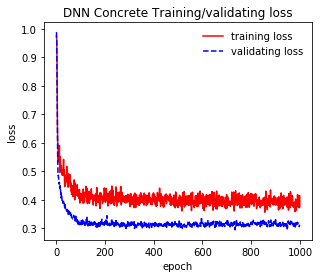

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('DNN Concrete loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Concrete Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


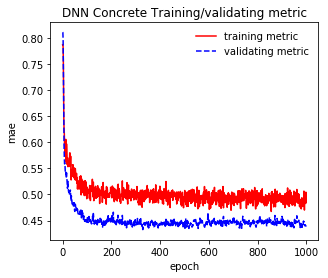

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Concrete metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('DNN Concrete Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)


Text(0.5,0,'fitted values')

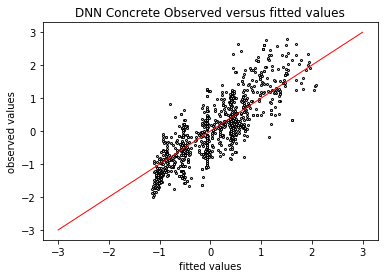

In [16]:
#----------------------------------------
# Make prediction.

fitted = model.predict(X_train)
fitted = fitted[:, 0]

fitted.shape

# Plot

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))

plt.figure('DNN Concrete')
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('DNN Concrete Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
